In [52]:
import time
start = time.perf_counter()

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive as mlrose
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from itertools import product

In [55]:
np.random.seed(903967645)
phishing_dataset = pd.read_csv('../data/phishing_dataset.csv')
print(phishing_dataset.info())
phishing_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [56]:
# Check shape of dataset and for null data
print(phishing_dataset.shape)
phishing_dataset.isna().any().any()

(11055, 32)


False

In [57]:
phishing_dataset = phishing_dataset.sample(frac=0.01, random_state=42)

# Separate features and target
train_X = phishing_dataset.drop(columns=['Result'])
train_y = phishing_dataset['Result']

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.values.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.values.reshape(-1, 1)).todense()

[(0.1, 5, 0.1), (0.1, 5, 0.25), (0.1, 5, 0.5), (0.1, 25, 0.1), (0.1, 25, 0.25), (0.1, 25, 0.5), (0.1, 50, 0.1), (0.1, 50, 0.25), (0.1, 50, 0.5), (0.1, 100, 0.1), (0.1, 100, 0.25), (0.1, 100, 0.5), (0.01, 5, 0.1), (0.01, 5, 0.25), (0.01, 5, 0.5), (0.01, 25, 0.1), (0.01, 25, 0.25), (0.01, 25, 0.5), (0.01, 50, 0.1), (0.01, 50, 0.25), (0.01, 50, 0.5), (0.01, 100, 0.1), (0.01, 100, 0.25), (0.01, 100, 0.5), (0.001, 5, 0.1), (0.001, 5, 0.25), (0.001, 5, 0.5), (0.001, 25, 0.1), (0.001, 25, 0.25), (0.001, 25, 0.5), (0.001, 50, 0.1), (0.001, 50, 0.25), (0.001, 50, 0.5), (0.001, 100, 0.1), (0.001, 100, 0.25), (0.001, 100, 0.5)]
Parameters: learning_rate=0.1, max_attempts=5, mutation_prob=0.1, activation='relu'
Training Accuracy:  0.13636363636363635
Test Accuracy:  0.34782608695652173
Training Precision:  0.23376623376623373
Test Precision:  0.5059288537549407
Training Recall:  0.13636363636363635
Test Recall:  0.34782608695652173
Training F1:  0.17224880382775118
Test F1:  0.41223832528180354
Tr

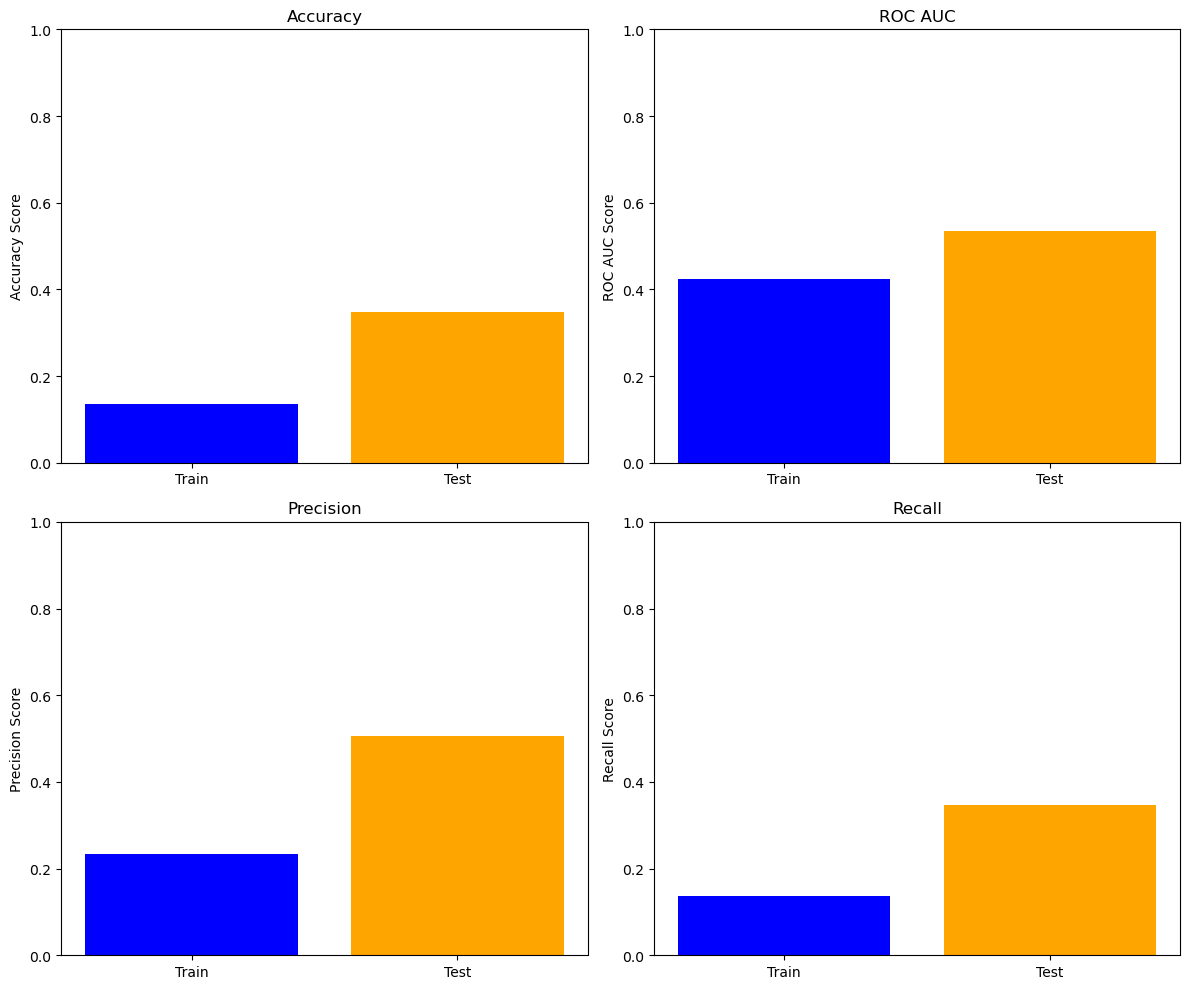

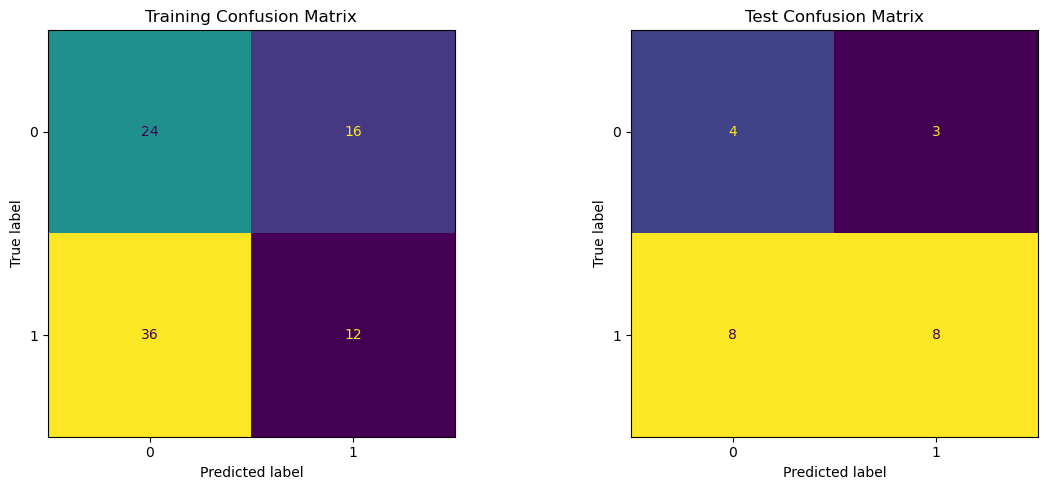

Parameters: learning_rate=0.1, max_attempts=5, mutation_prob=0.25, activation='relu'
Training Accuracy:  0.13636363636363635
Test Accuracy:  0.34782608695652173
Training Precision:  0.23376623376623373
Test Precision:  0.5059288537549407
Training Recall:  0.13636363636363635
Test Recall:  0.34782608695652173
Training F1:  0.17224880382775118
Test F1:  0.41223832528180354
Training ROC AUC:  0.425
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.60      0.48        40
           1       0.43      0.25      0.32        48

    acc

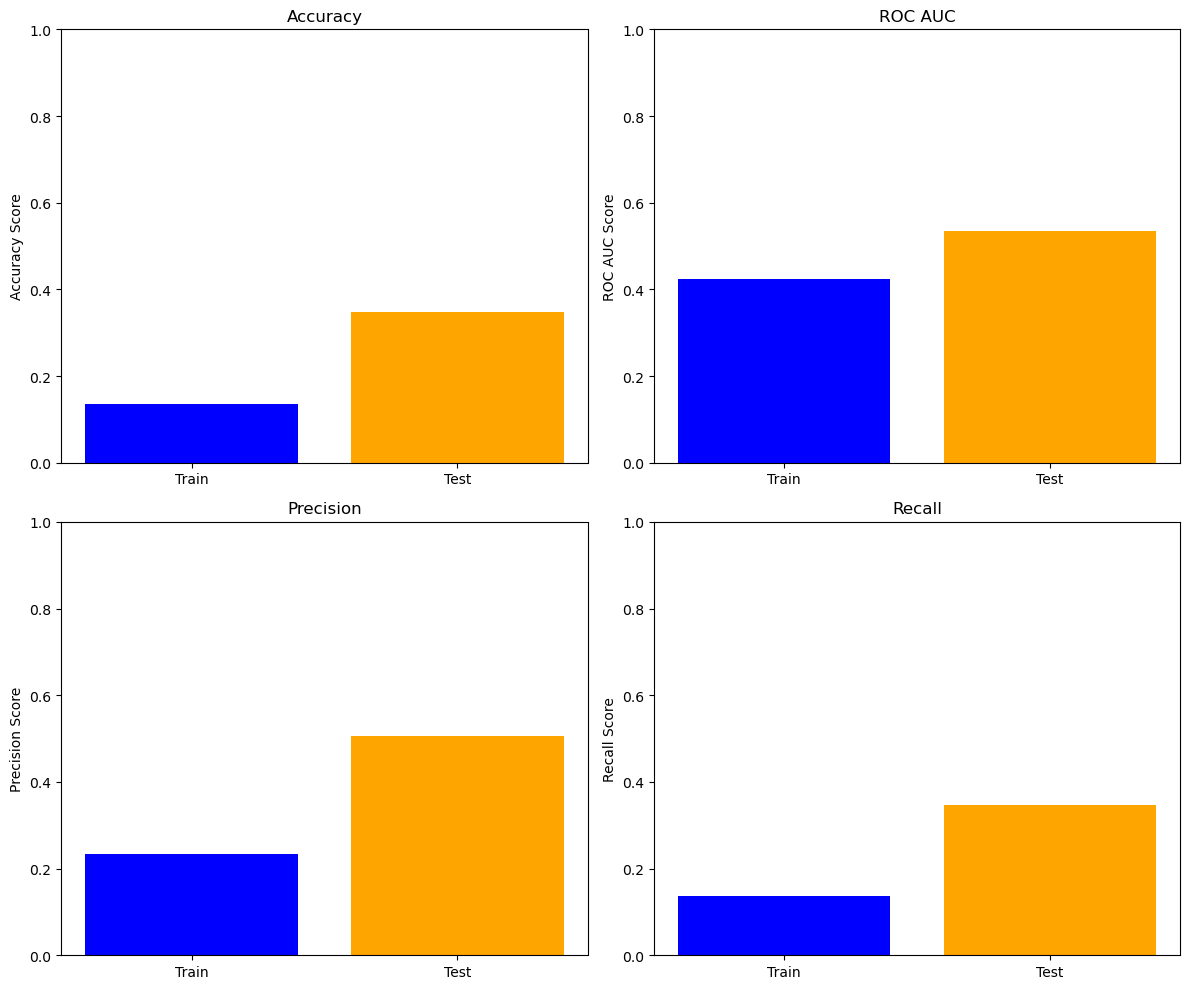

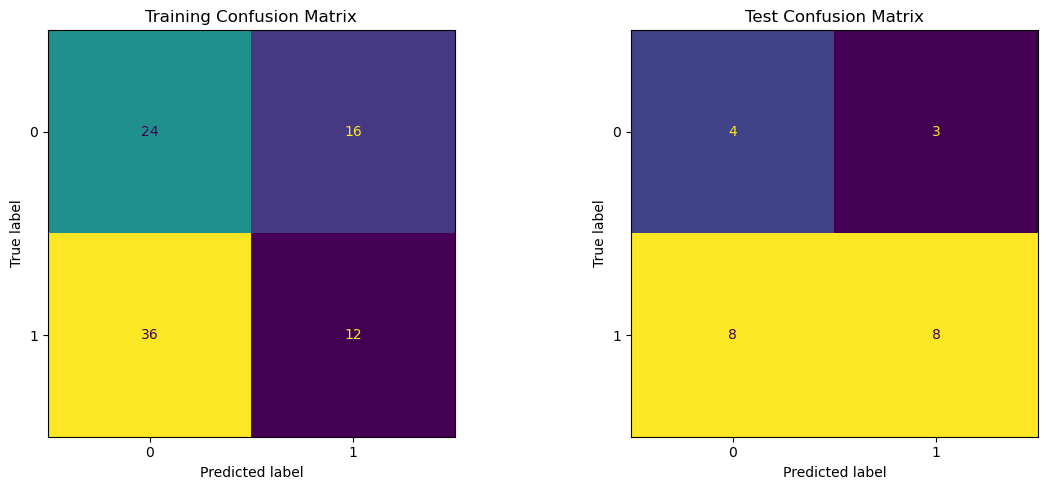

Parameters: learning_rate=0.1, max_attempts=5, mutation_prob=0.5, activation='relu'
Training Accuracy:  0.13636363636363635
Test Accuracy:  0.34782608695652173
Training Precision:  0.23376623376623373
Test Precision:  0.5059288537549407
Training Recall:  0.13636363636363635
Test Recall:  0.34782608695652173
Training F1:  0.17224880382775118
Test F1:  0.41223832528180354
Training ROC AUC:  0.425
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.60      0.48        40
           1       0.43      0.25      0.32        48

    accu

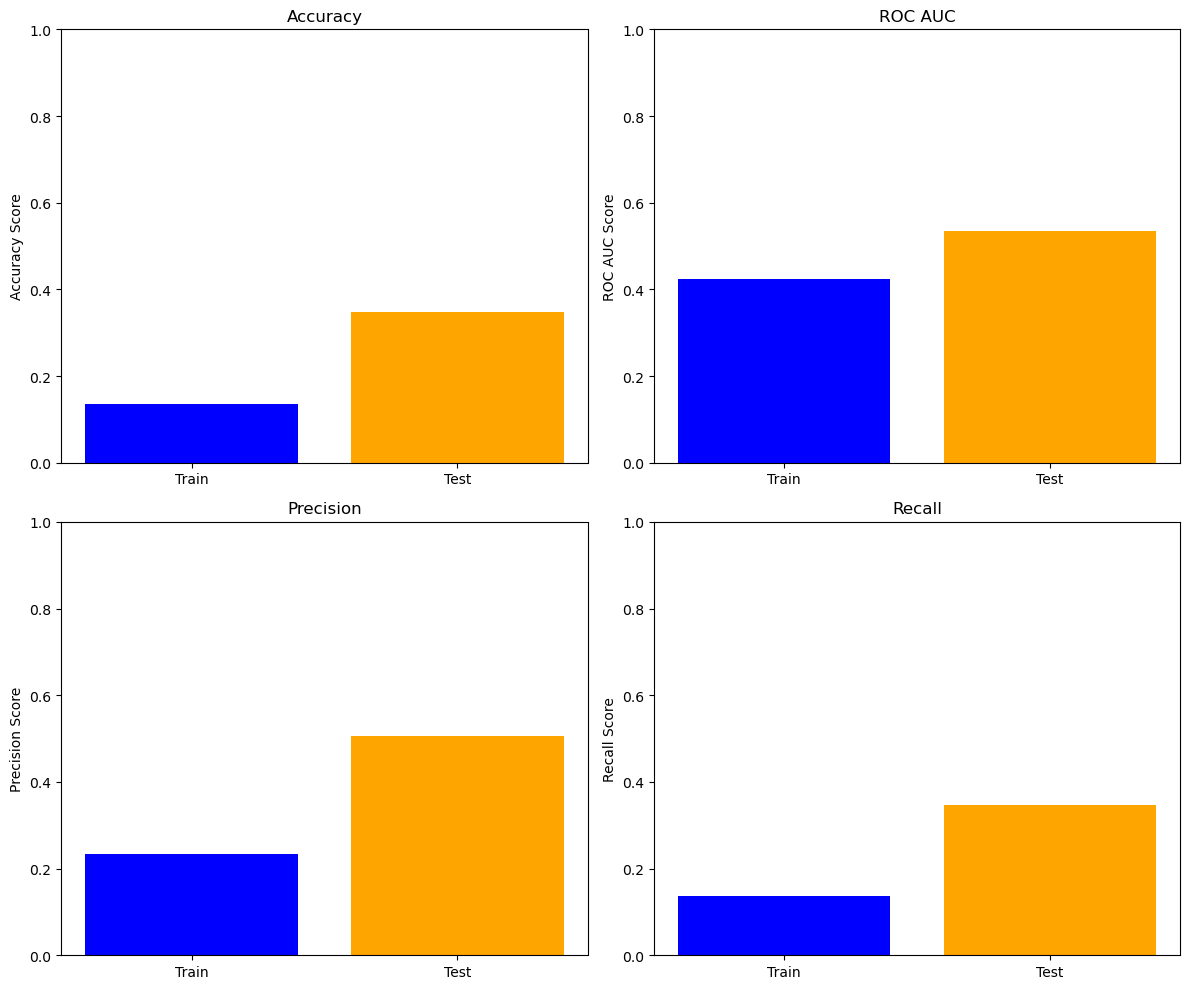

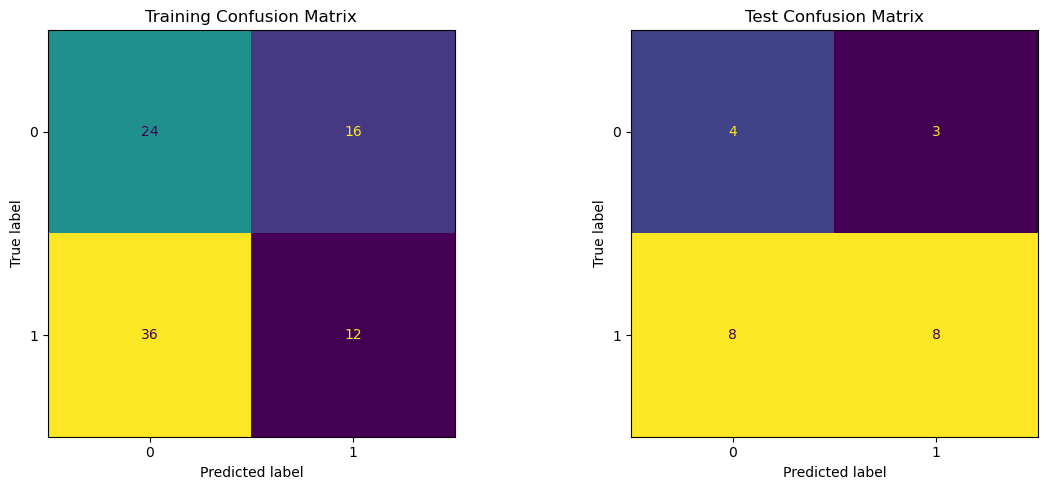

Parameters: learning_rate=0.1, max_attempts=25, mutation_prob=0.1, activation='relu'
Training Accuracy:  0.38636363636363635
Test Accuracy:  0.43478260869565216
Training Precision:  0.3434343434343434
Test Precision:  0.5351170568561873
Training Recall:  0.38636363636363635
Test Recall:  0.43478260869565216
Training F1:  0.36363636363636365
Test F1:  0.47976011994003004
Training ROC AUC:  0.6041666666666667
Test ROC AUC:  0.5982142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.77      0.62      0.69        16

    accuracy                           0.61        23
   macro avg       0.58      0.60      0.58        23
weighted avg       0.66      0.61      0.62        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        40
           1       0.63      0.71      0.67       

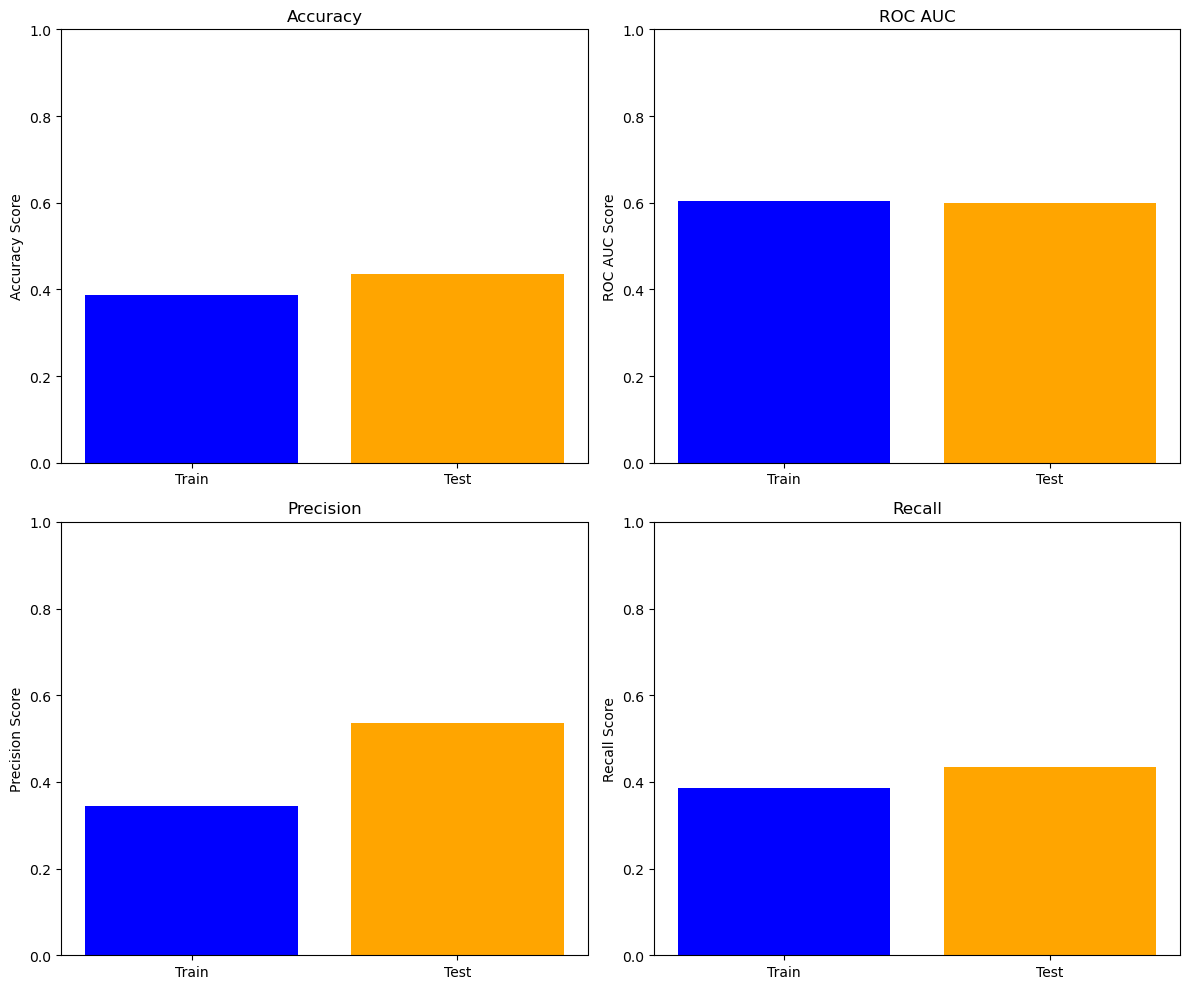

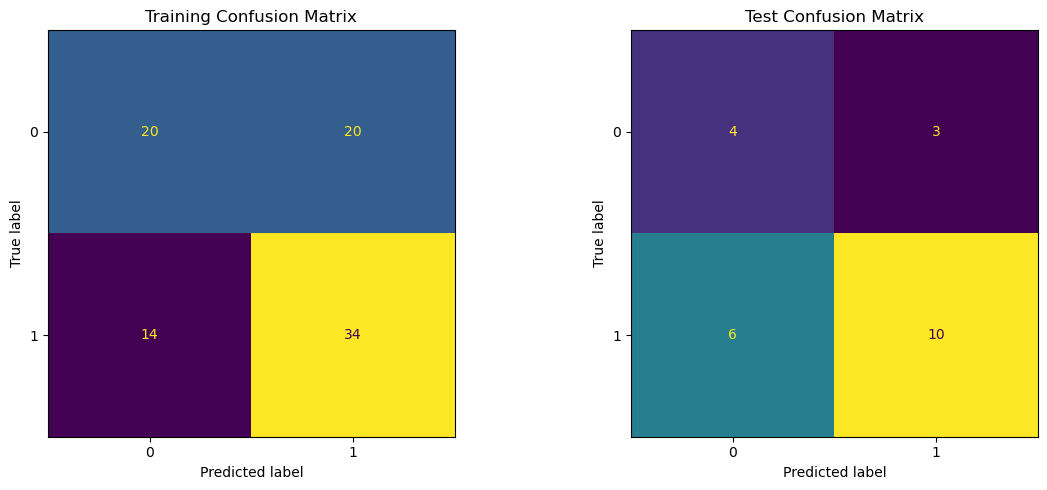

Parameters: learning_rate=0.1, max_attempts=25, mutation_prob=0.25, activation='relu'
Training Accuracy:  0.38636363636363635
Test Accuracy:  0.43478260869565216
Training Precision:  0.3434343434343434
Test Precision:  0.5351170568561873
Training Recall:  0.38636363636363635
Test Recall:  0.43478260869565216
Training F1:  0.36363636363636365
Test F1:  0.47976011994003004
Training ROC AUC:  0.6041666666666667
Test ROC AUC:  0.5982142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.77      0.62      0.69        16

    accuracy                           0.61        23
   macro avg       0.58      0.60      0.58        23
weighted avg       0.66      0.61      0.62        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        40
           1       0.63      0.71      0.67      

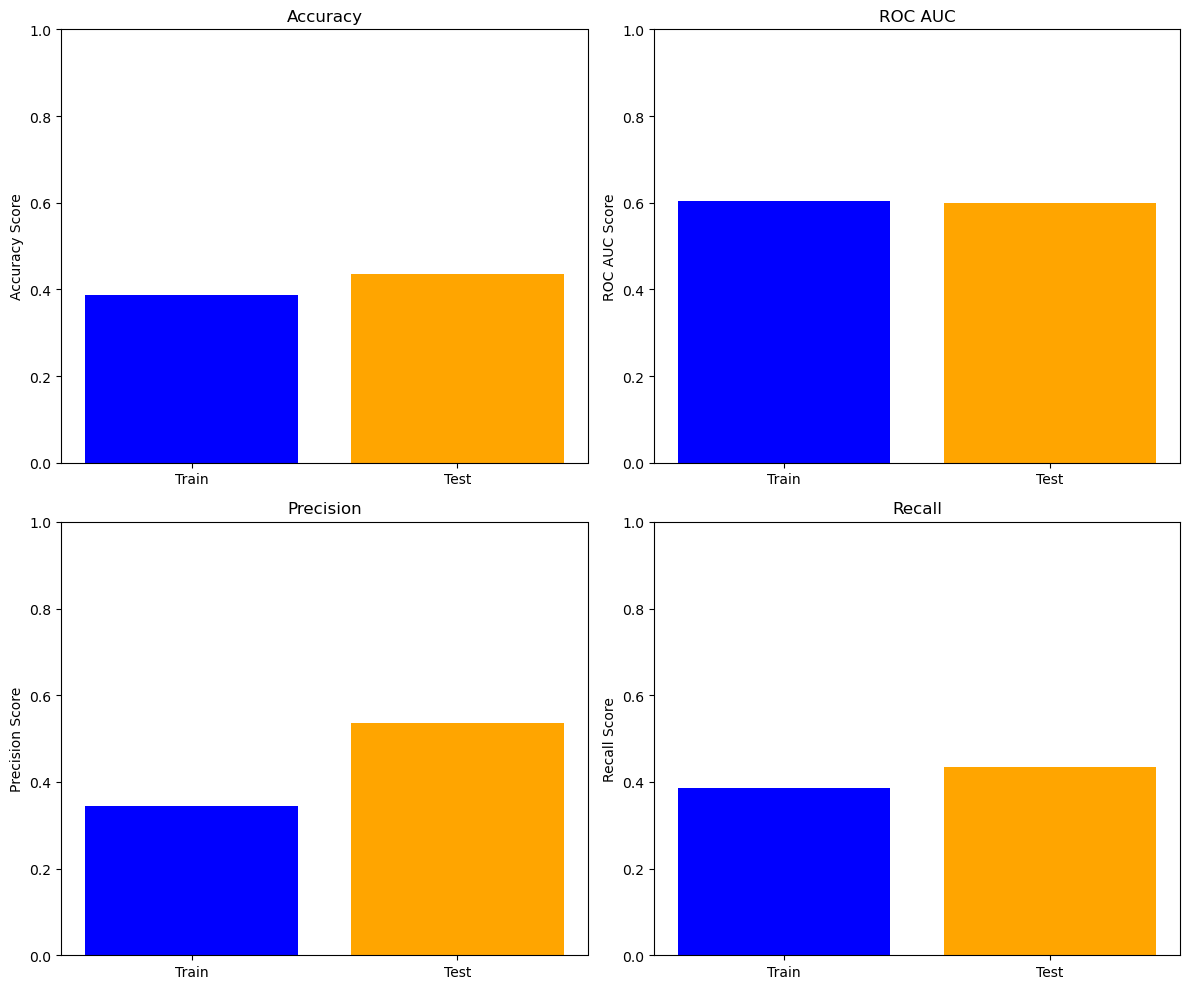

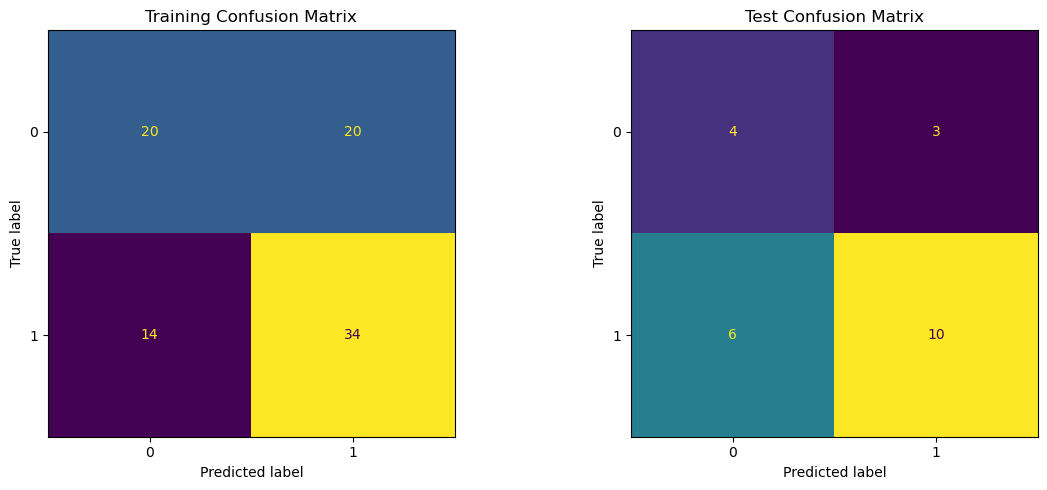

Parameters: learning_rate=0.1, max_attempts=25, mutation_prob=0.5, activation='relu'
Training Accuracy:  0.38636363636363635
Test Accuracy:  0.43478260869565216
Training Precision:  0.3434343434343434
Test Precision:  0.5351170568561873
Training Recall:  0.38636363636363635
Test Recall:  0.43478260869565216
Training F1:  0.36363636363636365
Test F1:  0.47976011994003004
Training ROC AUC:  0.6041666666666667
Test ROC AUC:  0.5982142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.77      0.62      0.69        16

    accuracy                           0.61        23
   macro avg       0.58      0.60      0.58        23
weighted avg       0.66      0.61      0.62        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        40
           1       0.63      0.71      0.67       

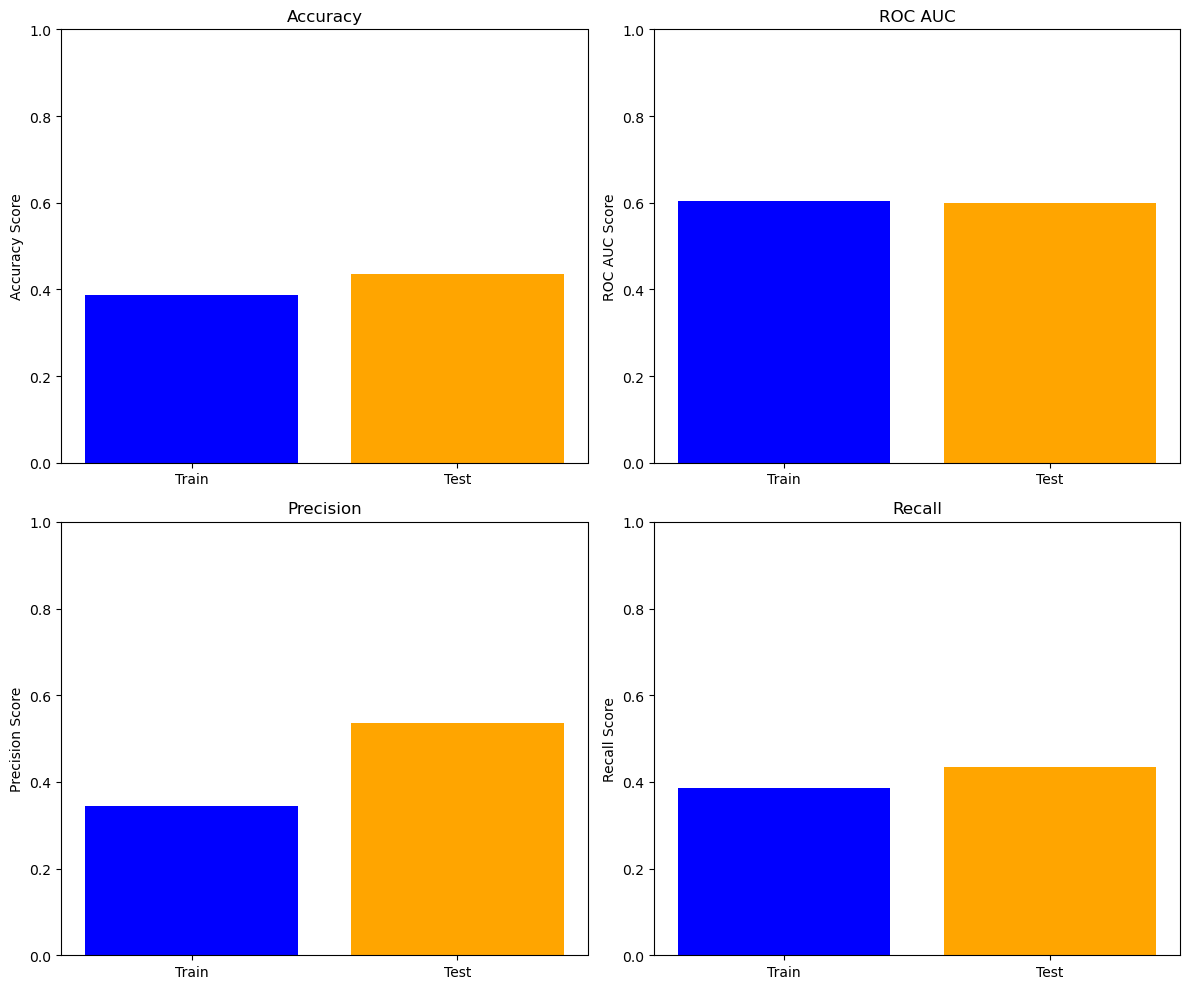

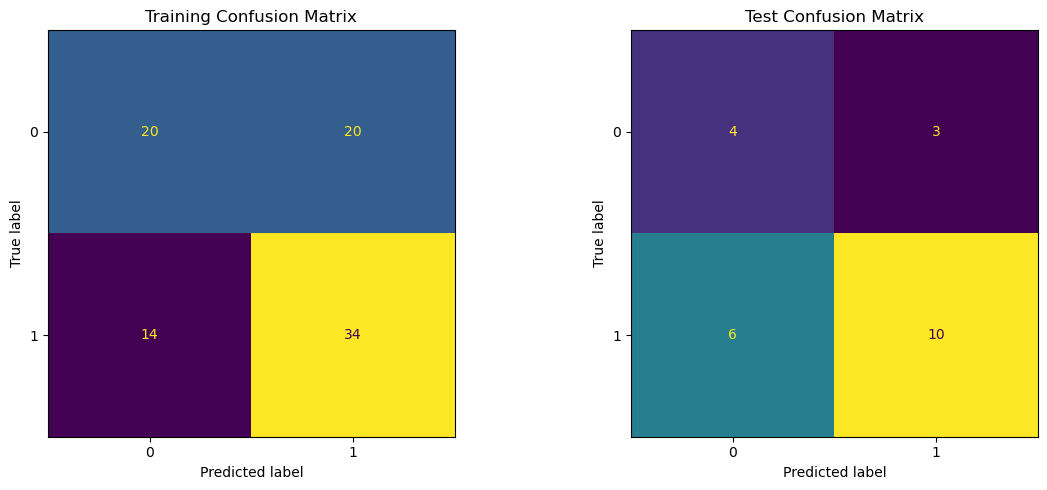

Parameters: learning_rate=0.1, max_attempts=50, mutation_prob=0.1, activation='relu'
Training Accuracy:  0.38636363636363635
Test Accuracy:  0.43478260869565216
Training Precision:  0.3434343434343434
Test Precision:  0.5351170568561873
Training Recall:  0.38636363636363635
Test Recall:  0.43478260869565216
Training F1:  0.36363636363636365
Test F1:  0.47976011994003004
Training ROC AUC:  0.6041666666666667
Test ROC AUC:  0.5982142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.77      0.62      0.69        16

    accuracy                           0.61        23
   macro avg       0.58      0.60      0.58        23
weighted avg       0.66      0.61      0.62        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        40
           1       0.63      0.71      0.67       

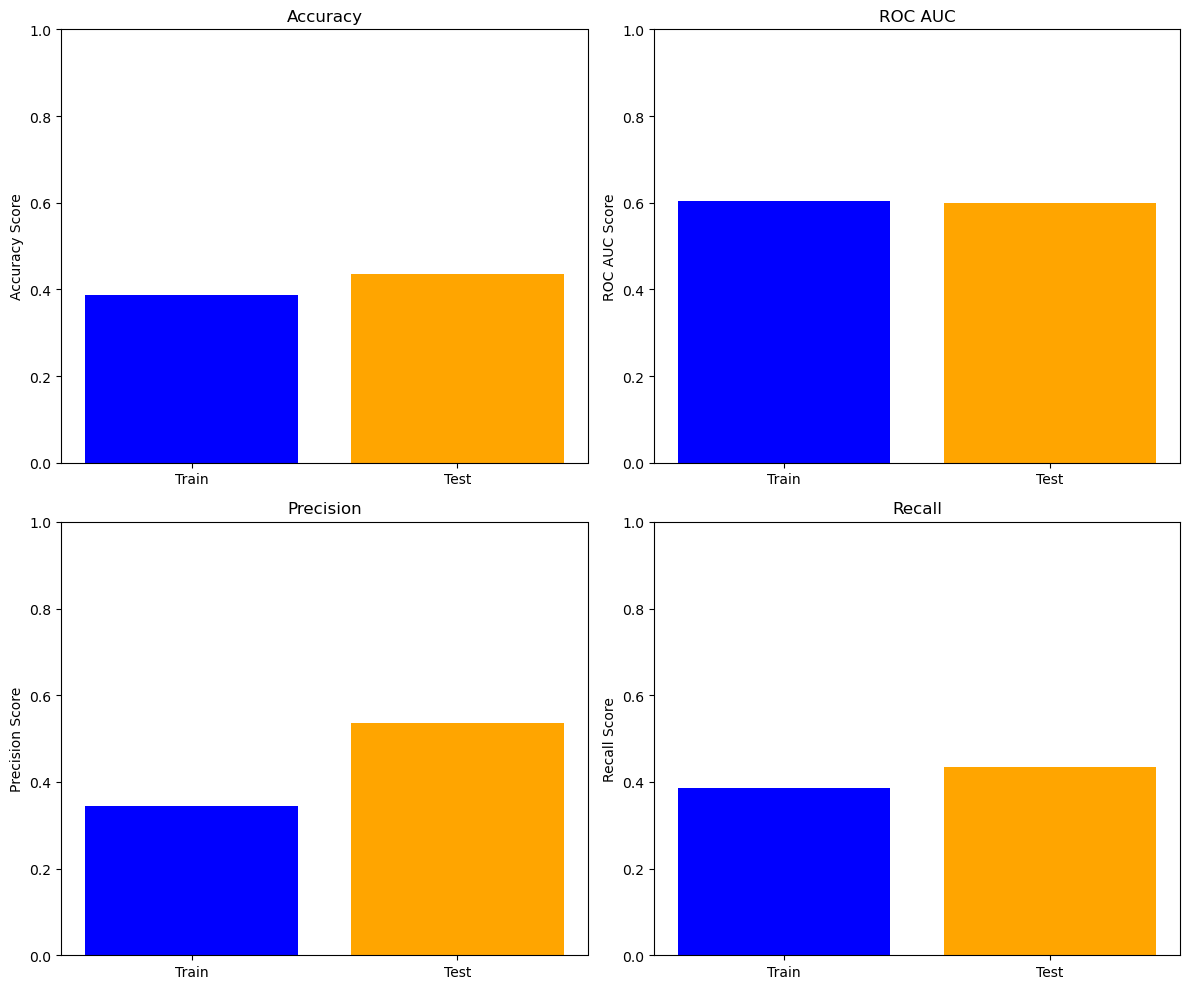

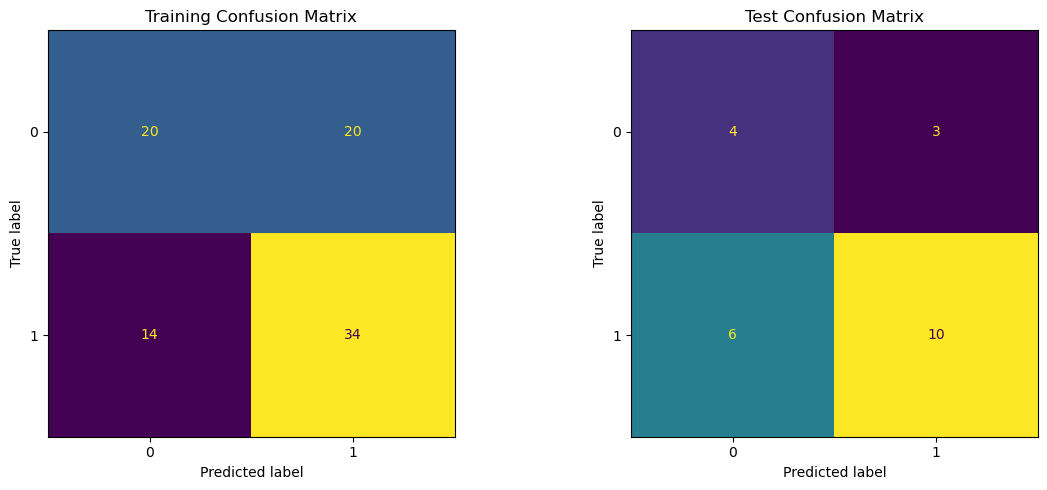

Parameters: learning_rate=0.1, max_attempts=50, mutation_prob=0.25, activation='relu'
Training Accuracy:  0.38636363636363635
Test Accuracy:  0.43478260869565216
Training Precision:  0.3434343434343434
Test Precision:  0.5351170568561873
Training Recall:  0.38636363636363635
Test Recall:  0.43478260869565216
Training F1:  0.36363636363636365
Test F1:  0.47976011994003004
Training ROC AUC:  0.6041666666666667
Test ROC AUC:  0.5982142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.77      0.62      0.69        16

    accuracy                           0.61        23
   macro avg       0.58      0.60      0.58        23
weighted avg       0.66      0.61      0.62        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        40
           1       0.63      0.71      0.67      

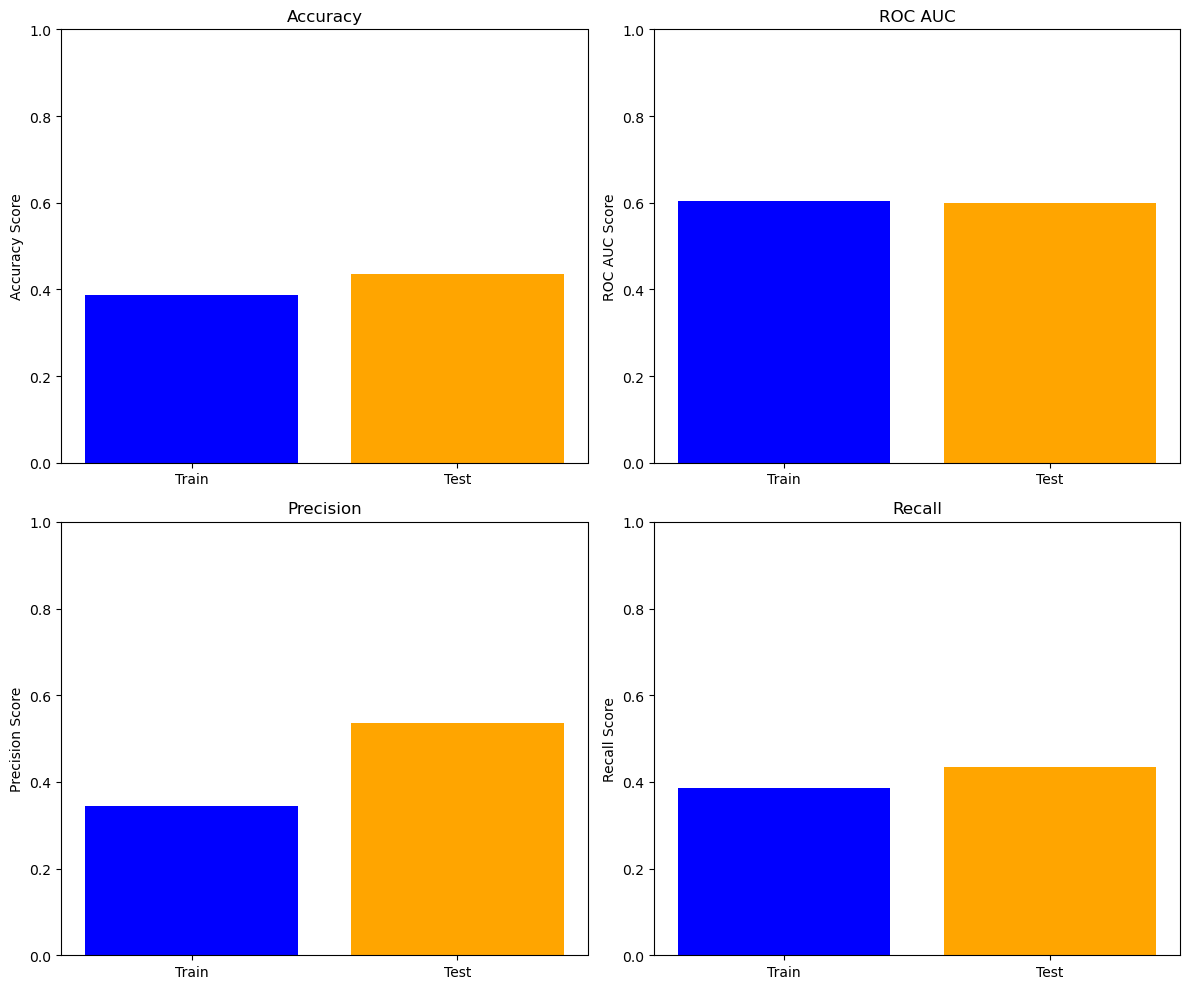

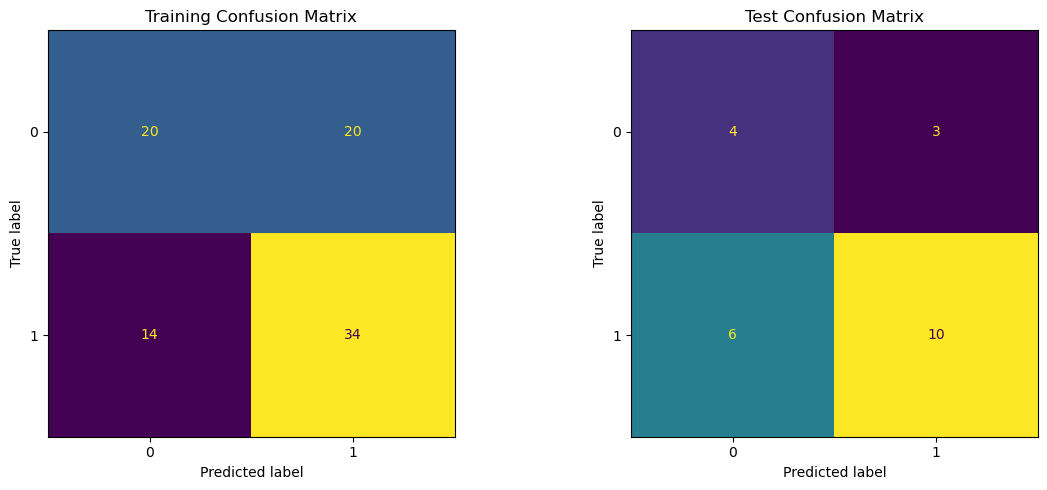

Parameters: learning_rate=0.1, max_attempts=50, mutation_prob=0.5, activation='relu'
Training Accuracy:  0.38636363636363635
Test Accuracy:  0.43478260869565216
Training Precision:  0.3434343434343434
Test Precision:  0.5351170568561873
Training Recall:  0.38636363636363635
Test Recall:  0.43478260869565216
Training F1:  0.36363636363636365
Test F1:  0.47976011994003004
Training ROC AUC:  0.6041666666666667
Test ROC AUC:  0.5982142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.77      0.62      0.69        16

    accuracy                           0.61        23
   macro avg       0.58      0.60      0.58        23
weighted avg       0.66      0.61      0.62        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        40
           1       0.63      0.71      0.67       

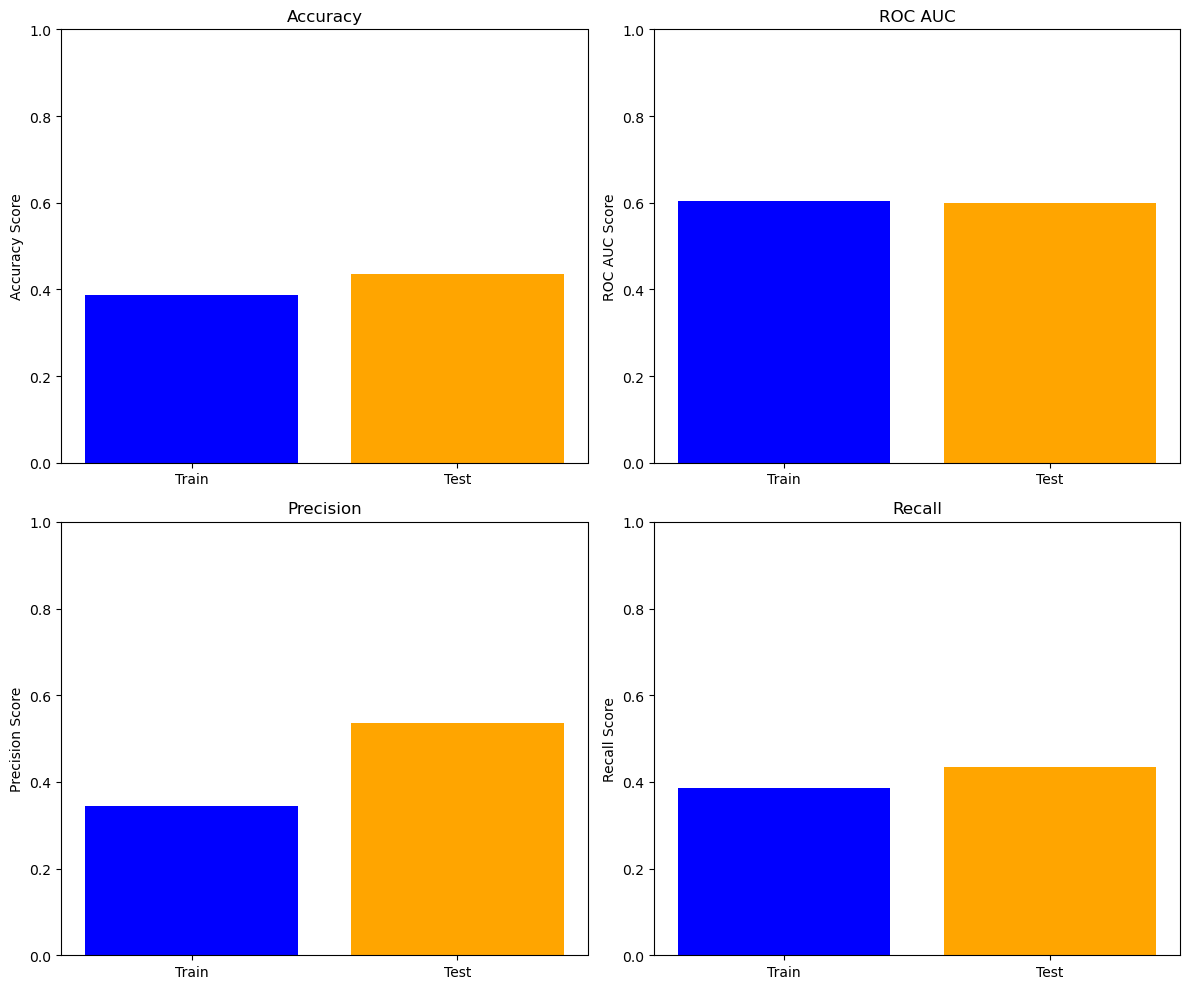

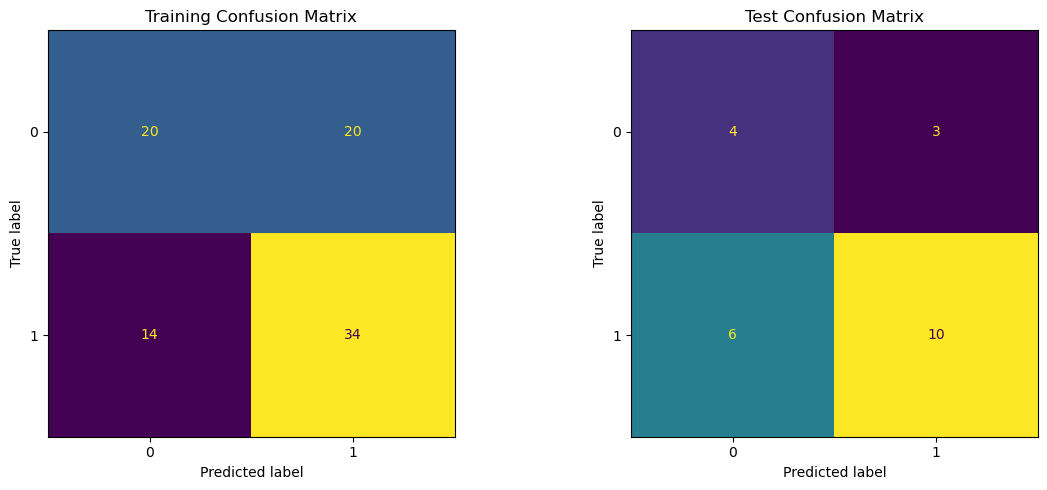

Parameters: learning_rate=0.1, max_attempts=100, mutation_prob=0.1, activation='relu'
Training Accuracy:  0.38636363636363635
Test Accuracy:  0.43478260869565216
Training Precision:  0.3434343434343434
Test Precision:  0.5351170568561873
Training Recall:  0.38636363636363635
Test Recall:  0.43478260869565216
Training F1:  0.36363636363636365
Test F1:  0.47976011994003004
Training ROC AUC:  0.6041666666666667
Test ROC AUC:  0.5982142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.77      0.62      0.69        16

    accuracy                           0.61        23
   macro avg       0.58      0.60      0.58        23
weighted avg       0.66      0.61      0.62        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        40
           1       0.63      0.71      0.67      

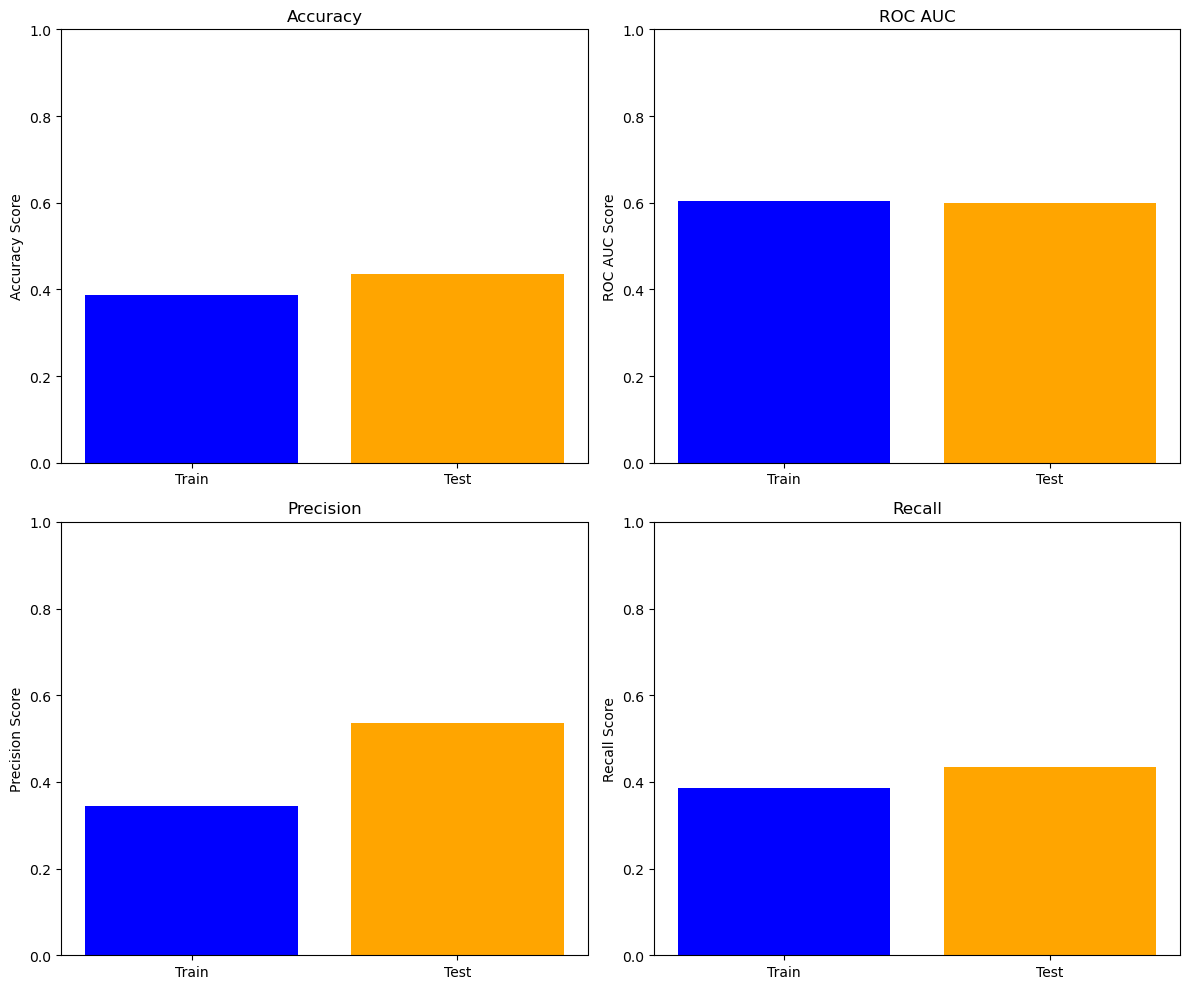

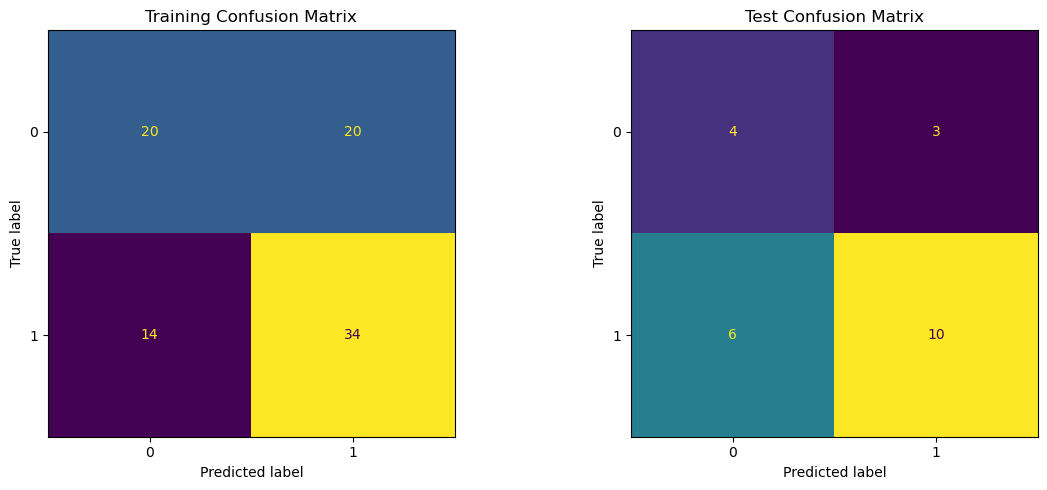

Parameters: learning_rate=0.1, max_attempts=100, mutation_prob=0.25, activation='relu'
Training Accuracy:  0.38636363636363635
Test Accuracy:  0.43478260869565216
Training Precision:  0.3434343434343434
Test Precision:  0.5351170568561873
Training Recall:  0.38636363636363635
Test Recall:  0.43478260869565216
Training F1:  0.36363636363636365
Test F1:  0.47976011994003004
Training ROC AUC:  0.6041666666666667
Test ROC AUC:  0.5982142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.77      0.62      0.69        16

    accuracy                           0.61        23
   macro avg       0.58      0.60      0.58        23
weighted avg       0.66      0.61      0.62        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        40
           1       0.63      0.71      0.67     

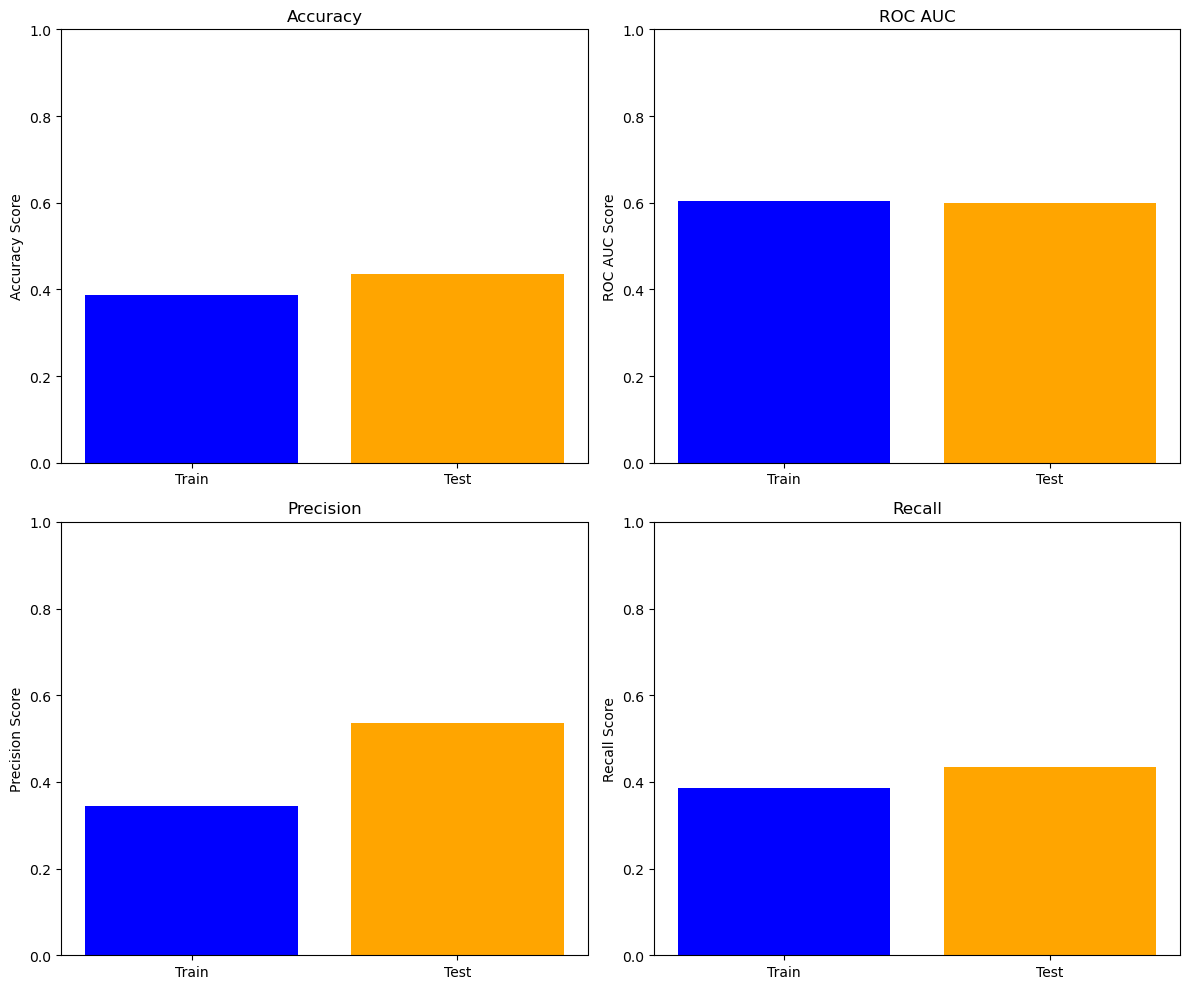

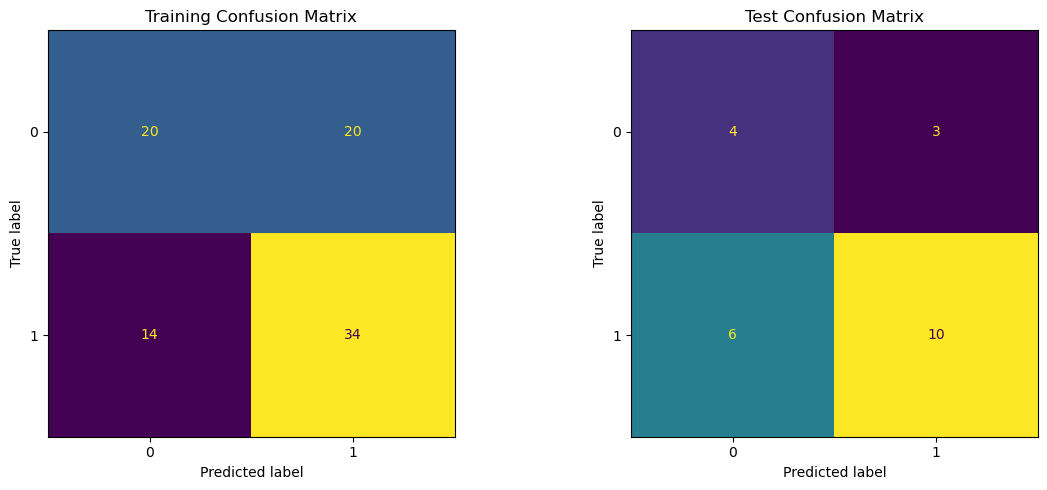

Parameters: learning_rate=0.1, max_attempts=100, mutation_prob=0.5, activation='relu'
Training Accuracy:  0.38636363636363635
Test Accuracy:  0.43478260869565216
Training Precision:  0.3434343434343434
Test Precision:  0.5351170568561873
Training Recall:  0.38636363636363635
Test Recall:  0.43478260869565216
Training F1:  0.36363636363636365
Test F1:  0.47976011994003004
Training ROC AUC:  0.6041666666666667
Test ROC AUC:  0.5982142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.77      0.62      0.69        16

    accuracy                           0.61        23
   macro avg       0.58      0.60      0.58        23
weighted avg       0.66      0.61      0.62        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        40
           1       0.63      0.71      0.67      

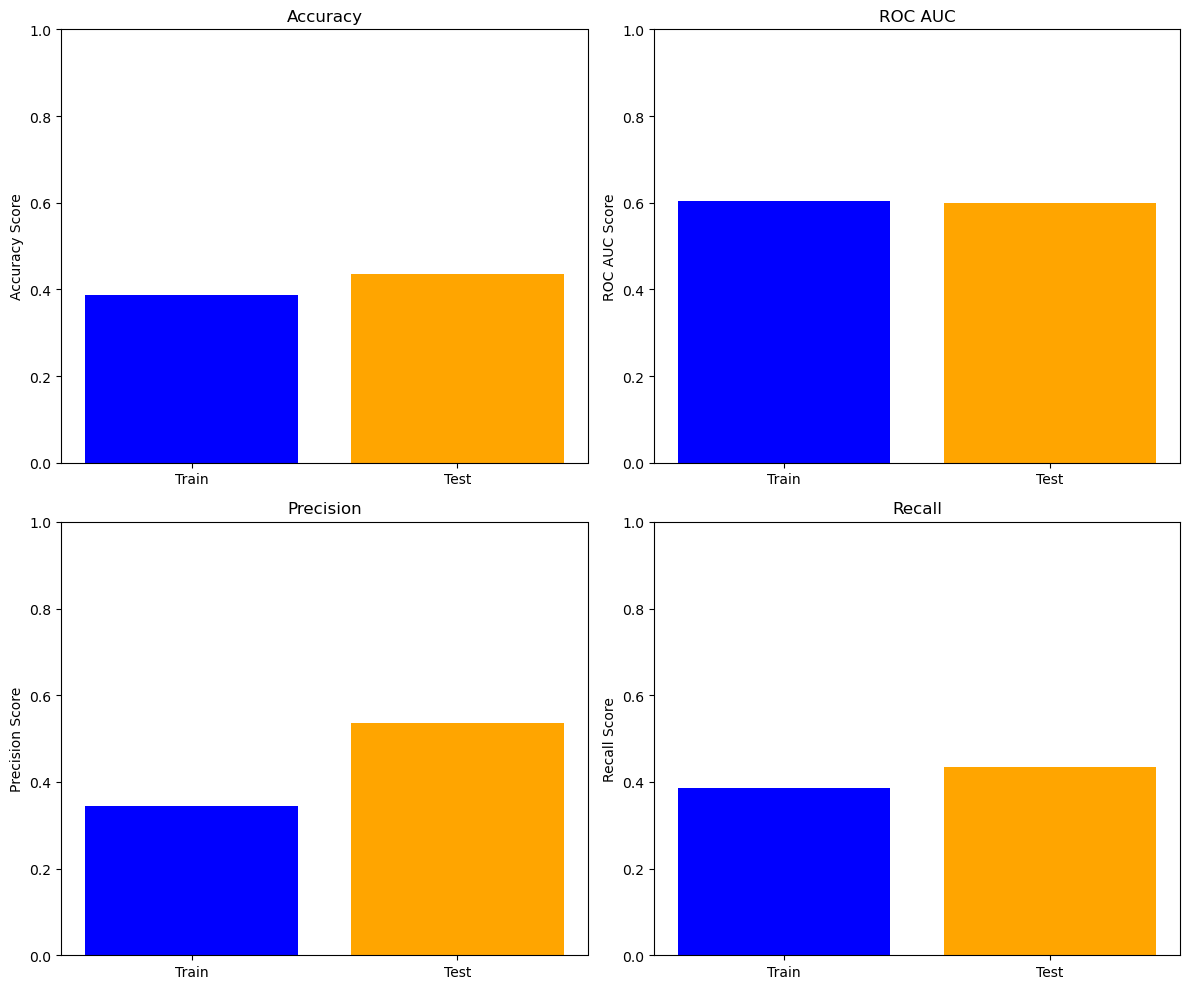

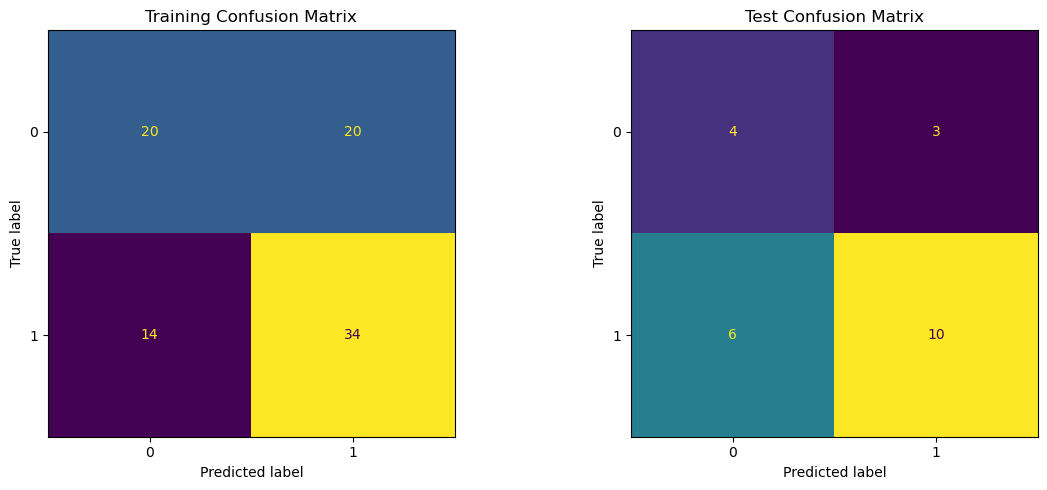

Parameters: learning_rate=0.01, max_attempts=5, mutation_prob=0.1, activation='relu'
Training Accuracy:  0.125
Test Accuracy:  0.34782608695652173
Training Precision:  0.23076923076923075
Test Precision:  0.5059288537549407
Training Recall:  0.125
Test Recall:  0.34782608695652173
Training F1:  0.16216216216216217
Test F1:  0.41223832528180354
Training ROC AUC:  0.42708333333333337
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        40
           1       0.42      0.23      0.30        48

    accuracy         

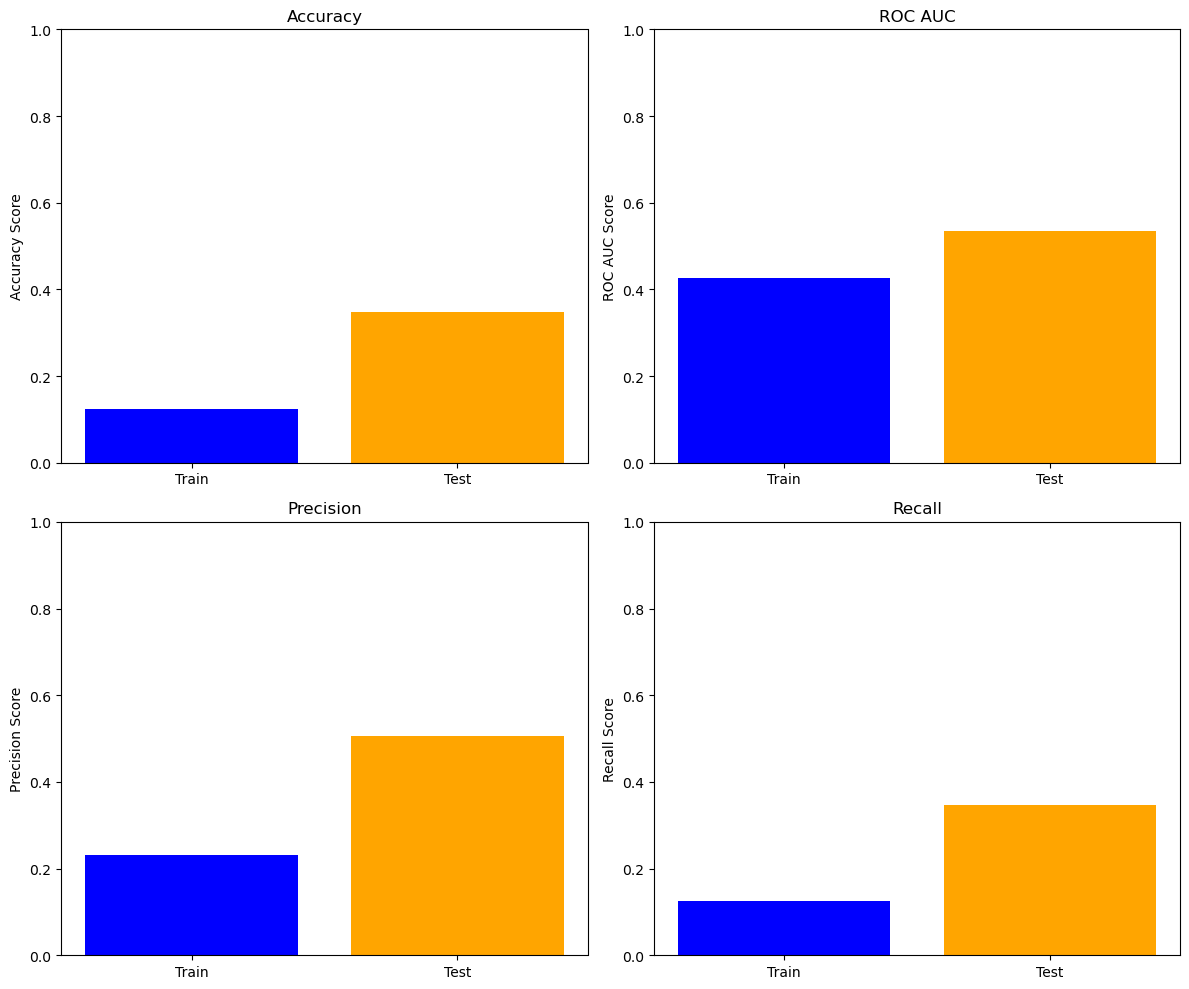

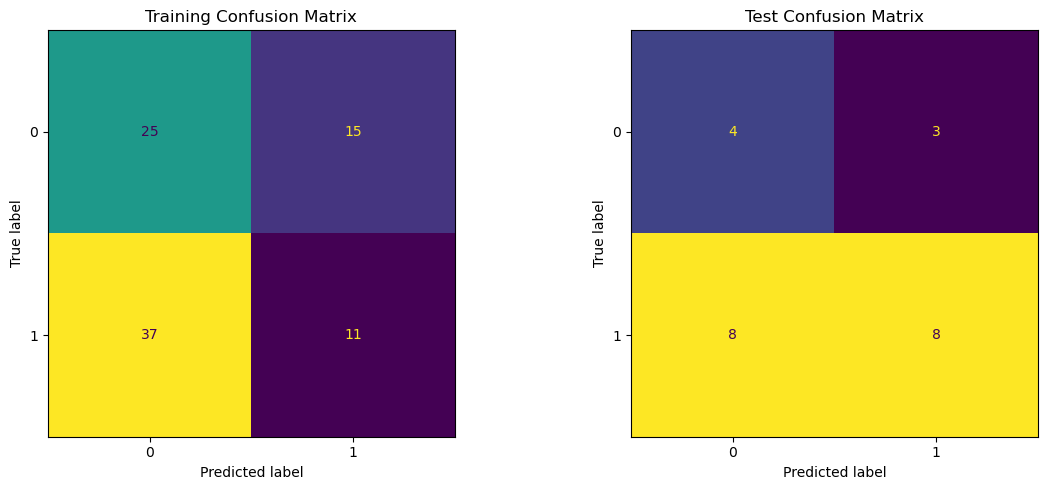

Parameters: learning_rate=0.01, max_attempts=5, mutation_prob=0.25, activation='relu'
Training Accuracy:  0.125
Test Accuracy:  0.34782608695652173
Training Precision:  0.23076923076923075
Test Precision:  0.5059288537549407
Training Recall:  0.125
Test Recall:  0.34782608695652173
Training F1:  0.16216216216216217
Test F1:  0.41223832528180354
Training ROC AUC:  0.42708333333333337
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        40
           1       0.42      0.23      0.30        48

    accuracy        

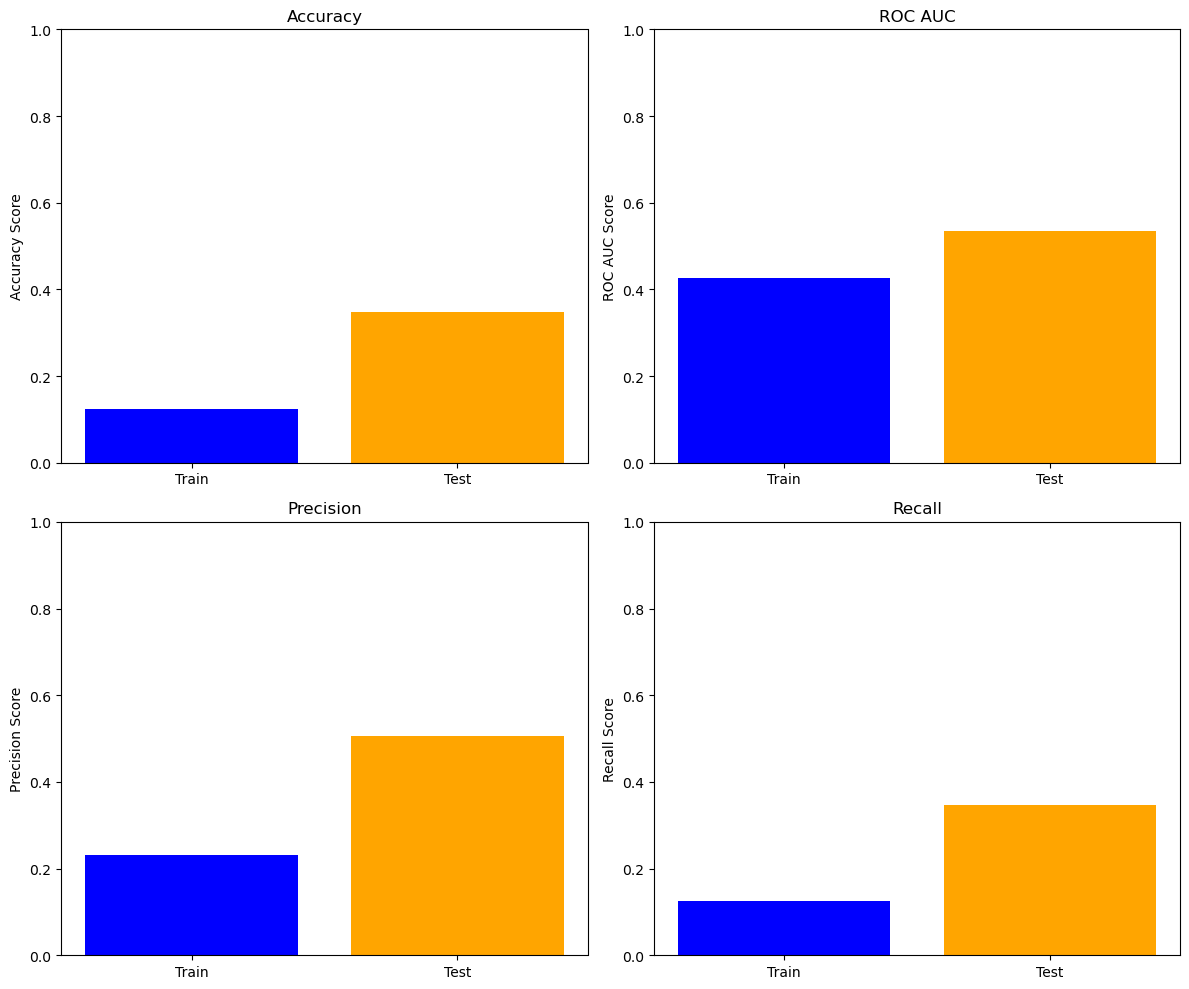

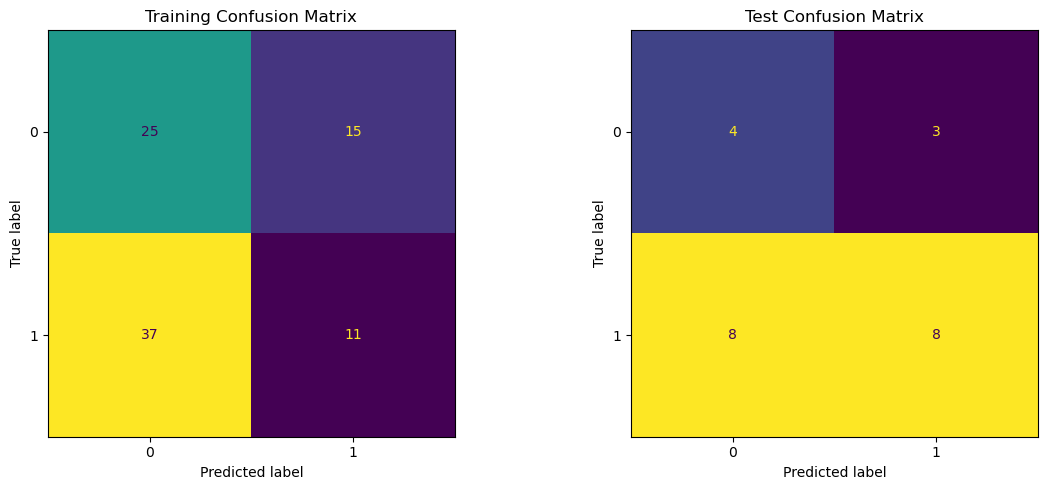

Parameters: learning_rate=0.01, max_attempts=5, mutation_prob=0.5, activation='relu'
Training Accuracy:  0.125
Test Accuracy:  0.34782608695652173
Training Precision:  0.23076923076923075
Test Precision:  0.5059288537549407
Training Recall:  0.125
Test Recall:  0.34782608695652173
Training F1:  0.16216216216216217
Test F1:  0.41223832528180354
Training ROC AUC:  0.42708333333333337
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        40
           1       0.42      0.23      0.30        48

    accuracy         

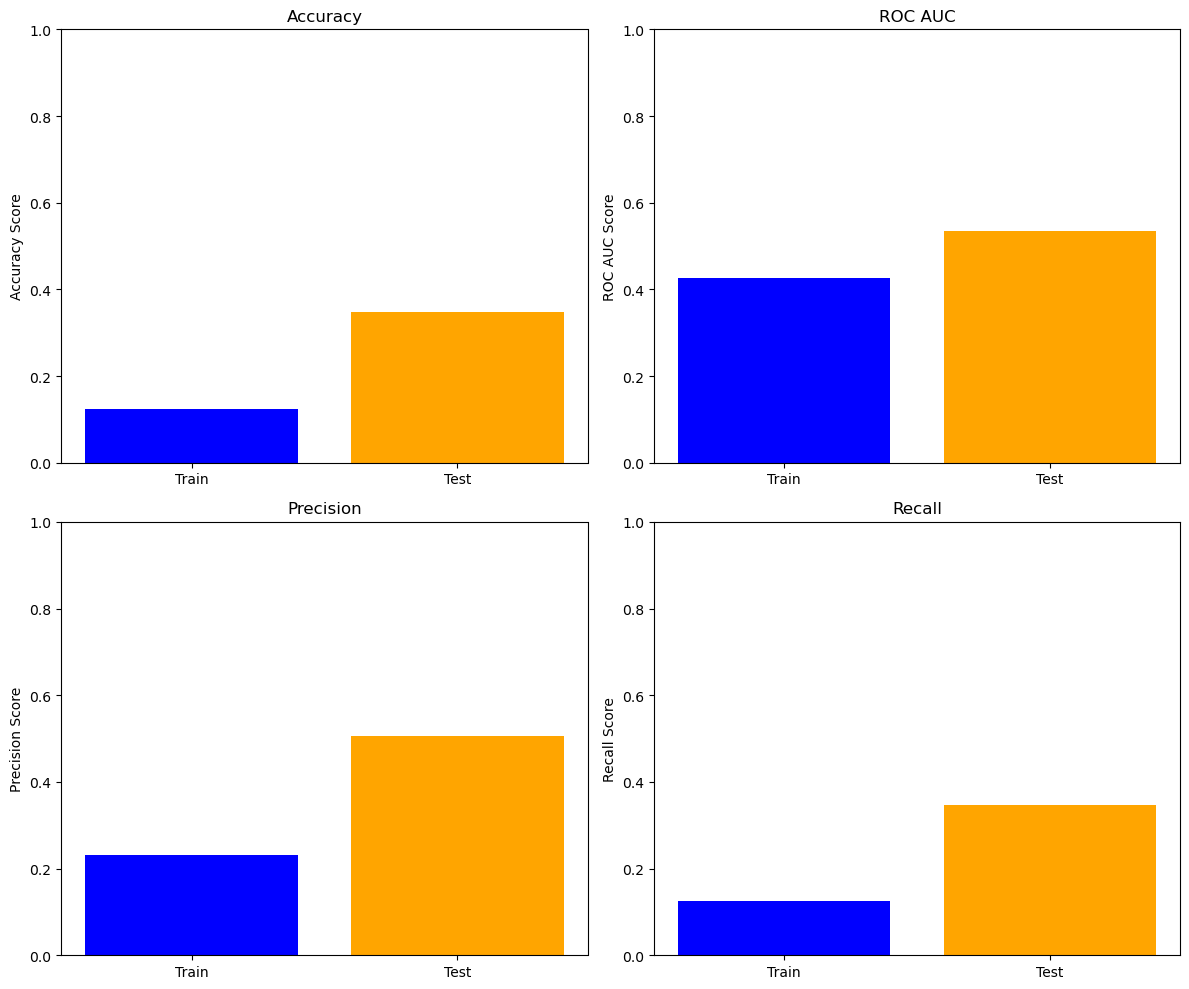

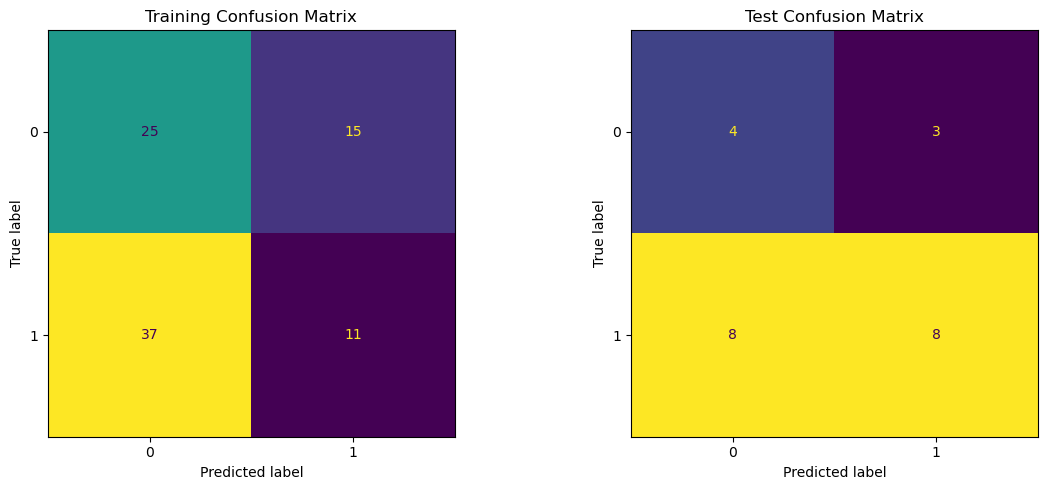

Parameters: learning_rate=0.01, max_attempts=25, mutation_prob=0.1, activation='relu'
Training Accuracy:  0.17045454545454544
Test Accuracy:  0.34782608695652173
Training Precision:  0.24793388429752064
Test Precision:  0.5059288537549407
Training Recall:  0.17045454545454544
Test Recall:  0.34782608695652173
Training F1:  0.20202020202020202
Test F1:  0.41223832528180354
Training ROC AUC:  0.43125
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.55      0.46        40
           1       0.45      0.31      0.37        48

    

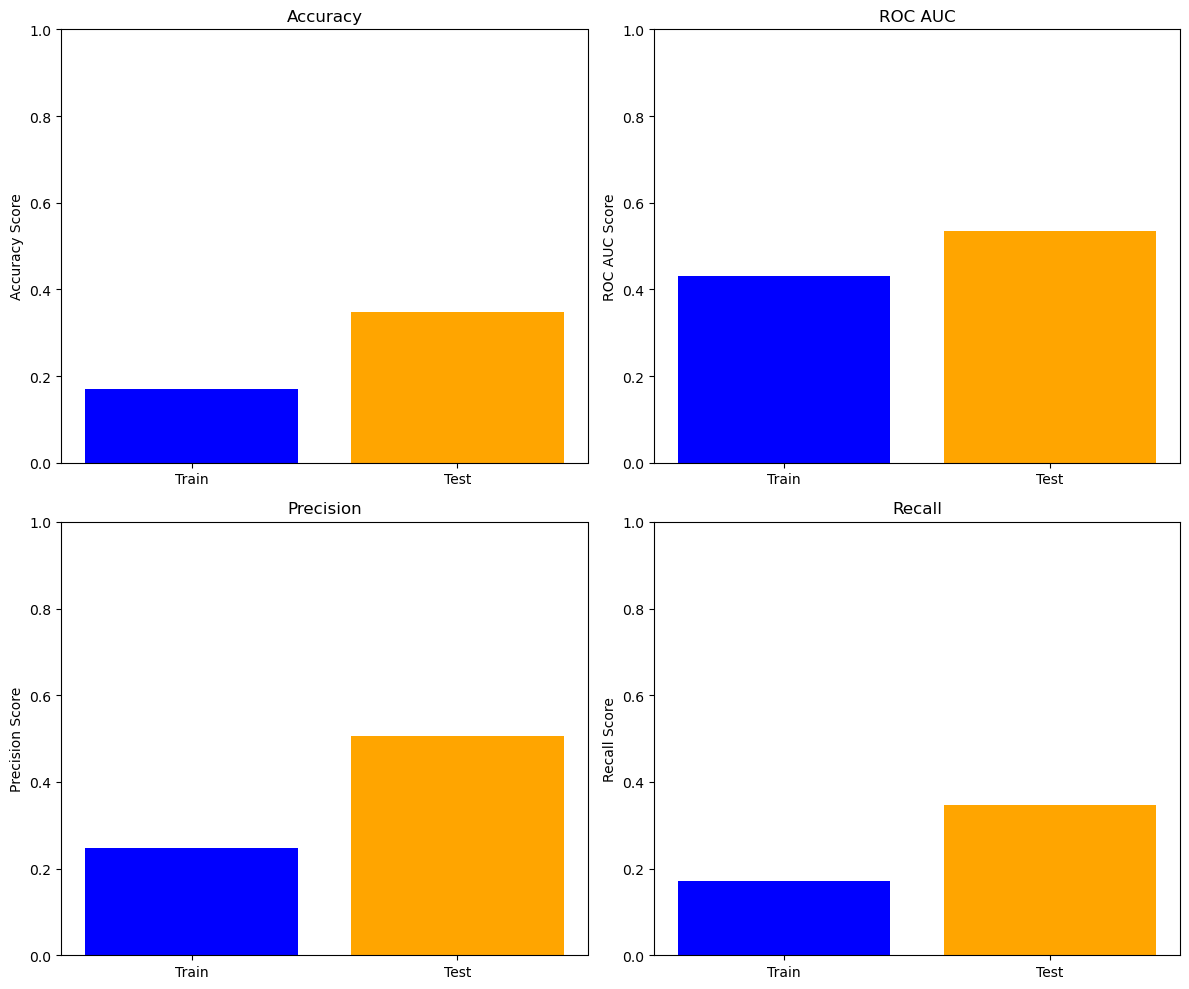

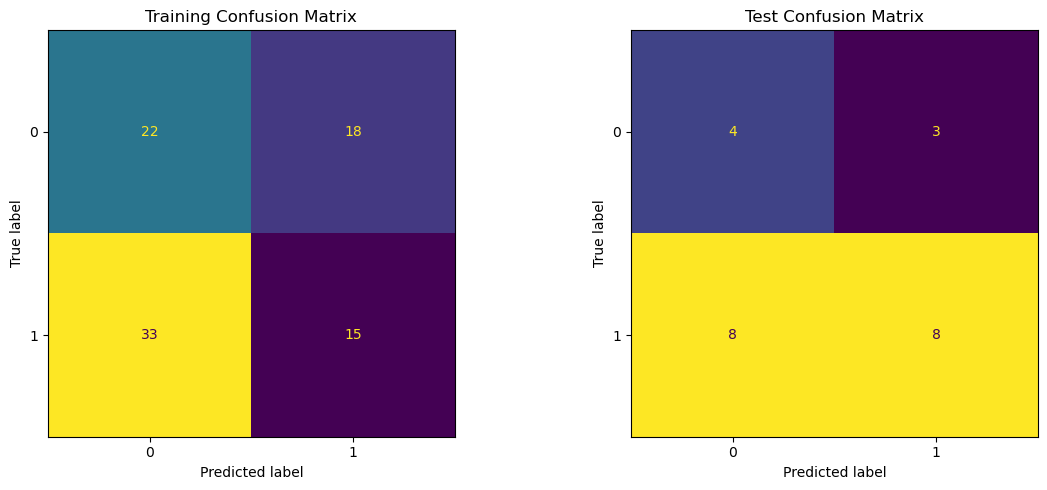

Parameters: learning_rate=0.01, max_attempts=25, mutation_prob=0.25, activation='relu'
Training Accuracy:  0.17045454545454544
Test Accuracy:  0.34782608695652173
Training Precision:  0.24793388429752064
Test Precision:  0.5059288537549407
Training Recall:  0.17045454545454544
Test Recall:  0.34782608695652173
Training F1:  0.20202020202020202
Test F1:  0.41223832528180354
Training ROC AUC:  0.43125
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.55      0.46        40
           1       0.45      0.31      0.37        48

   

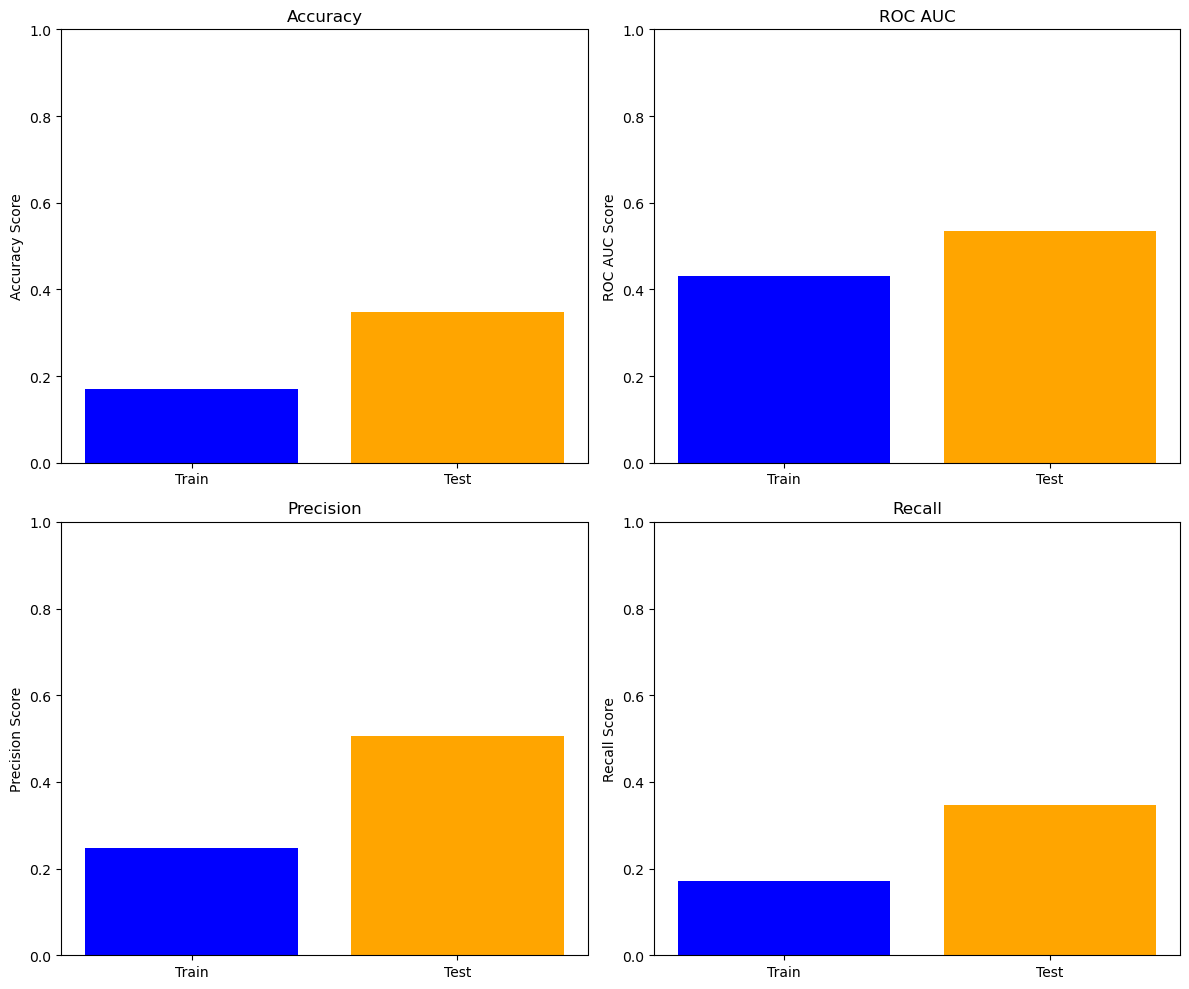

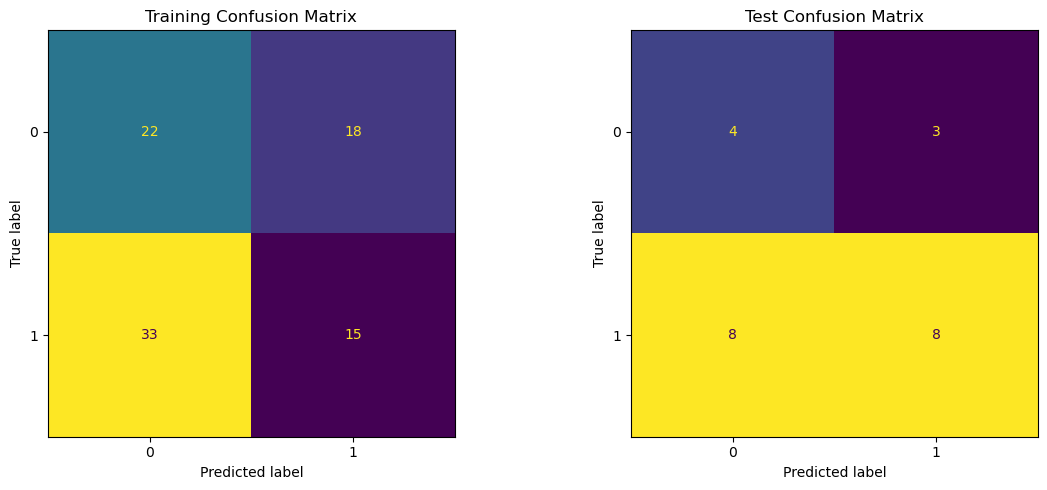

Parameters: learning_rate=0.01, max_attempts=25, mutation_prob=0.5, activation='relu'
Training Accuracy:  0.17045454545454544
Test Accuracy:  0.34782608695652173
Training Precision:  0.24793388429752064
Test Precision:  0.5059288537549407
Training Recall:  0.17045454545454544
Test Recall:  0.34782608695652173
Training F1:  0.20202020202020202
Test F1:  0.41223832528180354
Training ROC AUC:  0.43125
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.55      0.46        40
           1       0.45      0.31      0.37        48

    

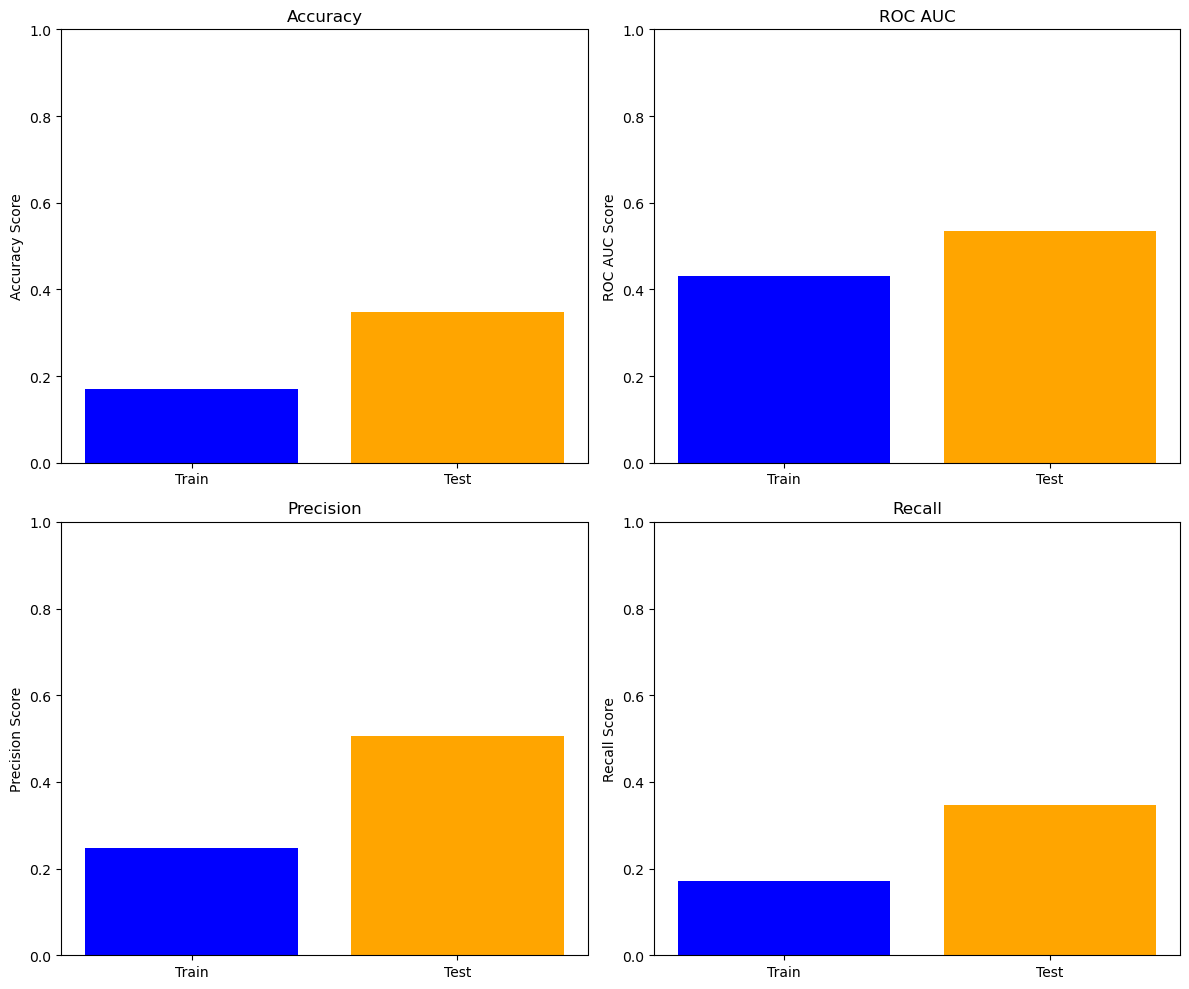

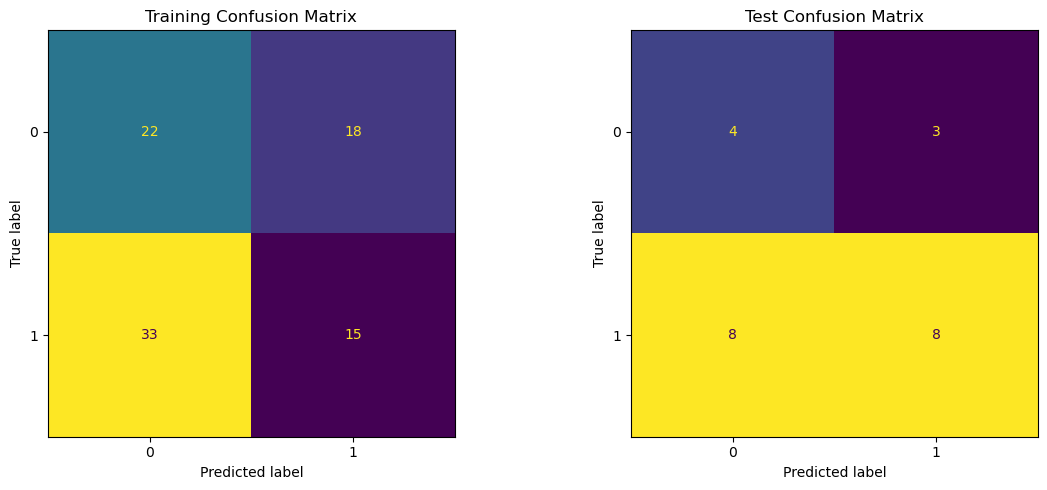

Parameters: learning_rate=0.01, max_attempts=50, mutation_prob=0.1, activation='relu'
Training Accuracy:  0.17045454545454544
Test Accuracy:  0.34782608695652173
Training Precision:  0.24793388429752064
Test Precision:  0.5059288537549407
Training Recall:  0.17045454545454544
Test Recall:  0.34782608695652173
Training F1:  0.20202020202020202
Test F1:  0.41223832528180354
Training ROC AUC:  0.43125
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.55      0.46        40
           1       0.45      0.31      0.37        48

    

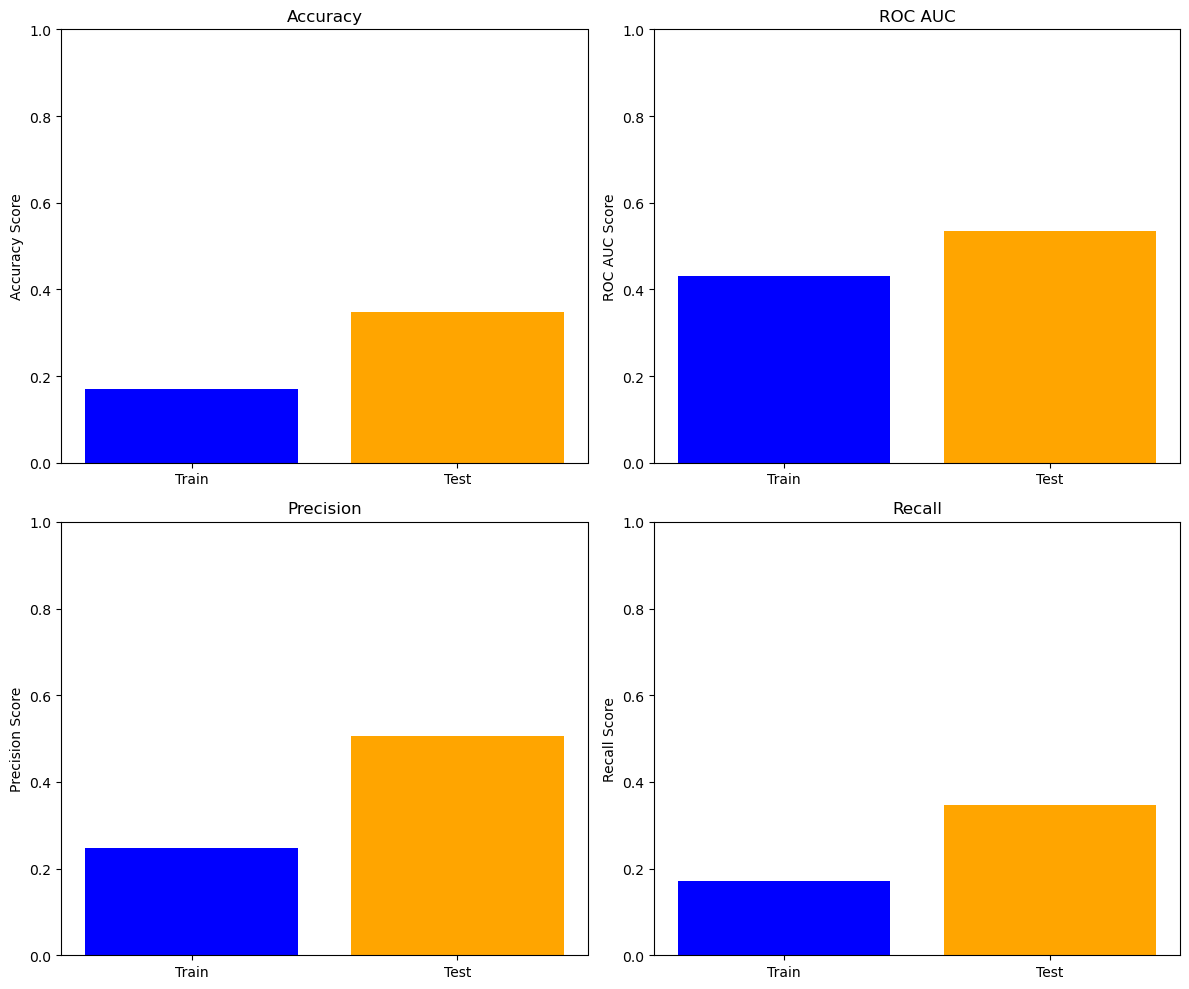

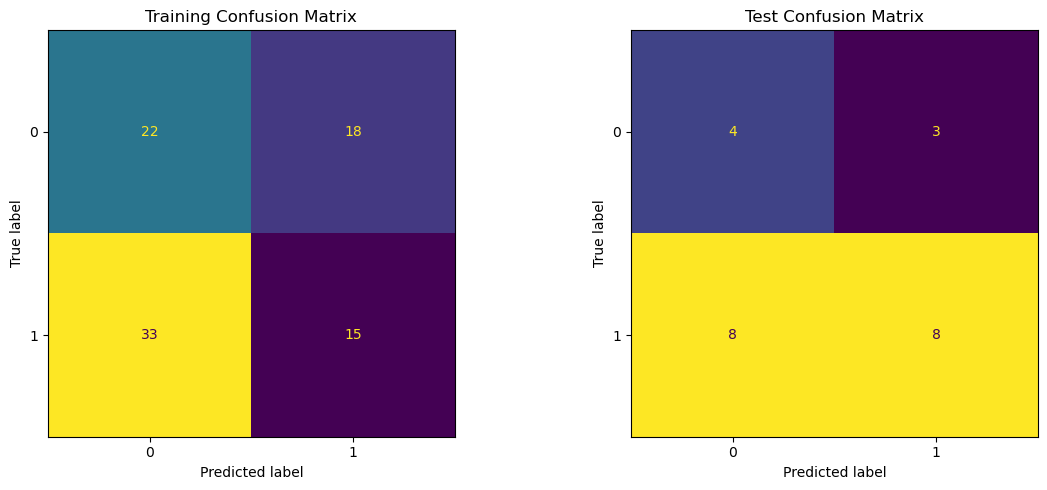

Parameters: learning_rate=0.01, max_attempts=50, mutation_prob=0.25, activation='relu'
Training Accuracy:  0.17045454545454544
Test Accuracy:  0.34782608695652173
Training Precision:  0.24793388429752064
Test Precision:  0.5059288537549407
Training Recall:  0.17045454545454544
Test Recall:  0.34782608695652173
Training F1:  0.20202020202020202
Test F1:  0.41223832528180354
Training ROC AUC:  0.43125
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.55      0.46        40
           1       0.45      0.31      0.37        48

   

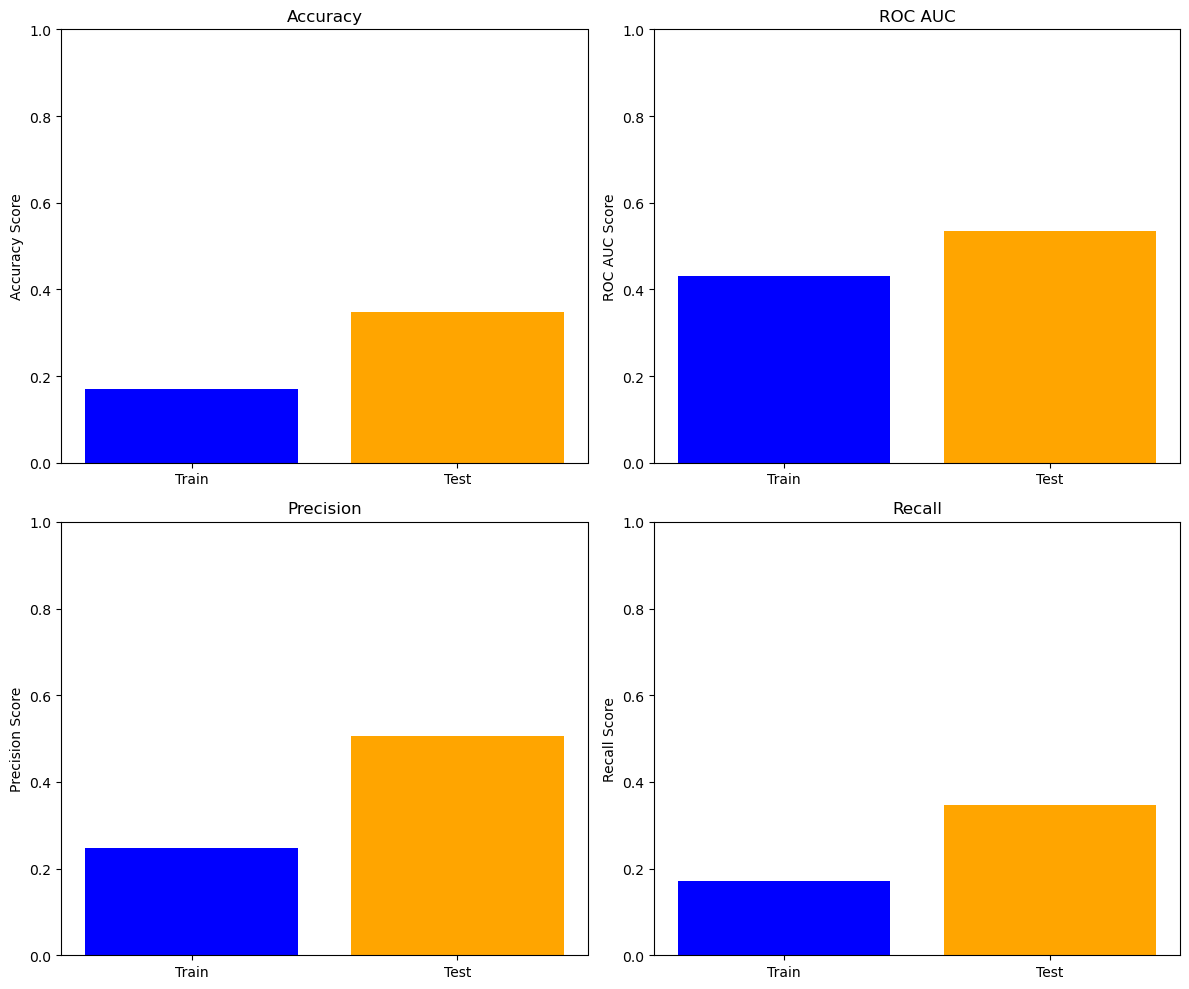

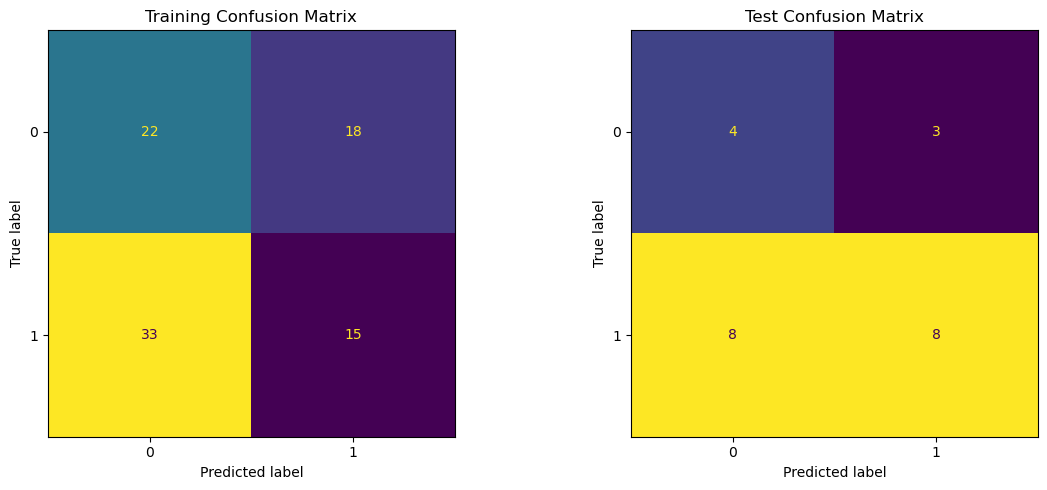

Parameters: learning_rate=0.01, max_attempts=50, mutation_prob=0.5, activation='relu'
Training Accuracy:  0.17045454545454544
Test Accuracy:  0.34782608695652173
Training Precision:  0.24793388429752064
Test Precision:  0.5059288537549407
Training Recall:  0.17045454545454544
Test Recall:  0.34782608695652173
Training F1:  0.20202020202020202
Test F1:  0.41223832528180354
Training ROC AUC:  0.43125
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.55      0.46        40
           1       0.45      0.31      0.37        48

    

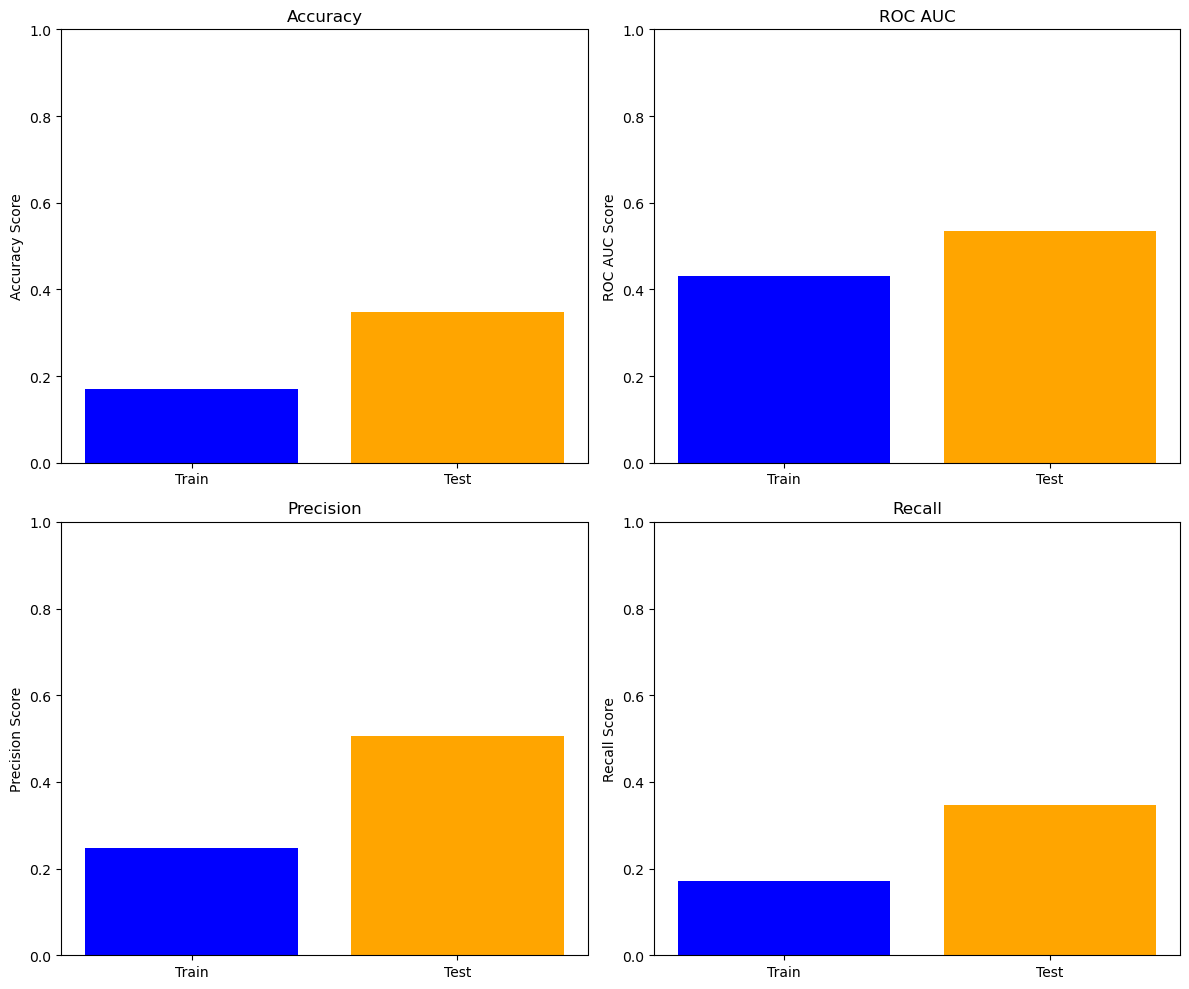

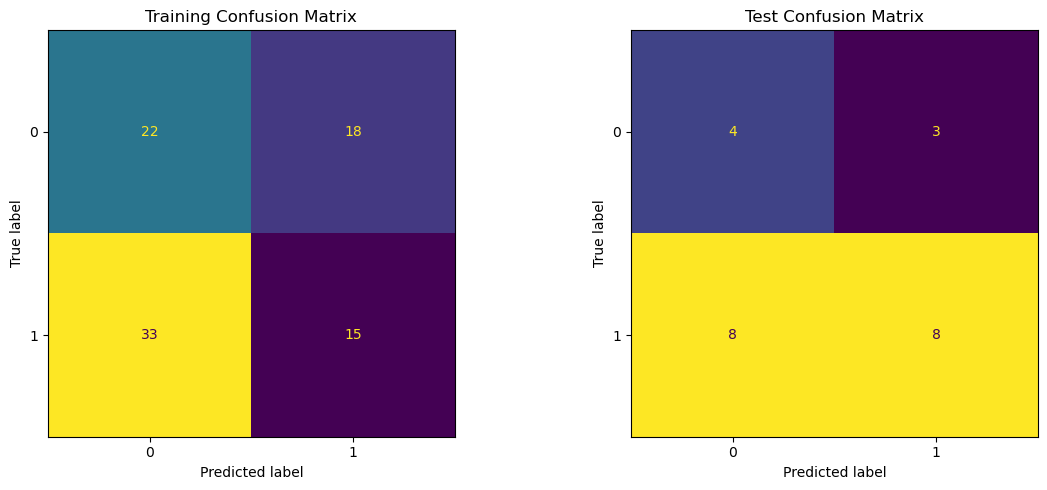

Parameters: learning_rate=0.01, max_attempts=100, mutation_prob=0.1, activation='relu'
Training Accuracy:  0.17045454545454544
Test Accuracy:  0.34782608695652173
Training Precision:  0.24793388429752064
Test Precision:  0.5059288537549407
Training Recall:  0.17045454545454544
Test Recall:  0.34782608695652173
Training F1:  0.20202020202020202
Test F1:  0.41223832528180354
Training ROC AUC:  0.43125
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.55      0.46        40
           1       0.45      0.31      0.37        48

   

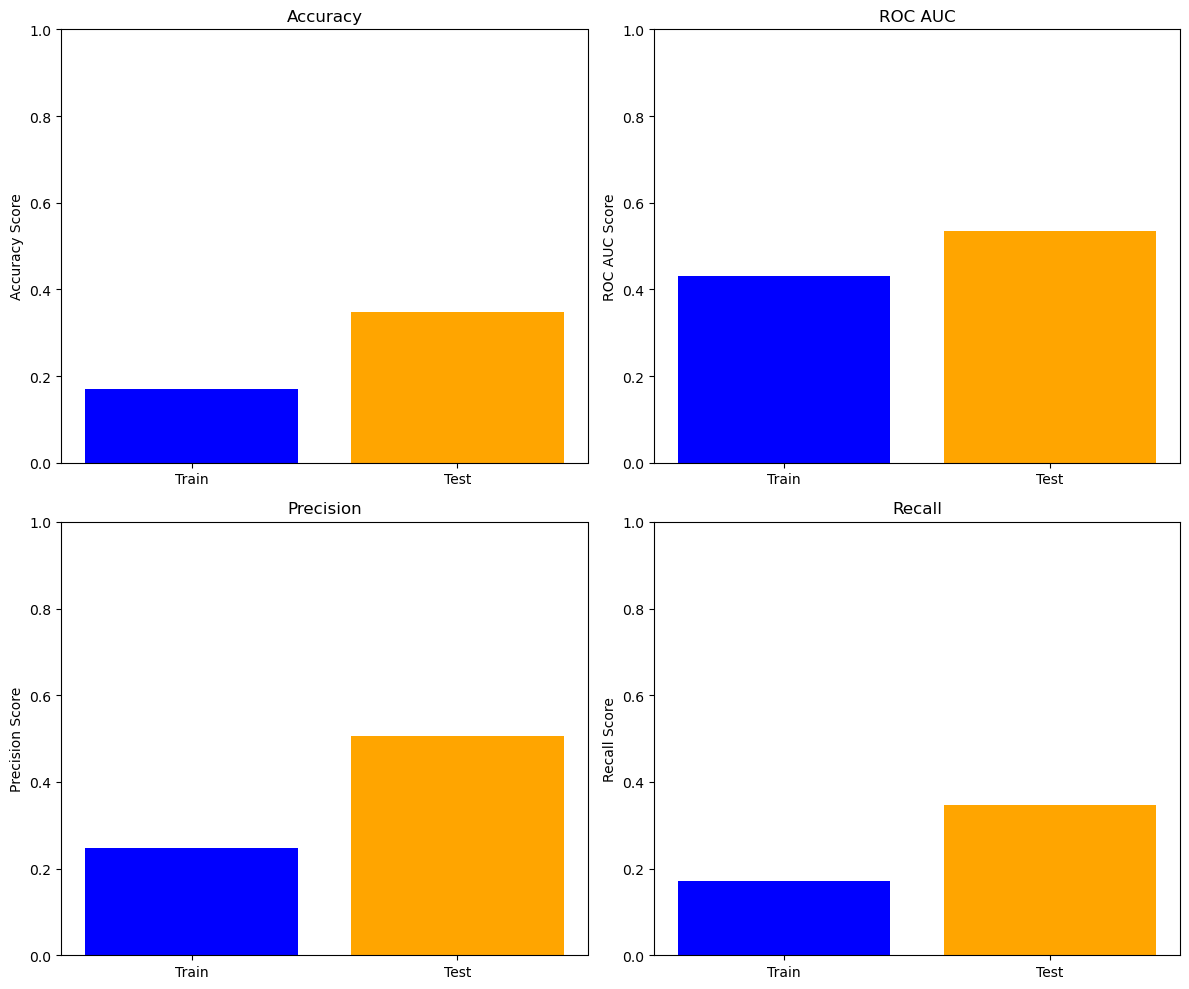

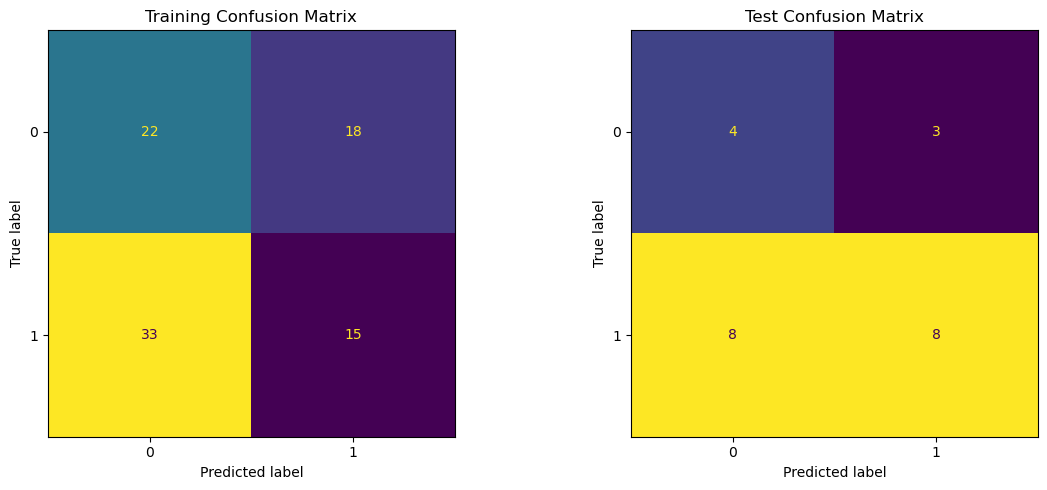

Parameters: learning_rate=0.01, max_attempts=100, mutation_prob=0.25, activation='relu'
Training Accuracy:  0.17045454545454544
Test Accuracy:  0.34782608695652173
Training Precision:  0.24793388429752064
Test Precision:  0.5059288537549407
Training Recall:  0.17045454545454544
Test Recall:  0.34782608695652173
Training F1:  0.20202020202020202
Test F1:  0.41223832528180354
Training ROC AUC:  0.43125
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.55      0.46        40
           1       0.45      0.31      0.37        48

  

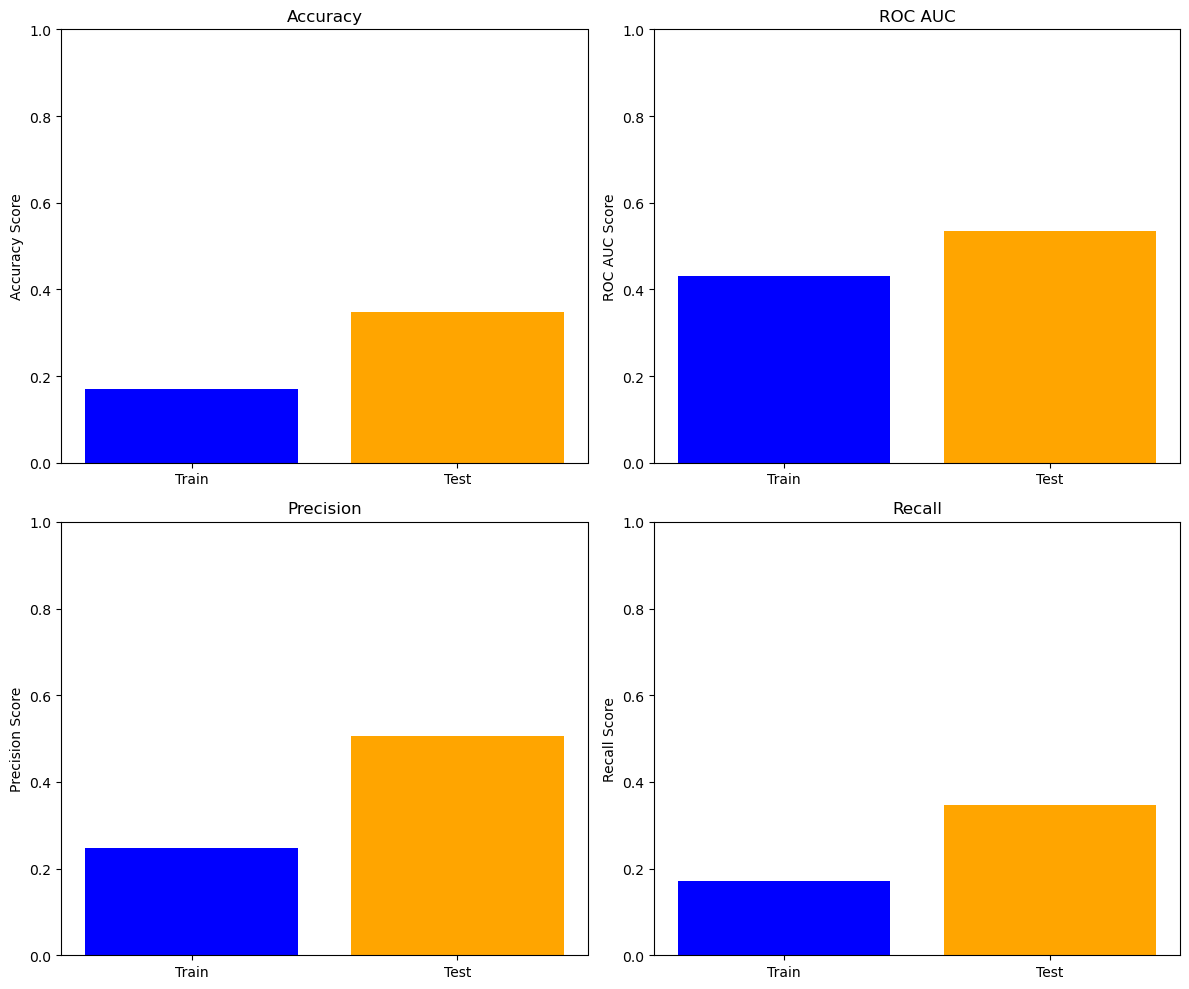

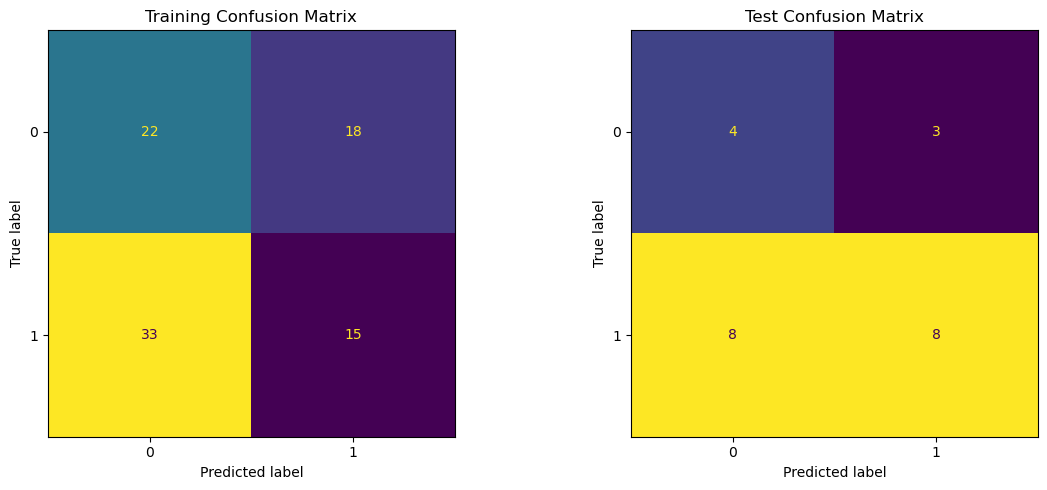

Parameters: learning_rate=0.01, max_attempts=100, mutation_prob=0.5, activation='relu'
Training Accuracy:  0.17045454545454544
Test Accuracy:  0.34782608695652173
Training Precision:  0.24793388429752064
Test Precision:  0.5059288537549407
Training Recall:  0.17045454545454544
Test Recall:  0.34782608695652173
Training F1:  0.20202020202020202
Test F1:  0.41223832528180354
Training ROC AUC:  0.43125
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.55      0.46        40
           1       0.45      0.31      0.37        48

   

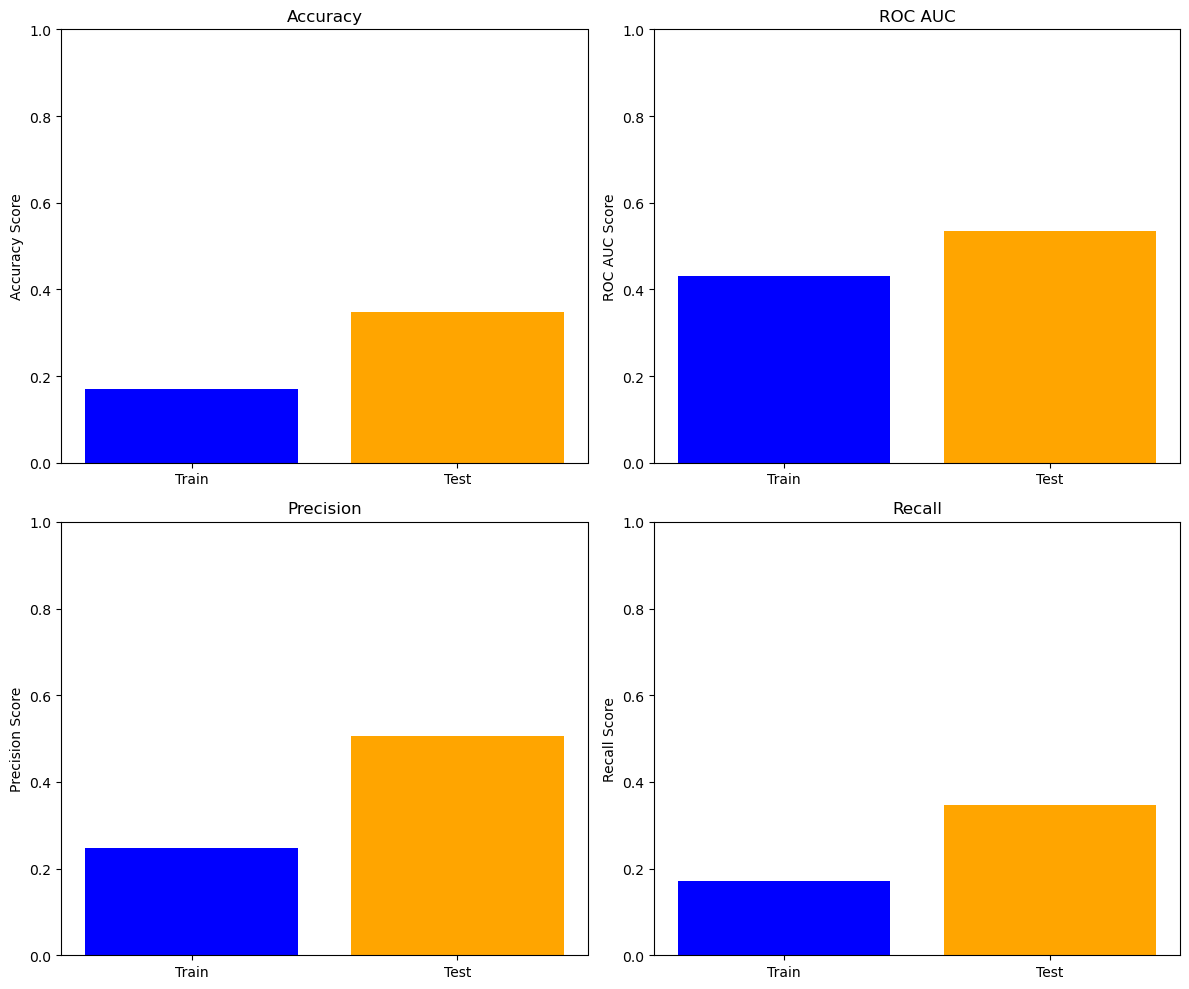

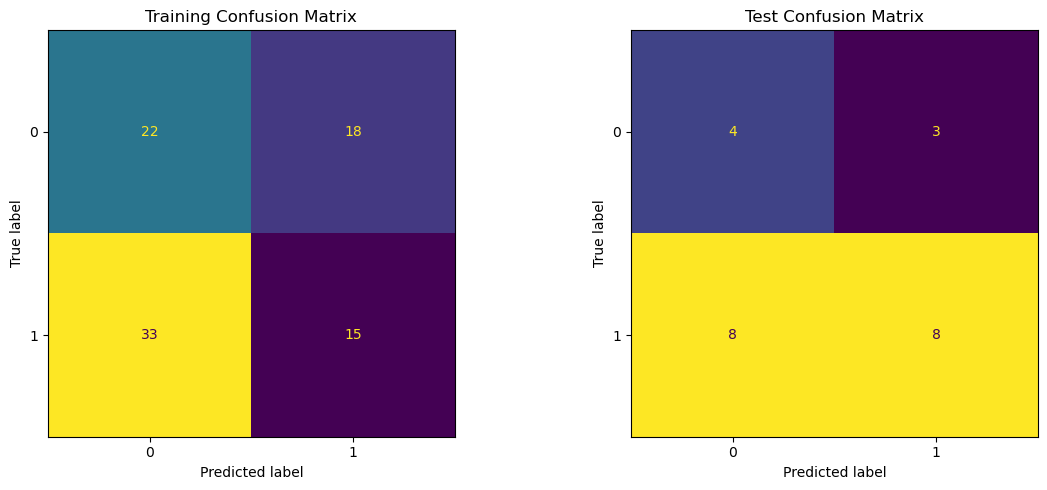

Parameters: learning_rate=0.001, max_attempts=5, mutation_prob=0.1, activation='relu'
Training Accuracy:  0.125
Test Accuracy:  0.34782608695652173
Training Precision:  0.23076923076923075
Test Precision:  0.5059288537549407
Training Recall:  0.125
Test Recall:  0.34782608695652173
Training F1:  0.16216216216216217
Test F1:  0.41223832528180354
Training ROC AUC:  0.42708333333333337
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        40
           1       0.42      0.23      0.30        48

    accuracy        

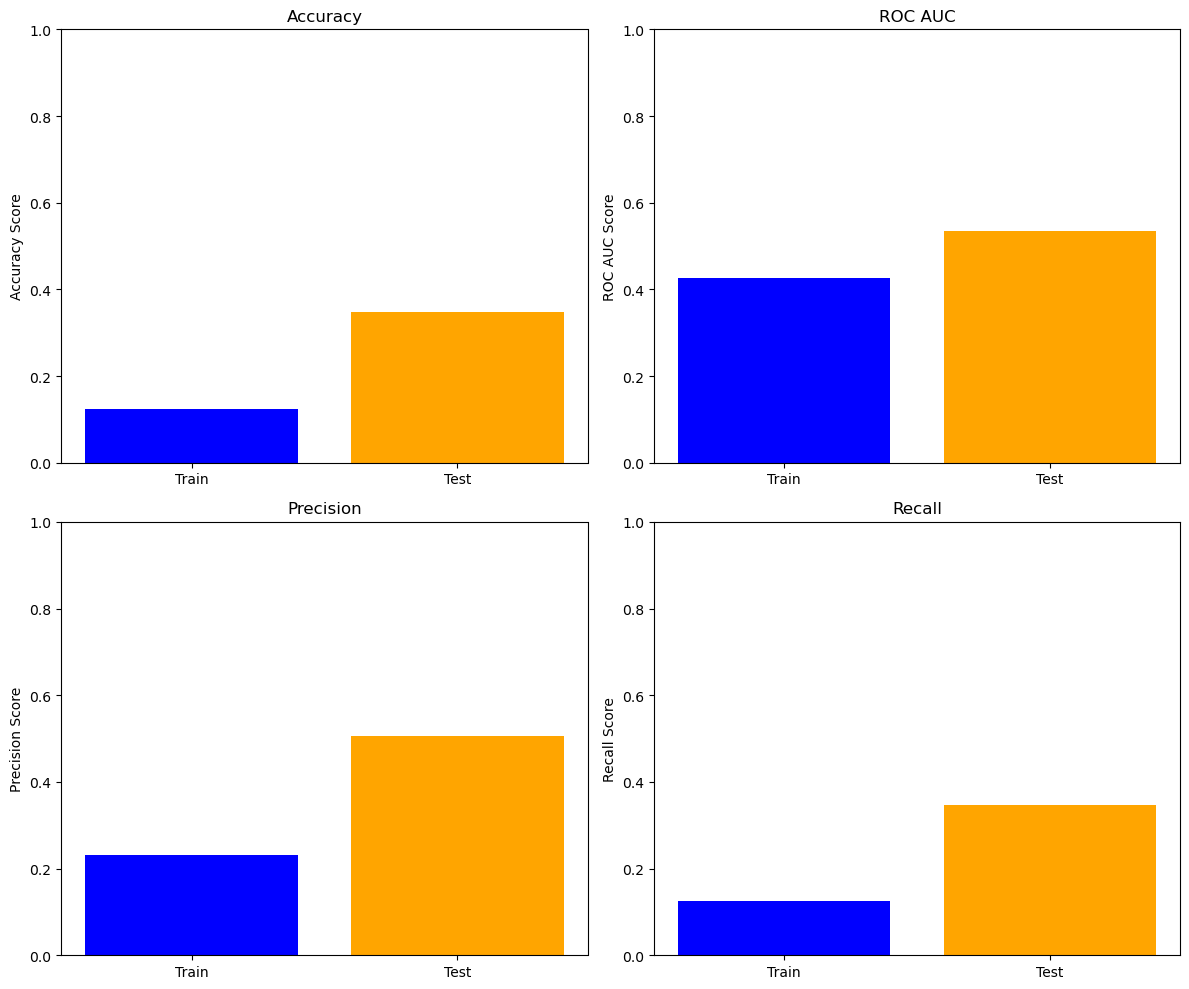

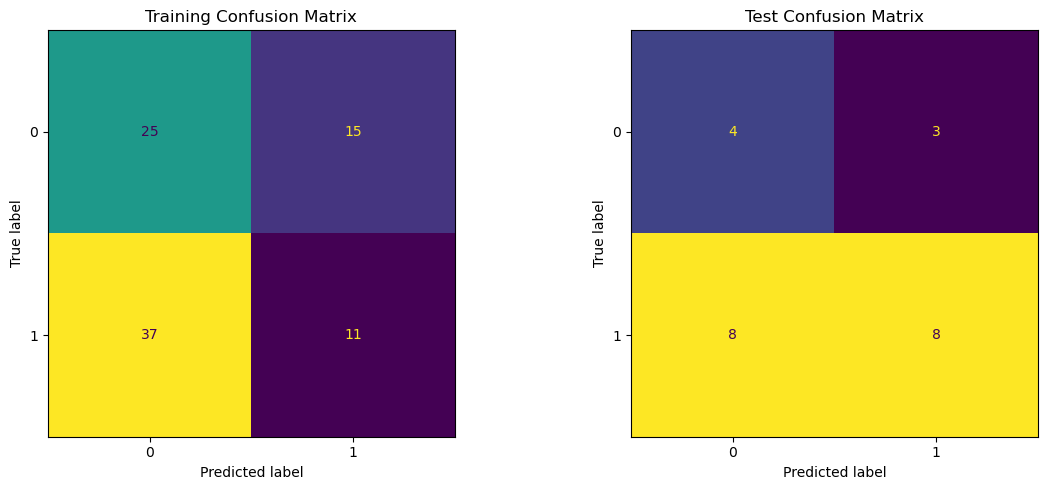

Parameters: learning_rate=0.001, max_attempts=5, mutation_prob=0.25, activation='relu'
Training Accuracy:  0.125
Test Accuracy:  0.34782608695652173
Training Precision:  0.23076923076923075
Test Precision:  0.5059288537549407
Training Recall:  0.125
Test Recall:  0.34782608695652173
Training F1:  0.16216216216216217
Test F1:  0.41223832528180354
Training ROC AUC:  0.42708333333333337
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        40
           1       0.42      0.23      0.30        48

    accuracy       

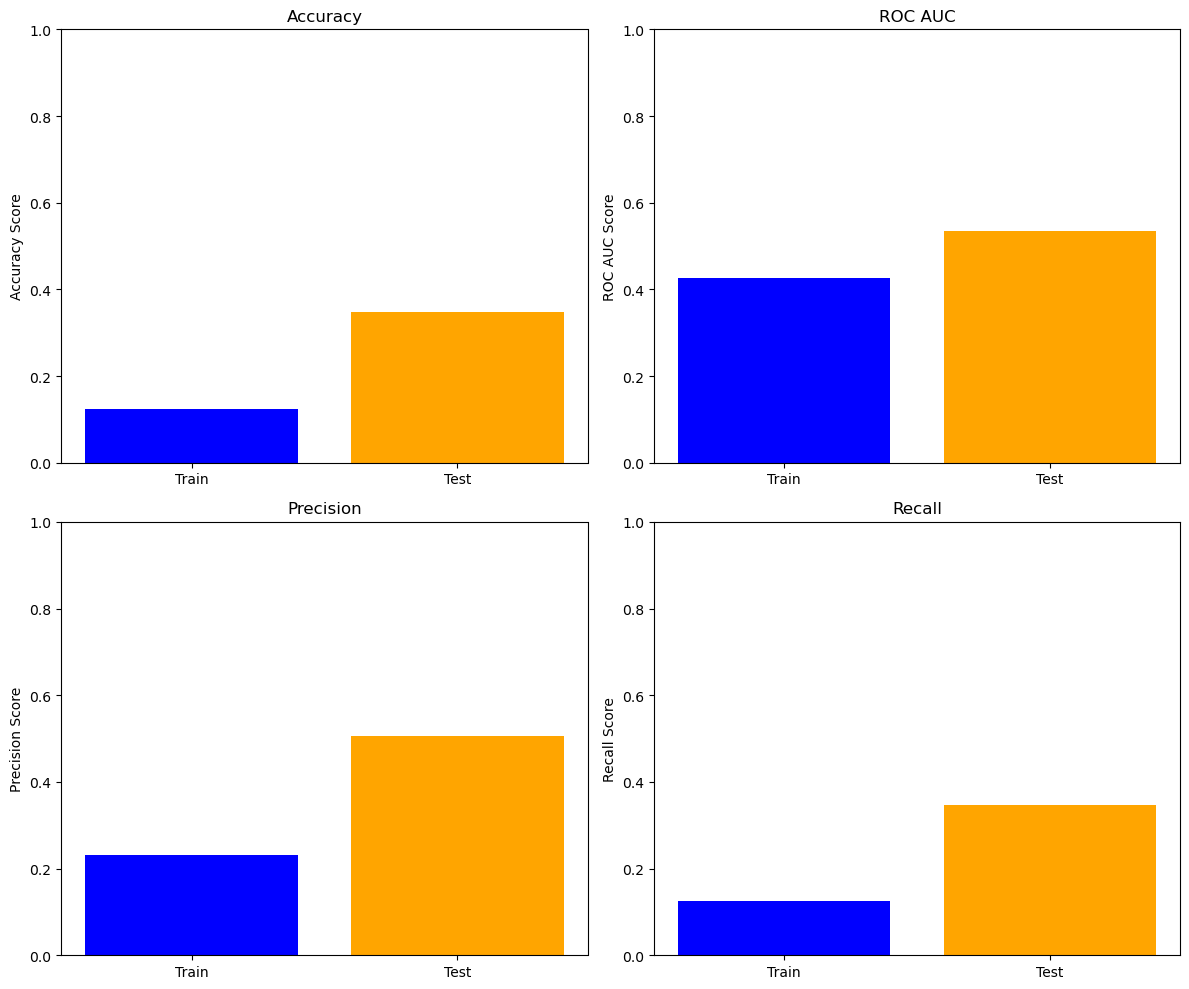

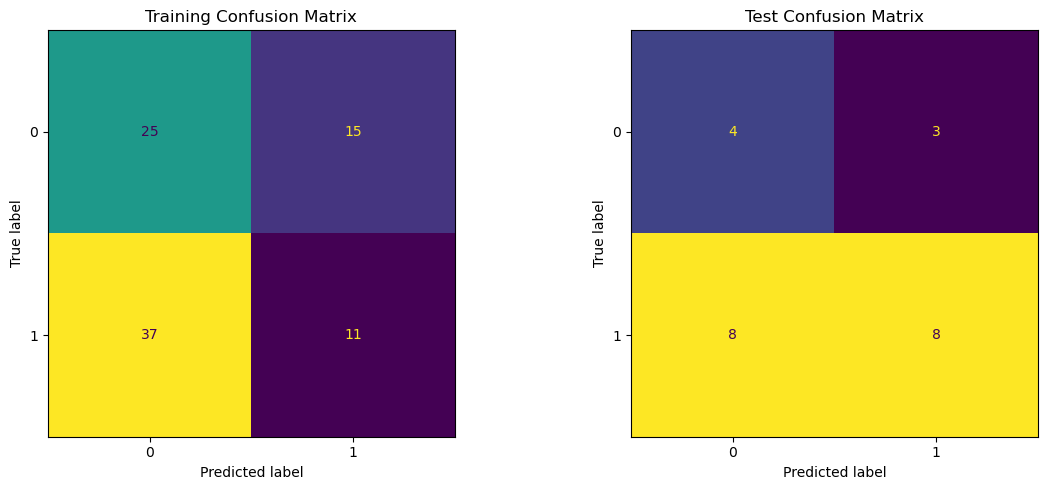

Parameters: learning_rate=0.001, max_attempts=5, mutation_prob=0.5, activation='relu'
Training Accuracy:  0.125
Test Accuracy:  0.34782608695652173
Training Precision:  0.23076923076923075
Test Precision:  0.5059288537549407
Training Recall:  0.125
Test Recall:  0.34782608695652173
Training F1:  0.16216216216216217
Test F1:  0.41223832528180354
Training ROC AUC:  0.42708333333333337
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        40
           1       0.42      0.23      0.30        48

    accuracy        

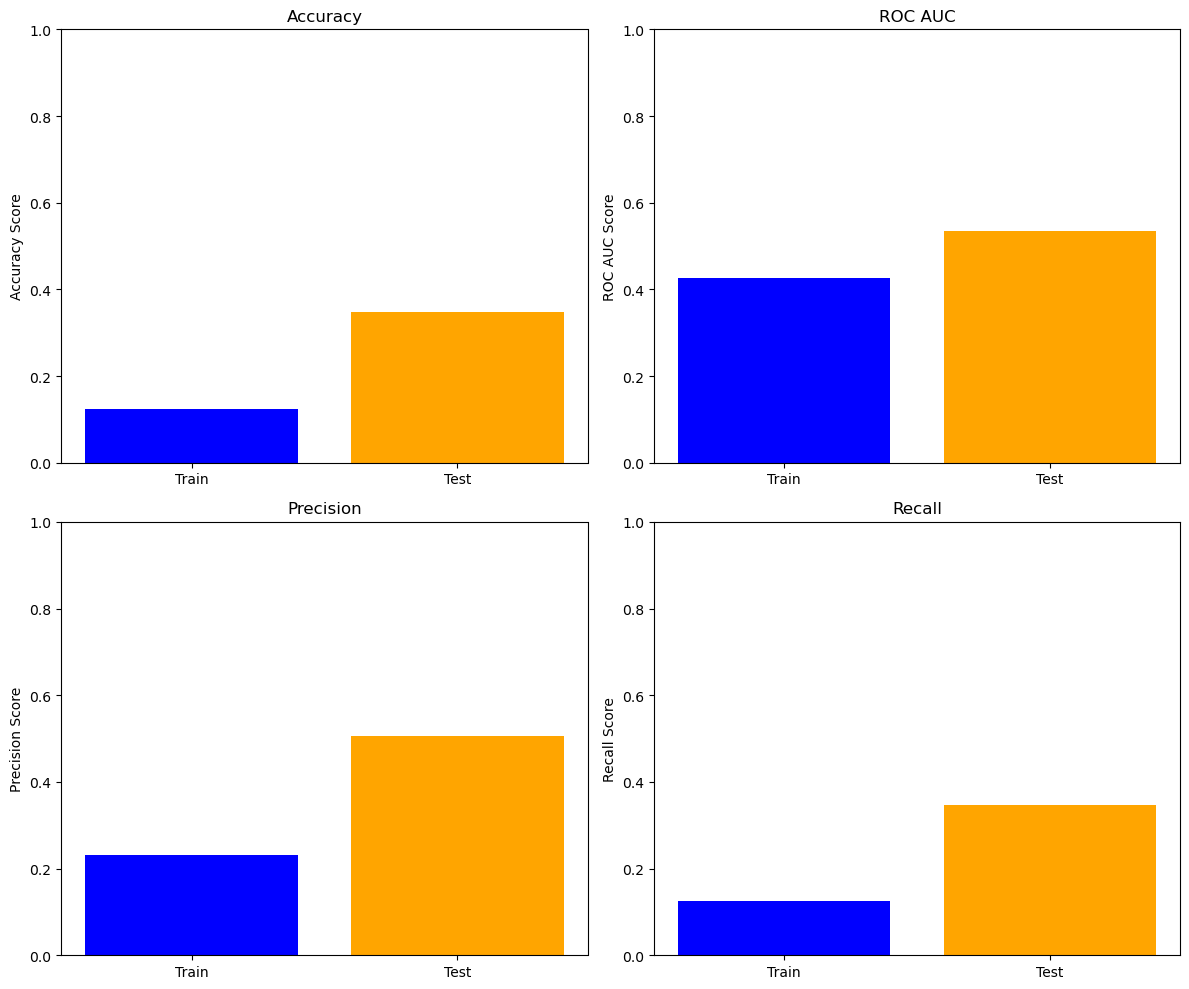

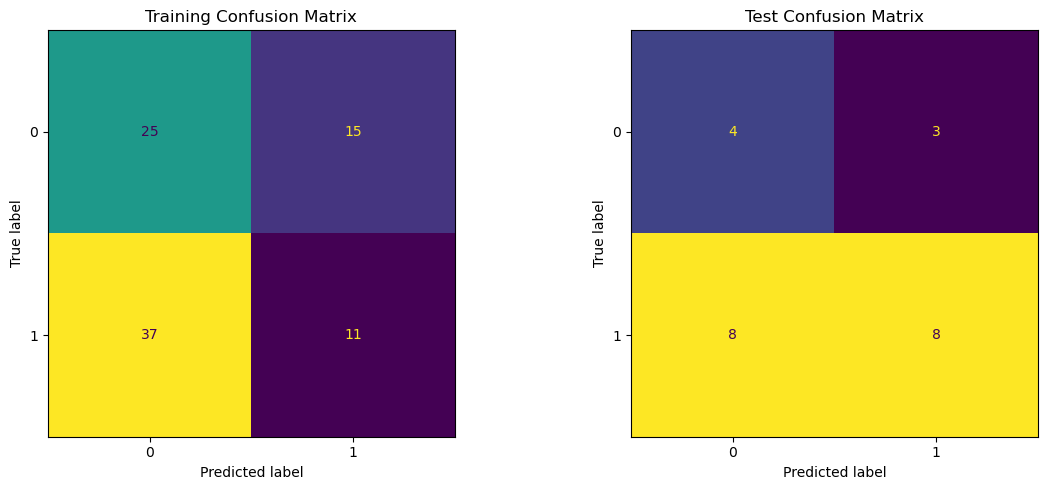

Parameters: learning_rate=0.001, max_attempts=25, mutation_prob=0.1, activation='relu'
Training Accuracy:  0.125
Test Accuracy:  0.34782608695652173
Training Precision:  0.23076923076923075
Test Precision:  0.5059288537549407
Training Recall:  0.125
Test Recall:  0.34782608695652173
Training F1:  0.16216216216216217
Test F1:  0.41223832528180354
Training ROC AUC:  0.42708333333333337
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        40
           1       0.42      0.23      0.30        48

    accuracy       

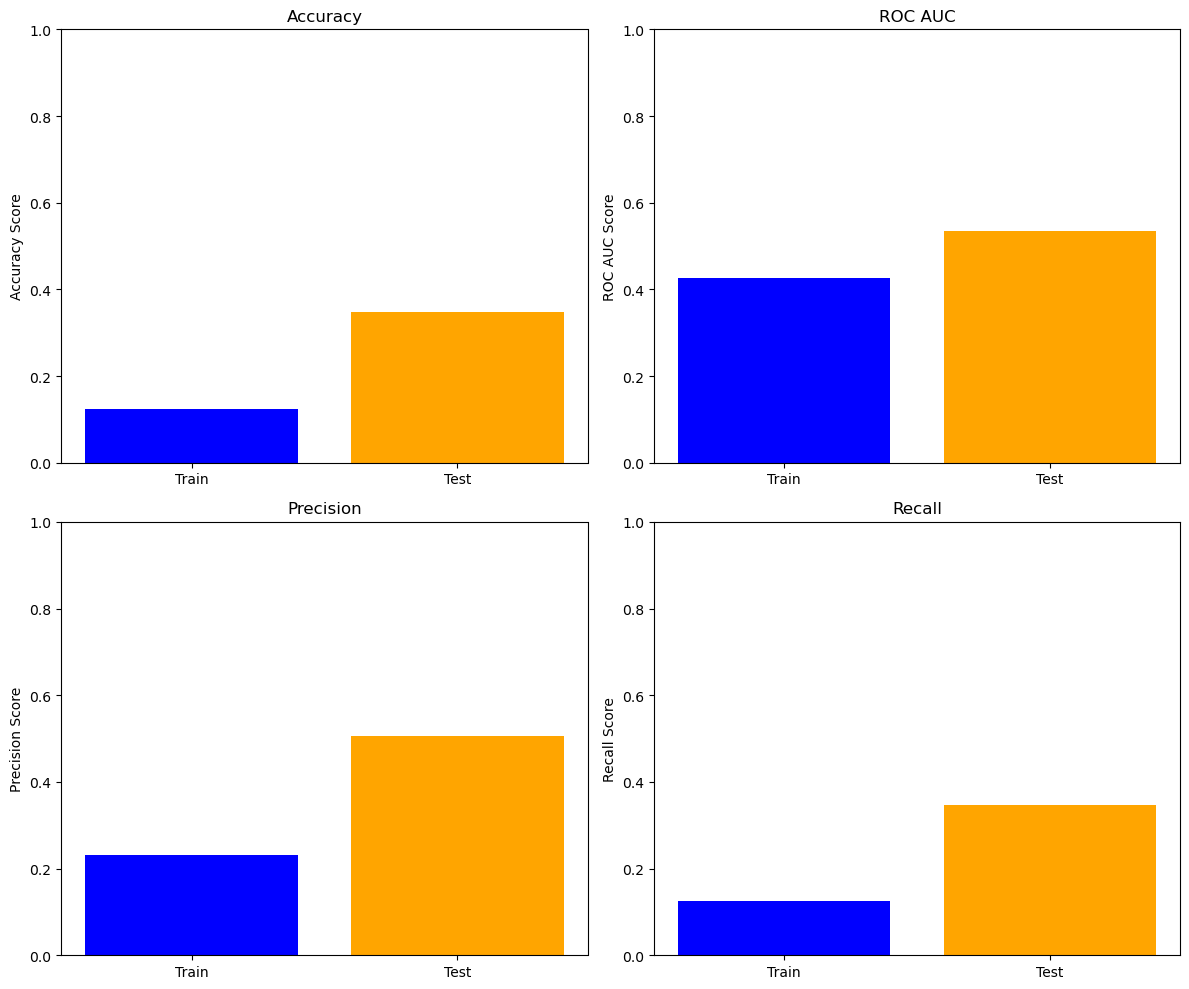

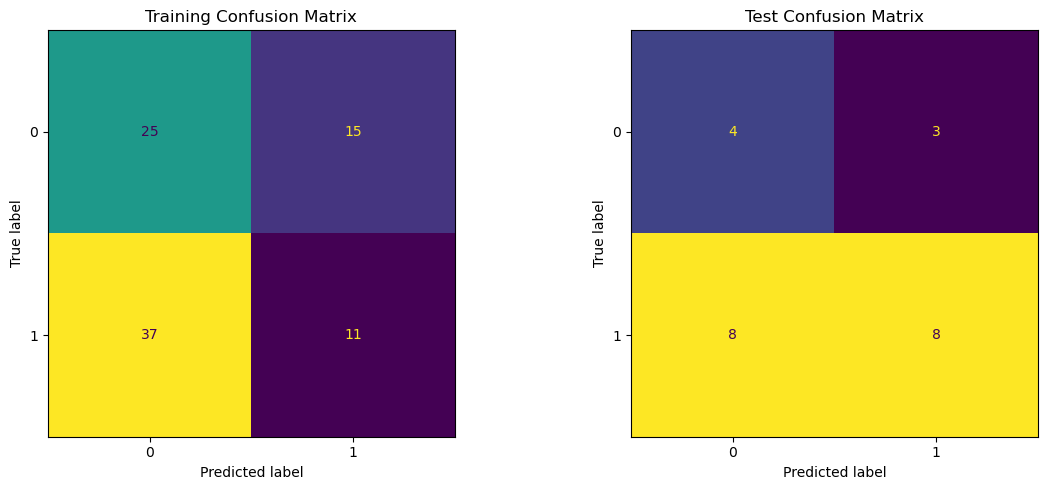

Parameters: learning_rate=0.001, max_attempts=25, mutation_prob=0.25, activation='relu'
Training Accuracy:  0.125
Test Accuracy:  0.34782608695652173
Training Precision:  0.23076923076923075
Test Precision:  0.5059288537549407
Training Recall:  0.125
Test Recall:  0.34782608695652173
Training F1:  0.16216216216216217
Test F1:  0.41223832528180354
Training ROC AUC:  0.42708333333333337
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        40
           1       0.42      0.23      0.30        48

    accuracy      

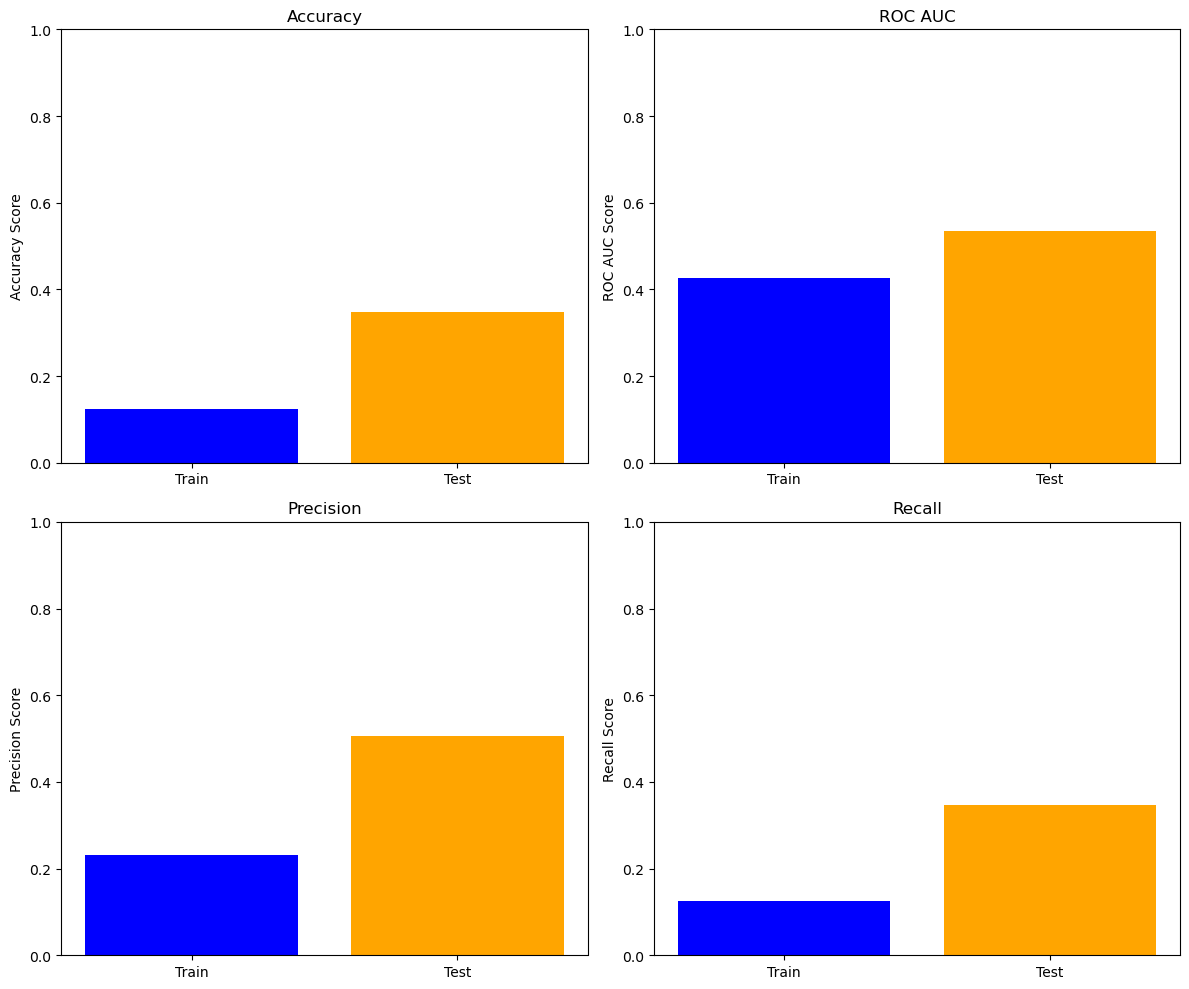

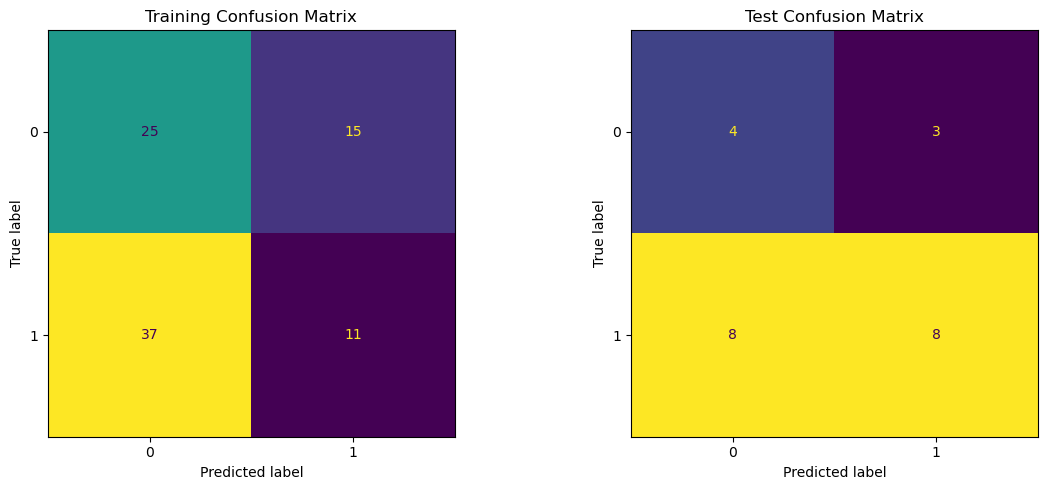

Parameters: learning_rate=0.001, max_attempts=25, mutation_prob=0.5, activation='relu'
Training Accuracy:  0.125
Test Accuracy:  0.34782608695652173
Training Precision:  0.23076923076923075
Test Precision:  0.5059288537549407
Training Recall:  0.125
Test Recall:  0.34782608695652173
Training F1:  0.16216216216216217
Test F1:  0.41223832528180354
Training ROC AUC:  0.42708333333333337
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        40
           1       0.42      0.23      0.30        48

    accuracy       

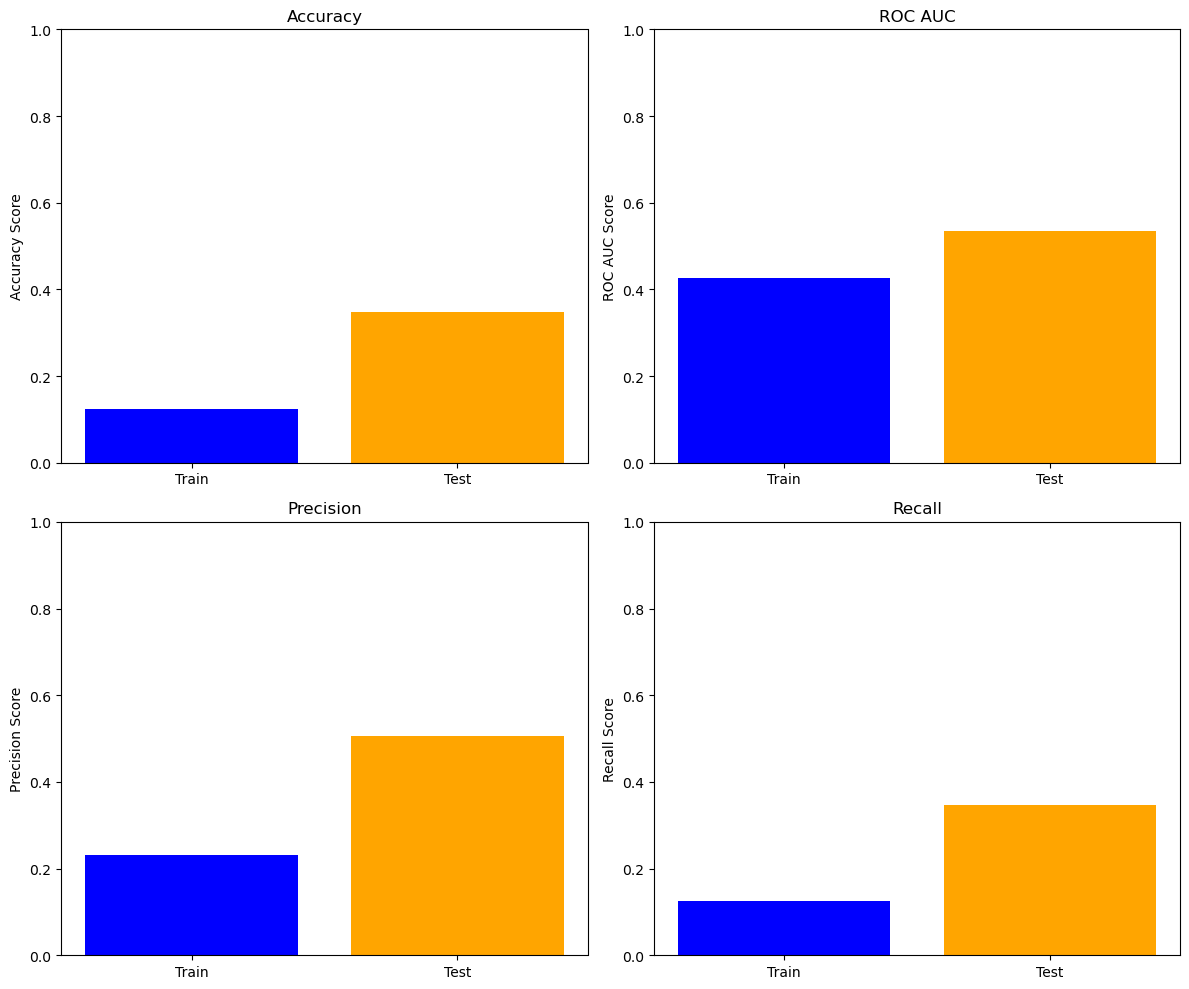

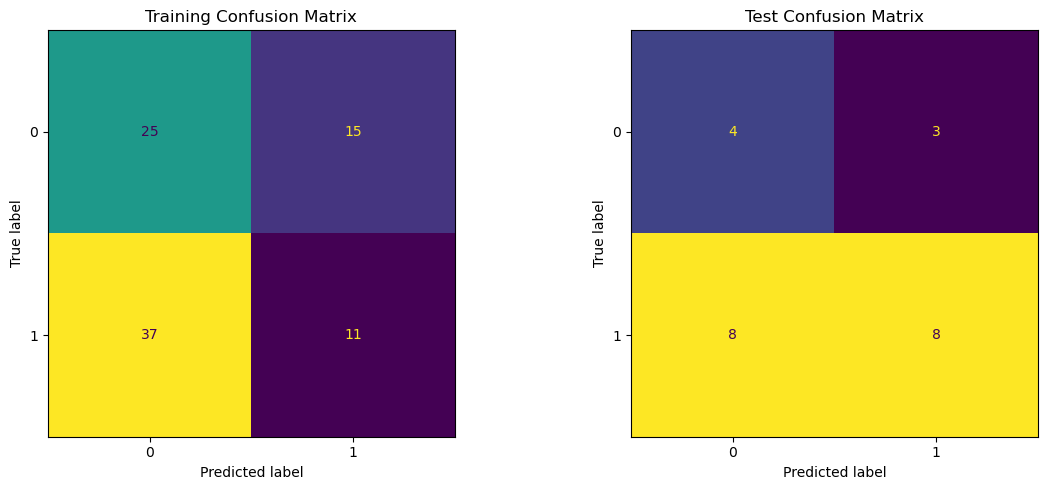

Parameters: learning_rate=0.001, max_attempts=50, mutation_prob=0.1, activation='relu'
Training Accuracy:  0.125
Test Accuracy:  0.34782608695652173
Training Precision:  0.23076923076923075
Test Precision:  0.5059288537549407
Training Recall:  0.125
Test Recall:  0.34782608695652173
Training F1:  0.16216216216216217
Test F1:  0.41223832528180354
Training ROC AUC:  0.42708333333333337
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        40
           1       0.42      0.23      0.30        48

    accuracy       

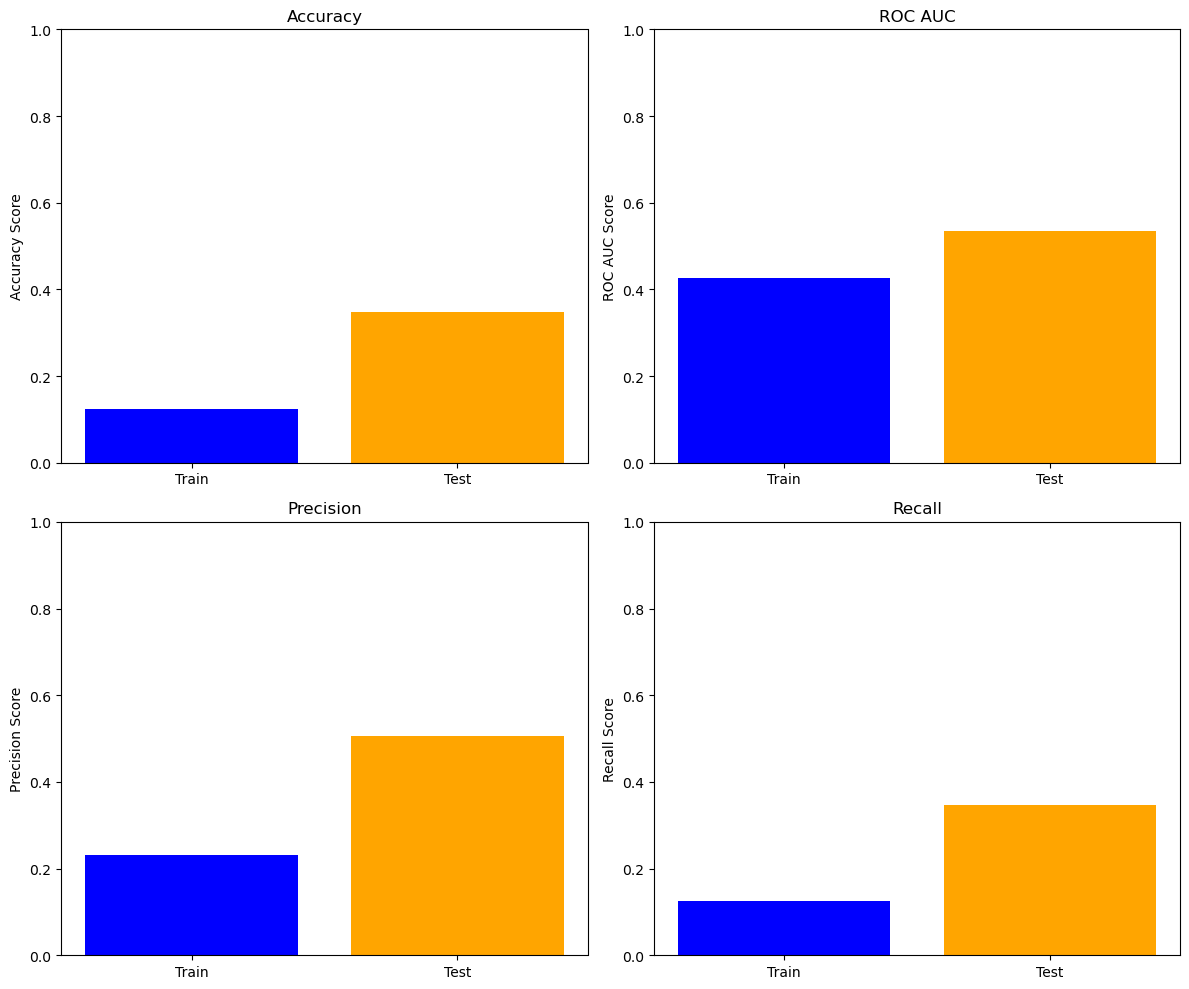

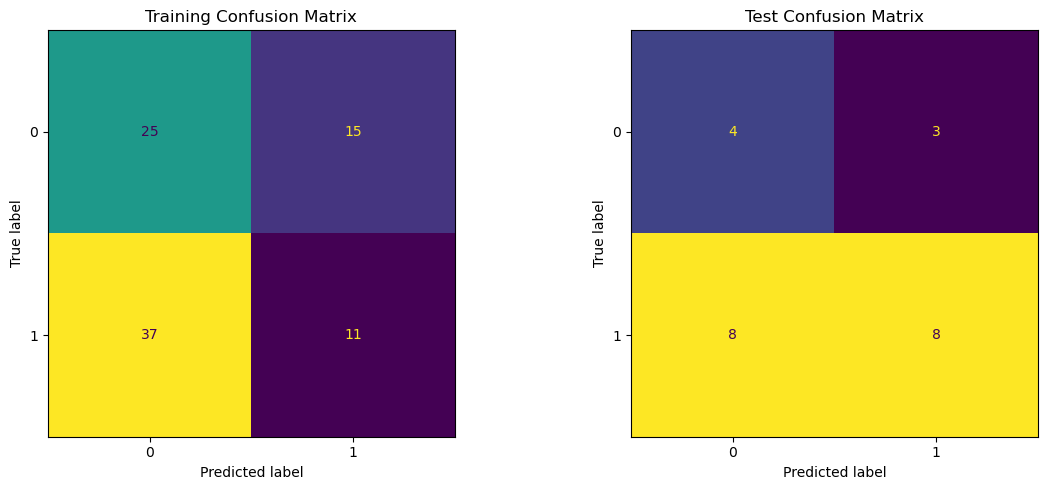

Parameters: learning_rate=0.001, max_attempts=50, mutation_prob=0.25, activation='relu'
Training Accuracy:  0.125
Test Accuracy:  0.34782608695652173
Training Precision:  0.23076923076923075
Test Precision:  0.5059288537549407
Training Recall:  0.125
Test Recall:  0.34782608695652173
Training F1:  0.16216216216216217
Test F1:  0.41223832528180354
Training ROC AUC:  0.42708333333333337
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        40
           1       0.42      0.23      0.30        48

    accuracy      

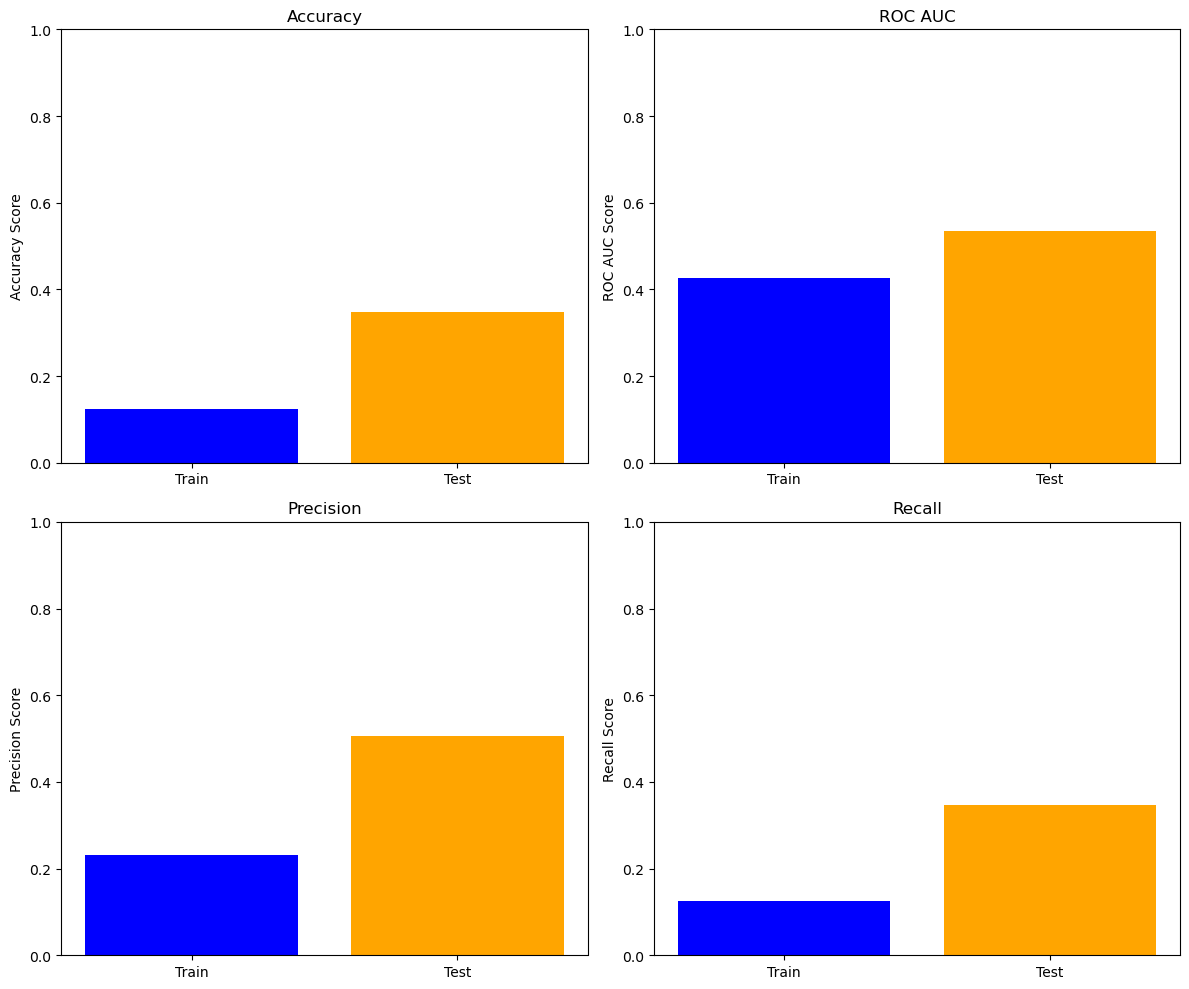

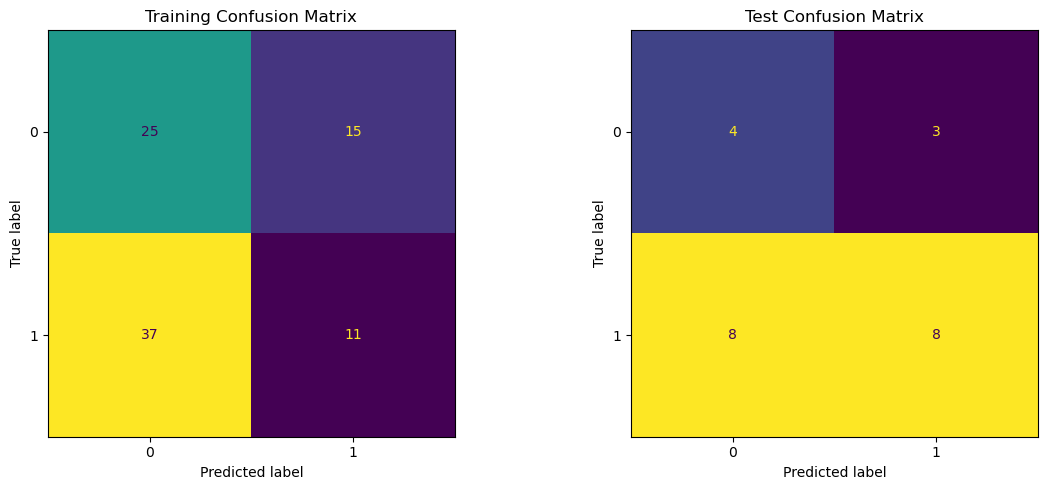

Parameters: learning_rate=0.001, max_attempts=50, mutation_prob=0.5, activation='relu'
Training Accuracy:  0.125
Test Accuracy:  0.34782608695652173
Training Precision:  0.23076923076923075
Test Precision:  0.5059288537549407
Training Recall:  0.125
Test Recall:  0.34782608695652173
Training F1:  0.16216216216216217
Test F1:  0.41223832528180354
Training ROC AUC:  0.42708333333333337
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        40
           1       0.42      0.23      0.30        48

    accuracy       

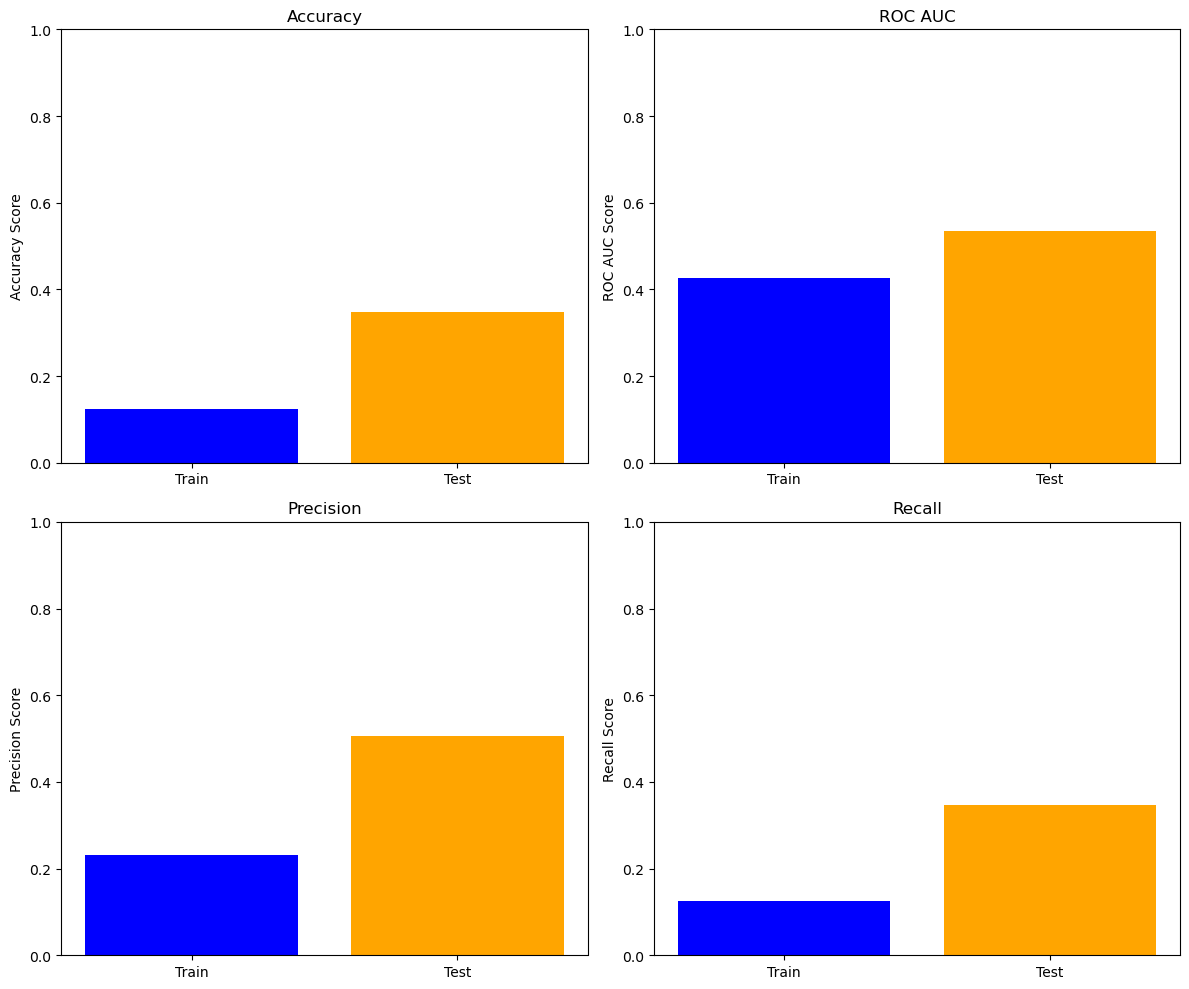

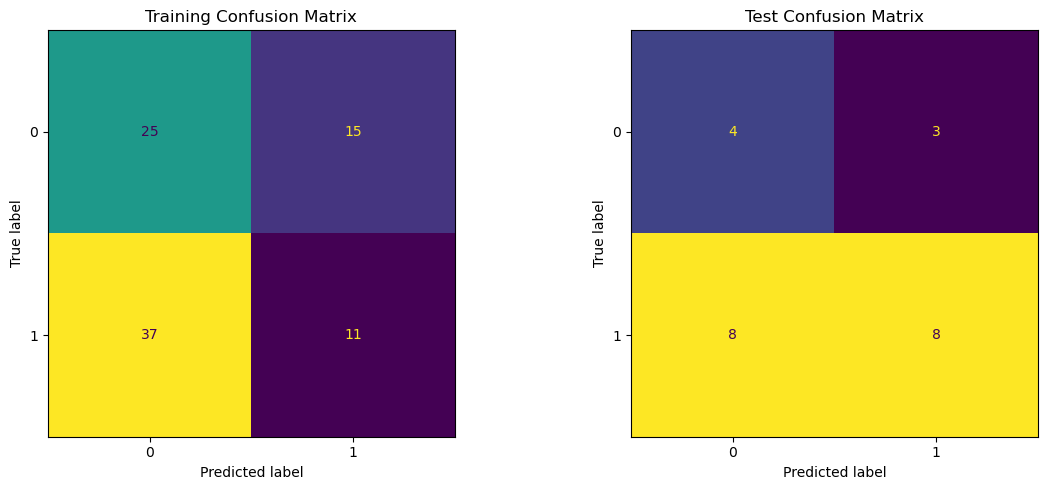

Parameters: learning_rate=0.001, max_attempts=100, mutation_prob=0.1, activation='relu'
Training Accuracy:  0.125
Test Accuracy:  0.34782608695652173
Training Precision:  0.23076923076923075
Test Precision:  0.5059288537549407
Training Recall:  0.125
Test Recall:  0.34782608695652173
Training F1:  0.16216216216216217
Test F1:  0.41223832528180354
Training ROC AUC:  0.42708333333333337
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        40
           1       0.42      0.23      0.30        48

    accuracy      

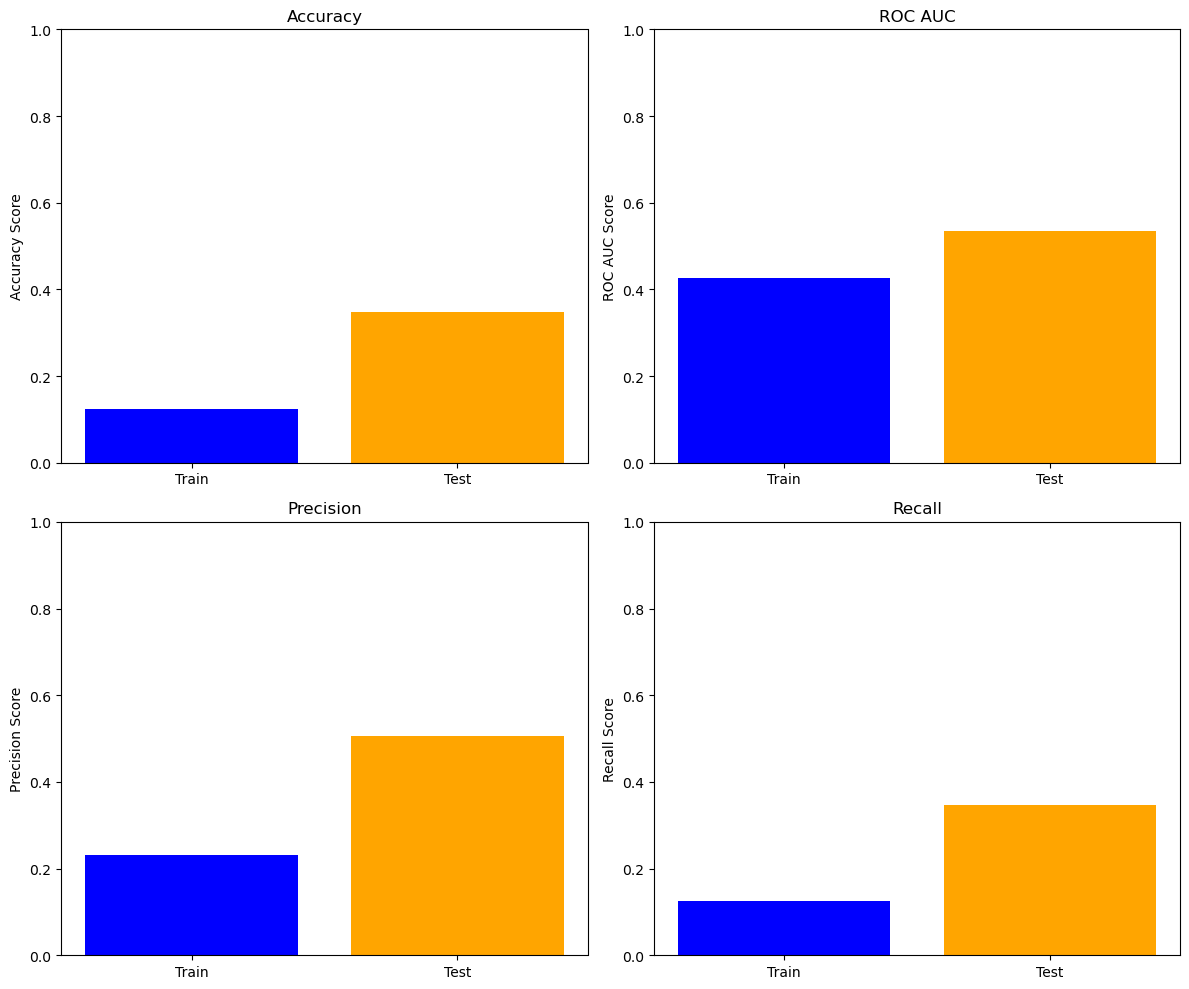

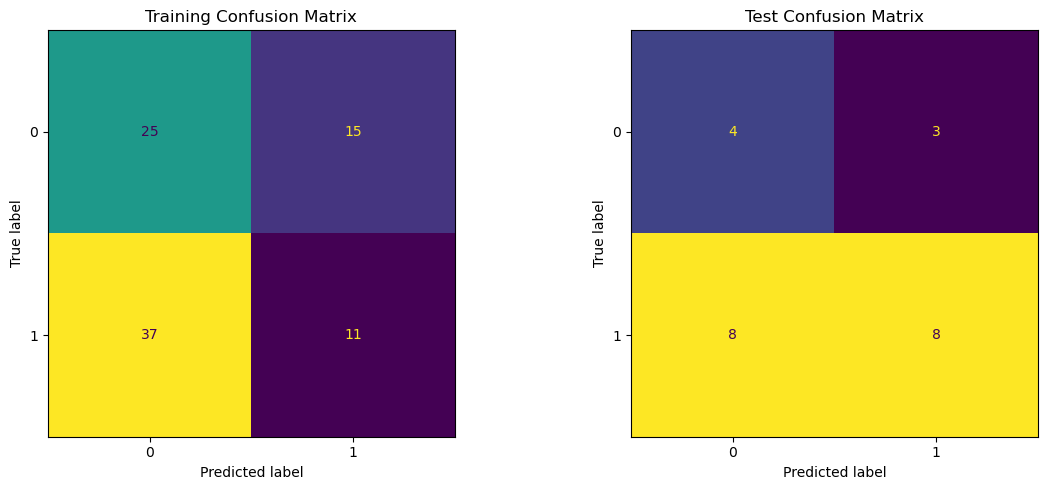

Parameters: learning_rate=0.001, max_attempts=100, mutation_prob=0.25, activation='relu'
Training Accuracy:  0.125
Test Accuracy:  0.34782608695652173
Training Precision:  0.23076923076923075
Test Precision:  0.5059288537549407
Training Recall:  0.125
Test Recall:  0.34782608695652173
Training F1:  0.16216216216216217
Test F1:  0.41223832528180354
Training ROC AUC:  0.42708333333333337
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        40
           1       0.42      0.23      0.30        48

    accuracy     

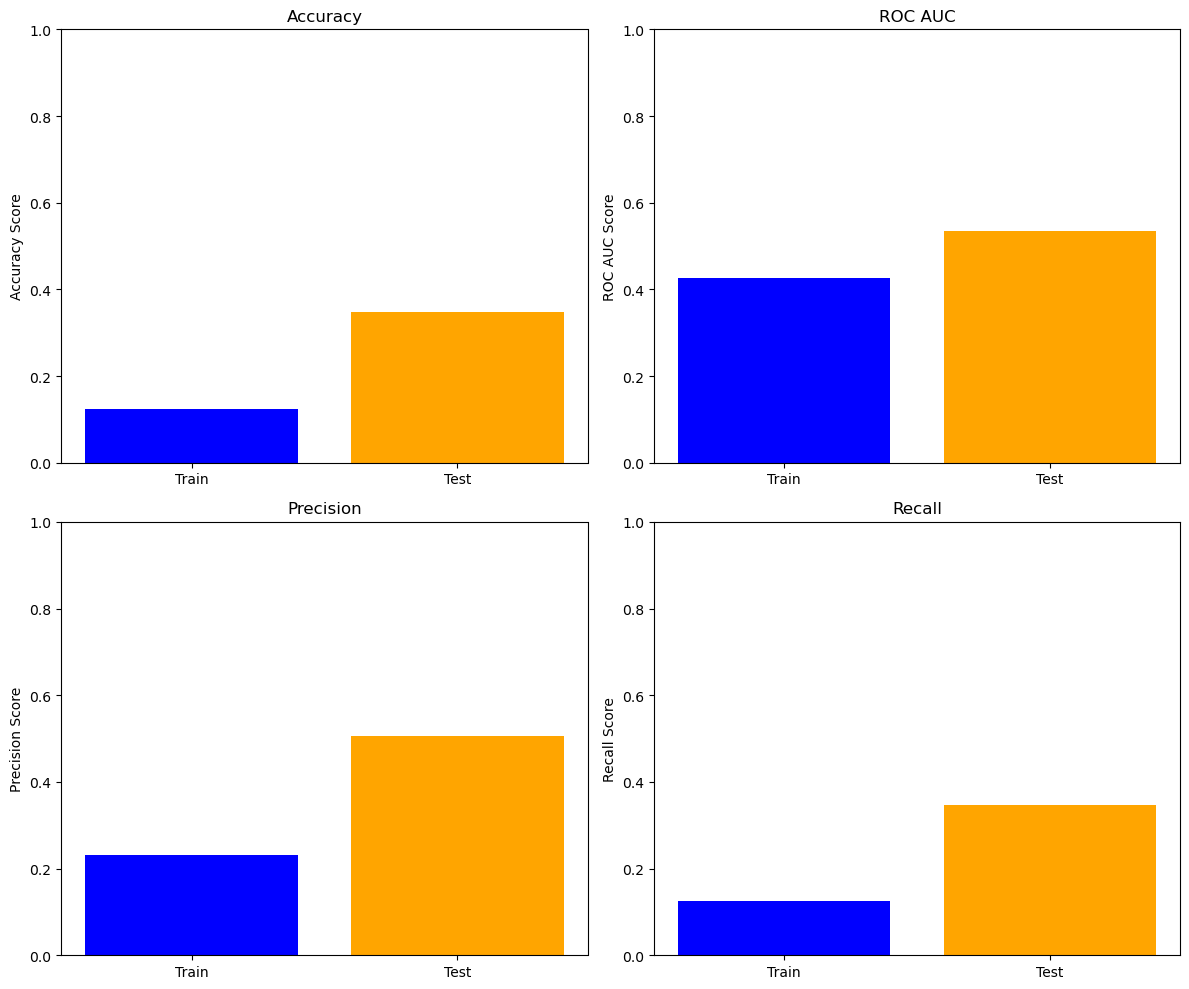

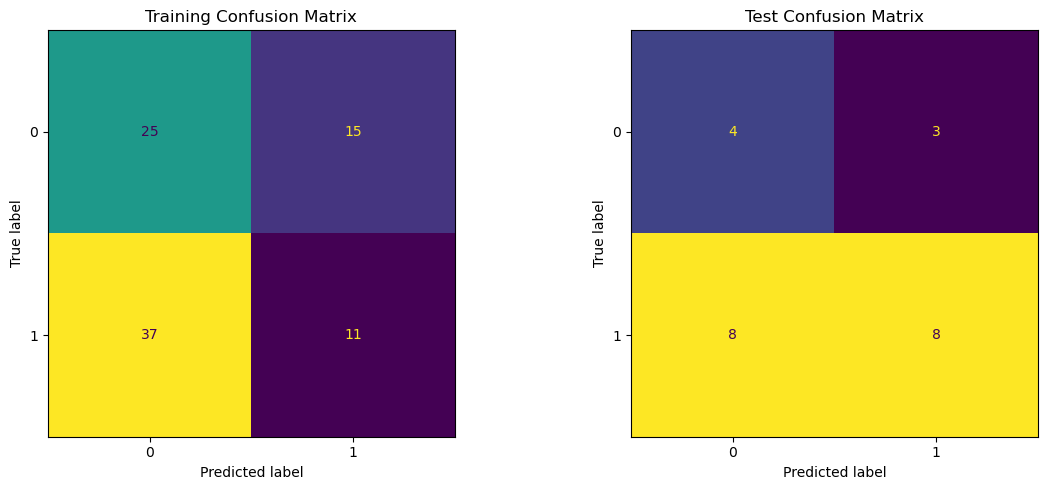

Parameters: learning_rate=0.001, max_attempts=100, mutation_prob=0.5, activation='relu'
Training Accuracy:  0.125
Test Accuracy:  0.34782608695652173
Training Precision:  0.23076923076923075
Test Precision:  0.5059288537549407
Training Recall:  0.125
Test Recall:  0.34782608695652173
Training F1:  0.16216216216216217
Test F1:  0.41223832528180354
Training ROC AUC:  0.42708333333333337
Test ROC AUC:  0.5357142857142857

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.73      0.50      0.59        16

    accuracy                           0.52        23
   macro avg       0.53      0.54      0.51        23
weighted avg       0.61      0.52      0.54        23

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        40
           1       0.42      0.23      0.30        48

    accuracy      

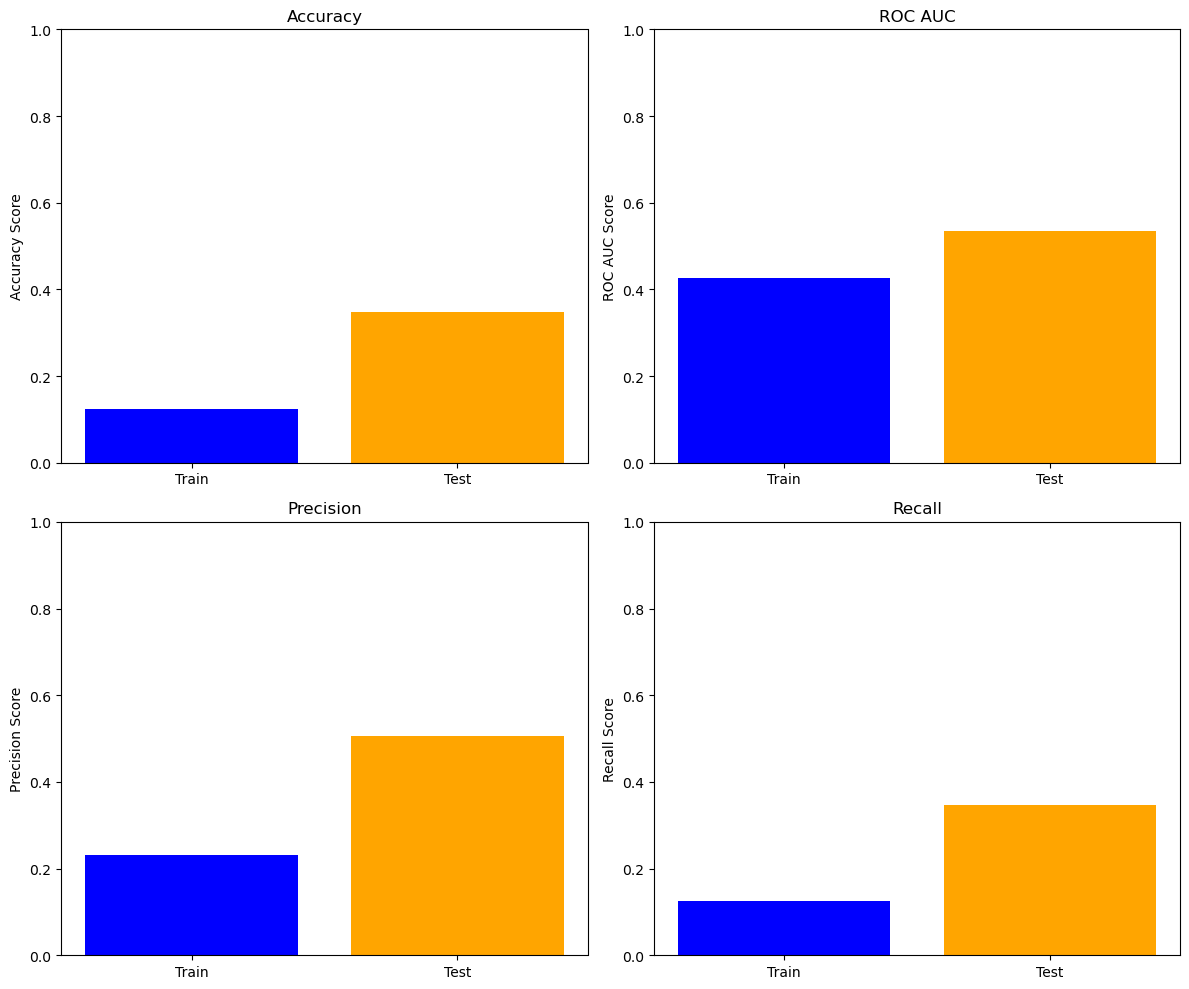

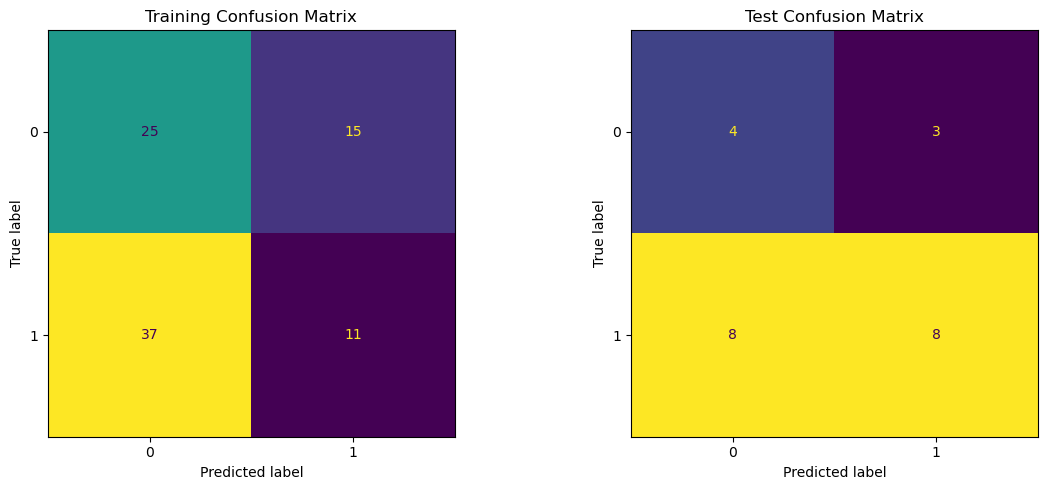

Best Results based on Test Accuracy:
Parameters: (0.1, 25, 0.1)
Training Accuracy: 0.38636363636363635
Test Accuracy: 0.43478260869565216
Training Precision: 0.3434343434343434
Test Precision: 0.5351170568561873
Training Recall: 0.38636363636363635
Test Recall: 0.43478260869565216
Training F1: 0.36363636363636365
Test F1: 0.47976011994003004
Training ROC AUC: 0.6041666666666667
Test ROC AUC: 0.5982142857142857

Best Results based on Test F1 Score:
Parameters: (0.1, 25, 0.1)
Training Accuracy: 0.38636363636363635
Test Accuracy: 0.43478260869565216
Training Precision: 0.3434343434343434
Test Precision: 0.5351170568561873
Training Recall: 0.38636363636363635
Test Recall: 0.43478260869565216
Training F1: 0.36363636363636365
Test F1: 0.47976011994003004
Training ROC AUC: 0.6041666666666667
Test ROC AUC: 0.5982142857142857


In [58]:
# Define parameter grid
grid_search_parameters = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_attempts': [5, 25, 50, 100],
    'mutation_prob': [0.1, 0.25, 0.5],
}

# Convert one-hot encoded true labels back to class labels
y_train_true = np.argmax(np.asarray(y_train_hot), axis=1)
y_test_true = np.argmax(np.asarray(y_test_hot), axis=1)

# Create a list of all parameter combinations
parameter_combinations = list(product(*grid_search_parameters.values()))
print(parameter_combinations)

# Initialize results list
results = []

for params in parameter_combinations:
    learning_rate, max_attempts, mutation_prob = params
    
    neural_net = mlrose.NeuralNetwork(hidden_nodes=[60, 60], activation='relu',
                                      algorithm='random_hill_climb', max_iters=1000,
                                      bias=True, is_classifier=True, learning_rate=learning_rate,
                                      early_stopping=True, clip_max=5, max_attempts=max_attempts,
                                      random_state=42, pop_size=200, mutation_prob=mutation_prob)
    
    neural_net.fit(X_train_scaled, np.asarray(y_train_hot))
    
    # Predict the training and test sets
    y_train_pred_hot = neural_net.predict(X_train_scaled)
    y_test_pred_hot = neural_net.predict(X_test_scaled)
    
    # Convert one-hot encoded predictions back to class labels
    y_train_pred = np.argmax(y_train_pred_hot, axis=1)
    y_test_pred = np.argmax(y_test_pred_hot, axis=1)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    train_roc_auc = roc_auc_score(y_train, y_train_pred, average='weighted', multi_class='ovr')
    test_roc_auc = roc_auc_score(y_test, y_test_pred, average='weighted', multi_class='ovr')
    
    # Save results
    results.append({
        'params': params,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_precision': train_precision,
        'test_precision': test_precision,
        'train_recall': train_recall,
        'test_recall': test_recall,
        'train_f1': train_f1,
        'test_f1': test_f1,
        'train_roc_auc': train_roc_auc,
        'test_roc_auc': test_roc_auc
    })
    
    # Print metrics
    print(f"Parameters: learning_rate={learning_rate}, max_attempts={max_attempts}, mutation_prob={mutation_prob}, activation='relu'")
    print("Training Accuracy: ", train_accuracy)
    print("Test Accuracy: ", test_accuracy)
    print("Training Precision: ", train_precision)
    print("Test Precision: ", test_precision)
    print("Training Recall: ", train_recall)
    print("Test Recall: ", test_recall)
    print("Training F1: ", train_f1)
    print("Test F1: ", test_f1)
    print("Training ROC AUC: ", train_roc_auc)
    print("Test ROC AUC: ", test_roc_auc)
    print()
    
    # Save classification reports
    with open(f"../results/rhc/results_lr{learning_rate}_ma{max_attempts}_mp{mutation_prob}_activation_relu.txt", "w") as f:
        f.write("Training Set Classification Report:\n")
        f.write(classification_report(y_train, y_train_pred))
        f.write("\n")
        f.write("Test Set Classification Report:\n")
        f.write(classification_report(y_test, y_test_pred))
        f.write("\n")
        f.write(str(results))
    
    # Print classification report for the test set
    print("Test Set Classification Report:")
    print(classification_report(y_test_true, y_test_pred))
    
    # Print classification report for the training set
    print("Training Set Classification Report:")
    print(classification_report(y_train_true, y_train_pred))

    # Prepare the output content
    output_content = []
    output_content.append(f"Parameters: learning_rate={learning_rate}, max_attempts={max_attempts}, mutation activation='relu'\n")
    output_content.append("Training Accuracy: {:.4f}\n".format(train_accuracy))
    output_content.append("Test Accuracy: {:.4f}\n".format(test_accuracy))
    output_content.append("Test Set Classification Report:\n")
    output_content.append(classification_report(y_test_true, y_test_pred) + "\n")
    output_content.append("Training Set Classification Report:\n")
    output_content.append(classification_report(y_train_true, y_train_pred) + "\n")
    
    # Write results to a text file
    with open(f"../results/rhc/results_lr{learning_rate}_ma{max_attempts}_mp{mutation_prob}_activation_relu.txt", "w") as f:
        f.writelines(output_content)
    
    # Generate plots for visualizations
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    
    # Accuracy bar plot
    ax[0, 0].bar(['Train', 'Test'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
    ax[0, 0].set_title('Accuracy')
    ax[0, 0].set_ylim([0, 1])
    ax[0, 0].set_ylabel('Accuracy Score')
    
    # ROC AUC
    ax[0, 1].bar(['Train', 'Test'], [train_roc_auc, test_roc_auc], color=['blue', 'orange'])
    ax[0, 1].set_title('ROC AUC')
    ax[0, 1].set_ylim([0, 1])
    ax[0, 1].set_ylabel('ROC AUC Score')
    
    # Precision
    ax[1, 0].bar(['Train', 'Test'], [train_precision, test_precision], color=['blue', 'orange'])
    ax[1, 0].set_title('Precision')
    ax[1, 0].set_ylim([0, 1])
    ax[1, 0].set_ylabel('Precision Score')
    
    # Recall
    ax[1, 1].bar(['Train', 'Test'], [train_recall, test_recall], color=['blue', 'orange'])
    ax[1, 1].set_title('Recall')
    ax[1, 1].set_ylim([0, 1])
    ax[1, 1].set_ylabel('Recall Score')
    
    plt.tight_layout()
    fig.savefig(f'../images/nn/rhc/rhc-nn-metrics-comparison-lr{learning_rate}-ma{max_attempts}-mr{mutation_prob}.png')
    plt.show()
    
    # Confusion Matrix
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Training Confusion Matrix
    train_cm = confusion_matrix(y_train_true, y_train_pred)
    ConfusionMatrixDisplay(train_cm).plot(ax=ax[0], colorbar=False)
    ax[0].set_title("Training Confusion Matrix")
    
    # Test Confusion Matrix
    test_cm = confusion_matrix(y_test_true, y_test_pred)
    ConfusionMatrixDisplay(test_cm).plot(ax=ax[1], colorbar=False)
    ax[1].set_title("Test Confusion Matrix")
    
    plt.tight_layout()
    plt.savefig(f'../images/nn/rhc/rhc-nn-confusion-matrix-lr{learning_rate}-ma{max_attempts}-mp{mutation_prob}.png')
    plt.show()

# Find the best results for different metrics
best_test_accuracy = max(results, key=lambda x: x['test_accuracy'])
best_test_f1 = max(results, key=lambda x: x['test_f1'])

# Prepare best results content
best_results_content = []

best_results_content.append("Best Results based on Test Accuracy:\n")
best_results_content.append(f"Parameters: {best_test_accuracy['params']}\n")
best_results_content.append(f"Training Accuracy: {best_test_accuracy['train_accuracy']}\n")
best_results_content.append(f"Test Accuracy: {best_test_accuracy['test_accuracy']}\n")
best_results_content.append(f"Training Precision: {best_test_accuracy['train_precision']}\n")
best_results_content.append(f"Test Precision: {best_test_accuracy['test_precision']}\n")
best_results_content.append(f"Training Recall: {best_test_accuracy['train_recall']}\n")
best_results_content.append(f"Test Recall: {best_test_accuracy['test_recall']}\n")
best_results_content.append(f"Training F1: {best_test_accuracy['train_f1']}\n")
best_results_content.append(f"Test F1: {best_test_accuracy['test_f1']}\n")
best_results_content.append(f"Training ROC AUC: {best_test_accuracy['train_roc_auc']}\n")
best_results_content.append(f"Test ROC AUC: {best_test_accuracy['test_roc_auc']}\n")
best_results_content.append("\n")

best_results_content.append("Best Results based on Test F1 Score:\n")
best_results_content.append(f"Parameters: {best_test_f1['params']}\n")
best_results_content.append(f"Training Accuracy: {best_test_f1['train_accuracy']}\n")
best_results_content.append(f"Test Accuracy: {best_test_f1['test_accuracy']}\n")
best_results_content.append(f"Training Precision: {best_test_f1['train_precision']}\n")
best_results_content.append(f"Test Precision: {best_test_f1['test_precision']}\n")
best_results_content.append(f"Training Recall: {best_test_f1['train_recall']}\n")
best_results_content.append(f"Test Recall: {best_test_f1['test_recall']}\n")
best_results_content.append(f"Training F1: {best_test_f1['train_f1']}\n")
best_results_content.append(f"Test F1: {best_test_f1['test_f1']}\n")
best_results_content.append(f"Training ROC AUC: {best_test_f1['train_roc_auc']}\n")
best_results_content.append(f"Test ROC AUC: {best_test_f1['test_roc_auc']}\n")

# Write best results to a text file
with open("rhc_best_results.txt", "w") as f:
    f.writelines(best_results_content)

print("Best Results based on Test Accuracy:")
print(f"Parameters: {best_test_accuracy['params']}")
print(f"Training Accuracy: {best_test_accuracy['train_accuracy']}")
print(f"Test Accuracy: {best_test_accuracy['test_accuracy']}")
print(f"Training Precision: {best_test_accuracy['train_precision']}")
print(f"Test Precision: {best_test_accuracy['test_precision']}")
print(f"Training Recall: {best_test_accuracy['train_recall']}")
print(f"Test Recall: {best_test_accuracy['test_recall']}")
print(f"Training F1: {best_test_accuracy['train_f1']}")
print(f"Test F1: {best_test_accuracy['test_f1']}")
print(f"Training ROC AUC: {best_test_accuracy['train_roc_auc']}")
print(f"Test ROC AUC: {best_test_accuracy['test_roc_auc']}")

print("\nBest Results based on Test F1 Score:")
print(f"Parameters: {best_test_f1['params']}")
print(f"Training Accuracy: {best_test_f1['train_accuracy']}")
print(f"Test Accuracy: {best_test_f1['test_accuracy']}")
print(f"Training Precision: {best_test_f1['train_precision']}")
print(f"Test Precision: {best_test_f1['test_precision']}")
print(f"Training Recall: {best_test_f1['train_recall']}")
print(f"Test Recall: {best_test_f1['test_recall']}")
print(f"Training F1: {best_test_f1['train_f1']}")
print(f"Test F1: {best_test_f1['test_f1']}")
print(f"Training ROC AUC: {best_test_f1['train_roc_auc']}")
print(f"Test ROC AUC: {best_test_f1['test_roc_auc']}")

In [59]:
end = time.perf_counter()
print("Time taken: in min", (end - start)/60)

Time taken: in min 11.89610985484954
